# `Homework Data Visualization`

- Nama: I Gusti Ngurah Agung Hari Vijaya Kusuma
- Cita-cita semasa kecil: Astronot

---

## `Soal 1`
Buatlah grafik yang memuat informasi rata-rata biaya bulanan
berdasarkan metode pembayarannya! Kemudian tuliskan
interpretasi-mu dari grafik tersebut. (10 poin)

Langkah-langkah:
- Kelompokkan data berdasarkan metode pembayar
an dan gunakan fungsi agregasi yang tepat untuk kasus ini.
- Kemudian, buatlah graﬁk yang tepat menurutmu

Untuk mempermudah kamu, yuk lihat resource di bawah ini:

- Topic Data Processing: Materi DataFrame Aggregation - bagian Groupby

---

`Jawaban Soal 1`

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# versi pandas, matplotlib, seaborn device agung
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)

matplotlib version: 3.9.4
pandas version: 2.3.0+4.g1dfc98e16a
seaborn version: 0.13.2


In [3]:
# Import dataset ke dataframe agung
agung = pd.read_csv('Homework_Dataset.csv')
# tampilkan agung isinya
agung.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
#analisa dikit
agung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
agung['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [6]:
agung['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [7]:
gemeter = agung.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()
gemeter

PaymentMethod  MonthlyCharges
0  Bank transfer (automatic)       67.192649
1    Credit card (automatic)       66.512385
2           Electronic check       76.255814
3               Mailed check       43.917060

In [8]:
gemeter2 = agung.groupby('PaymentMethod')['MonthlyCharges'].median().reset_index()
gemeter2

PaymentMethod  MonthlyCharges
0  Bank transfer (automatic)          73.100
1    Credit card (automatic)          73.025
2           Electronic check          80.550
3               Mailed check          34.700

In [9]:
# urutan kategori berdasarkan rata-rata untuk plot
mean_order = gemeter.groupby('PaymentMethod')['MonthlyCharges'].mean().sort_values(ascending=False).index

# urutan kategori berdasarkan median untuk plot
median_order = gemeter2.groupby('PaymentMethod')['MonthlyCharges'].median().sort_values(ascending=False).index


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Bank transfer (automatic)'),
  Text(2, 0, 'Credit card (automatic)'),
  Text(3, 0, 'Mailed check')])

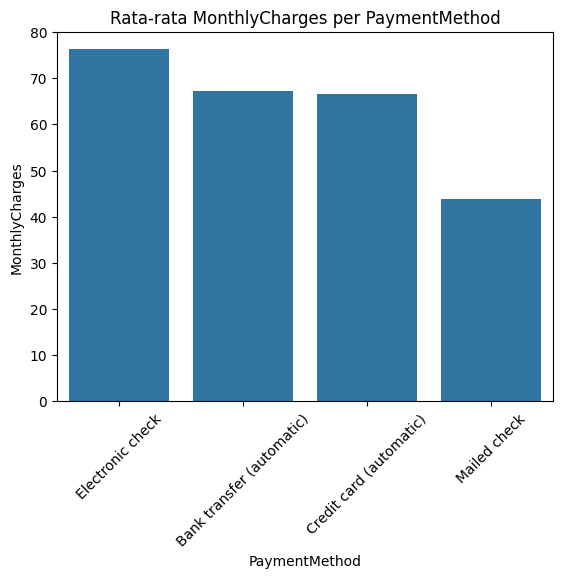

In [10]:
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=gemeter, order=mean_order)
plt.title('Rata-rata MonthlyCharges per PaymentMethod')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Bank transfer (automatic)'),
  Text(2, 0, 'Credit card (automatic)'),
  Text(3, 0, 'Mailed check')])

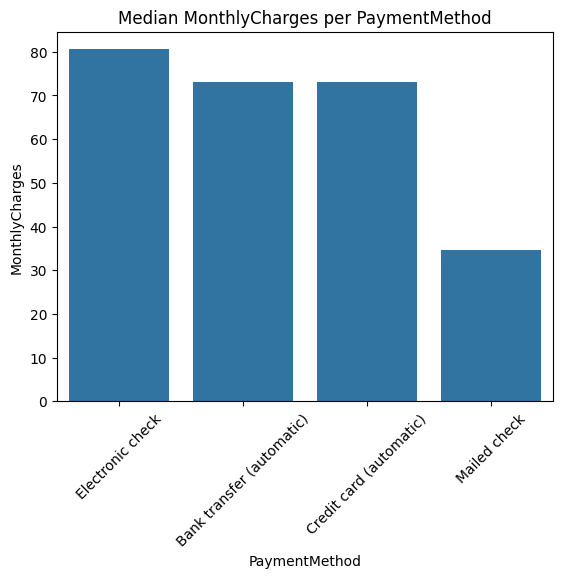

In [11]:
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=gemeter2, order=median_order)
plt.title('Median MonthlyCharges per PaymentMethod')
plt.xticks(rotation=45)

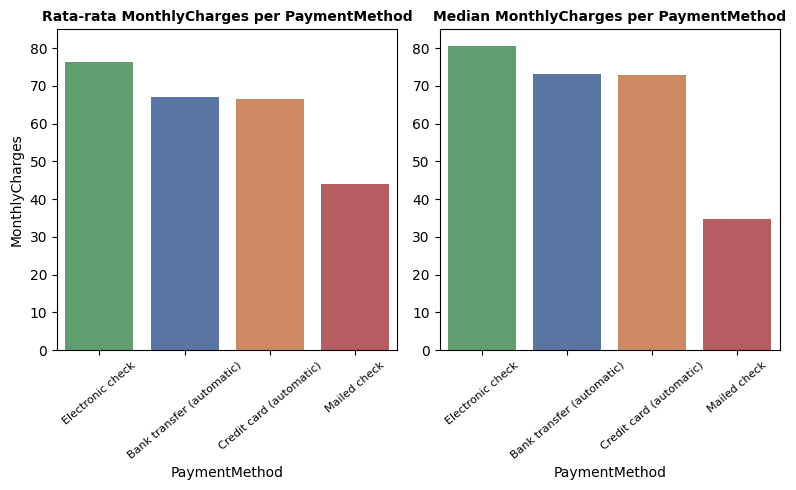

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=gemeter, ax=axes[0], hue='PaymentMethod', order=mean_order, palette='deep')

sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=gemeter2, ax=axes[1], hue='PaymentMethod', order=median_order,  palette='deep')

axes[0].set_title('Rata-rata MonthlyCharges per PaymentMethod', fontsize=10, fontweight='bold')
axes[0].set_ylim(0, 85)
axes[0].tick_params(axis='x', rotation=40, labelsize=8)


axes[1].set_title('Median MonthlyCharges per PaymentMethod', fontsize=10, fontweight='bold')
axes[1].set_ylim(0, 85)
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=40, labelsize=8)

plt.tight_layout()
plt.show()

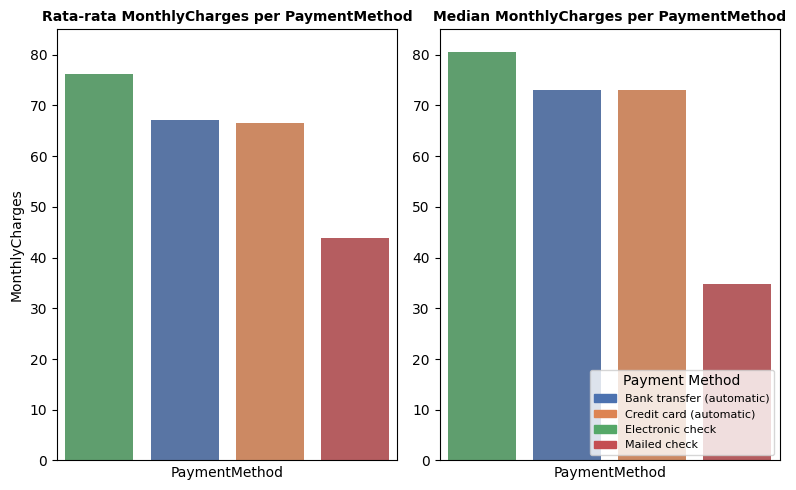

In [13]:
#gpt is the way
import matplotlib.patches as mpatches

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

colors = sns.color_palette('deep')
payment_methods = ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
palette_dict = dict(zip(payment_methods, colors))

# rata-rata
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=gemeter, ax=axes[0], hue='PaymentMethod', order=mean_order, palette=palette_dict)

# median
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=gemeter2, ax=axes[1], hue='PaymentMethod', order=median_order, palette=palette_dict)

axes[0].set_title('Rata-rata MonthlyCharges per PaymentMethod', fontsize=10, fontweight='bold')
axes[0].set_ylim(0, 85)
axes[0].set_xticks([])

axes[1].set_title('Median MonthlyCharges per PaymentMethod', fontsize=10, fontweight='bold')
axes[1].set_ylim(0, 85)
axes[1].set_ylabel("")
axes[1].set_xticks([])

legend_patches = [mpatches.Patch(color=palette_dict[pm], label=pm) for pm in payment_methods]
axes[1].legend(handles=legend_patches, loc='lower right', title='Payment Method', fontsize=8, title_fontsize=10)

plt.tight_layout()
plt.show()


In [14]:
agung.groupby('PaymentMethod')['MonthlyCharges'].describe()

count       mean        std    min      25%  \
PaymentMethod                                                             
Bank transfer (automatic)  1544.0  67.192649  30.555200  18.40  41.0875   
Credit card (automatic)    1522.0  66.512385  30.612424  18.25  38.6625   
Electronic check           2365.0  76.255814  24.053655  18.85  60.1500   
Mailed check               1612.0  43.917060  26.314665  18.70  20.1500   

                              50%      75%     max  
PaymentMethod                                       
Bank transfer (automatic)  73.100  92.9625  118.75  
Credit card (automatic)    73.025  90.8500  117.50  
Electronic check           80.550  94.7000  118.65  
Mailed check               34.700  64.9125  118.60

In [15]:
#q1 dan q3
agung.groupby('PaymentMethod')['MonthlyCharges'].agg(lambda x: (x.quantile(0.25), x.quantile(0.75)))

PaymentMethod
Bank transfer (automatic)            (41.0875, 92.9625)
Credit card (automatic)                (38.6625, 90.85)
Electronic check                          (60.15, 94.7)
Mailed check                 (20.15, 64.91250000000001)
Name: MonthlyCharges, dtype: object

In [16]:
#mengecek upper bound dan lower bound untuk masing masing PaymentMethod
def calculate_bounds(group):
    q1 = group['MonthlyCharges'].quantile(0.25)
    q3 = group['MonthlyCharges'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return pd.Series({'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

bounds = agung.groupby('PaymentMethod').apply(calculate_bounds).reset_index()
print(bounds)

               PaymentMethod  Lower Bound  Upper Bound
0  Bank transfer (automatic)    -36.72500    170.77500
1    Credit card (automatic)    -39.61875    169.13125
2           Electronic check      8.32500    146.52500
3               Mailed check    -46.99375    132.05625


C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\704640460.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bounds = agung.groupby('PaymentMethod').apply(calculate_bounds).reset_index()


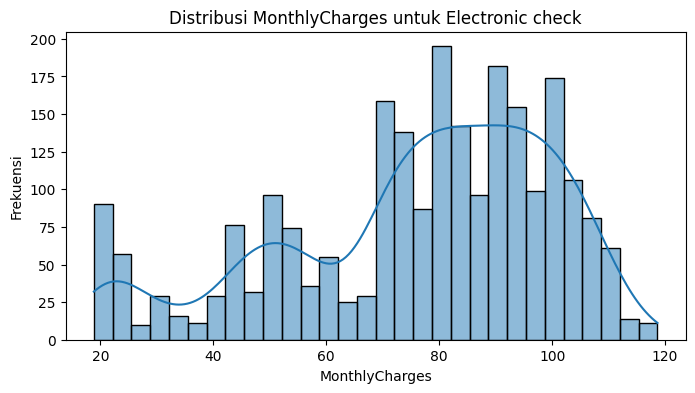

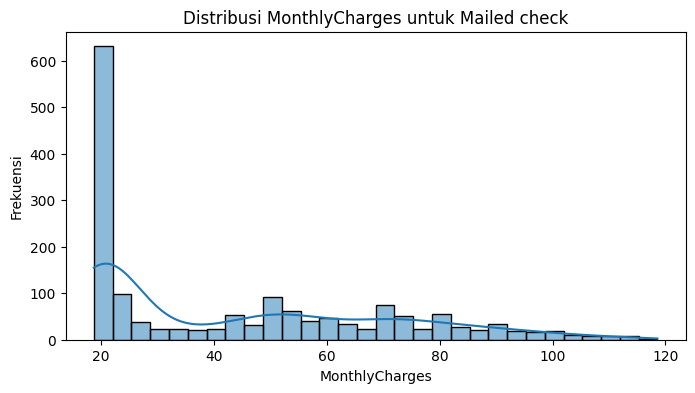

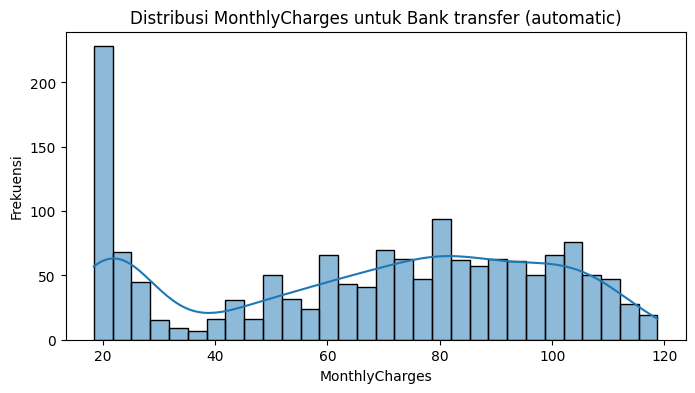

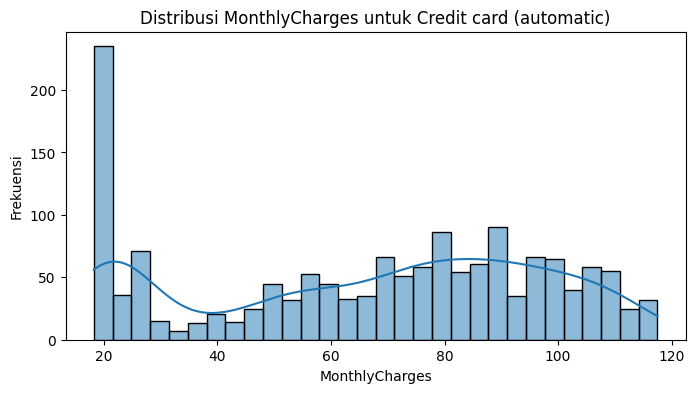

In [17]:
#histogram untuk melihat distribusi MonthlyCharges per masing-masing PaymentMethod
for method in agung['PaymentMethod'].unique():
    plt.figure(figsize=(8, 4))
    sns.histplot(agung[agung['PaymentMethod'] == method]['MonthlyCharges'], bins=30, kde=True)
    plt.title(f'Distribusi MonthlyCharges untuk {method}')
    plt.xlabel('MonthlyCharges')
    plt.ylabel('Frekuensi')
    plt.show()

In [18]:
agung.groupby('PaymentMethod')['MonthlyCharges'].describe()

count       mean        std    min      25%  \
PaymentMethod                                                             
Bank transfer (automatic)  1544.0  67.192649  30.555200  18.40  41.0875   
Credit card (automatic)    1522.0  66.512385  30.612424  18.25  38.6625   
Electronic check           2365.0  76.255814  24.053655  18.85  60.1500   
Mailed check               1612.0  43.917060  26.314665  18.70  20.1500   

                              50%      75%     max  
PaymentMethod                                       
Bank transfer (automatic)  73.100  92.9625  118.75  
Credit card (automatic)    73.025  90.8500  117.50  
Electronic check           80.550  94.7000  118.65  
Mailed check               34.700  64.9125  118.60

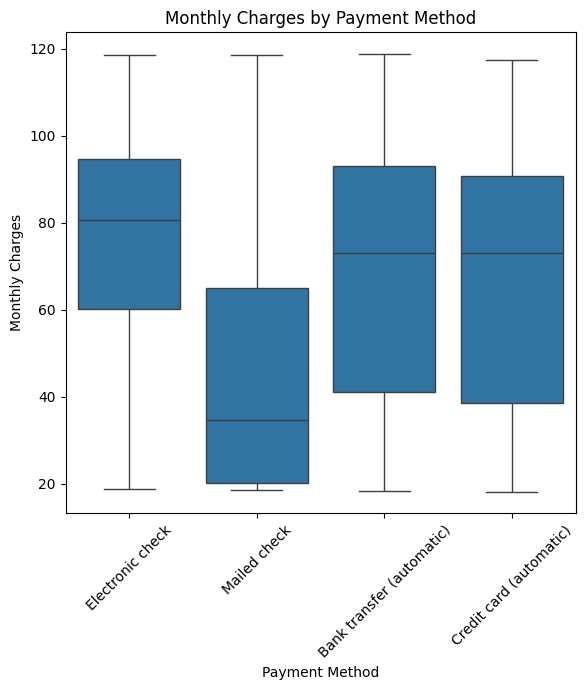

In [19]:
#box plot
plt.figure(figsize=(6, 7))
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=agung)
plt.title('Monthly Charges by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### `Interpretasi`
Menurut saya grafik yang tepat digunakan untuk memuat informasi rata-rata biaya bulanan berdasarkan metode pembayarannya adalah **barchart**. Karena barchart adalah jenis grafik yang **paling efektif untuk membandingkan nilai agregat antar kategori diskrit**, mengingat kolom metode pembayaran terdiri dari data yang bersifat kategorikal. Berikut merupakan Barchart rata rata dan median biaya bulanan (Monthly Charge) berdasarkan Metode Pembayaran (Payment Method)

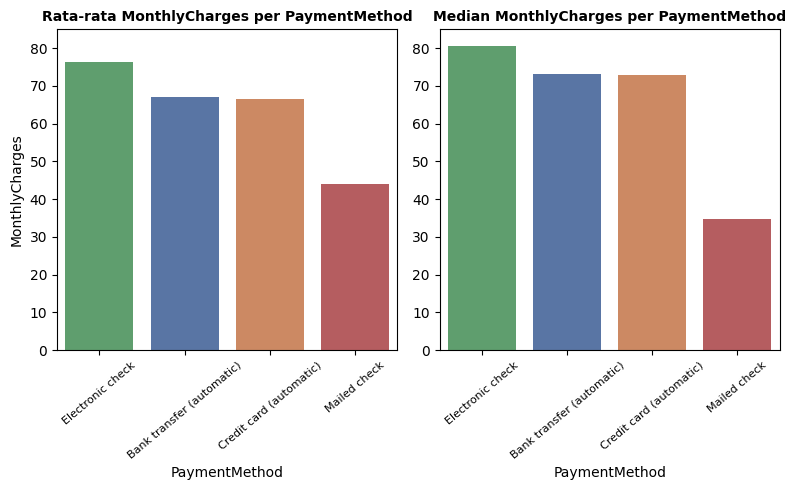

- Rata-rata biaya bulanan (MonthlyCharges) tertinggi terdapat pada metode pembayaran **Electronic check** yaitu sebesar **$76.26**, diikuti oleh:
  - **Bank transfer (automatic)**: **$67.19**
  - **Credit card (automatic)**: **$66.51**
  - **Mailed check**: **$43.92** ← *Terendah*

- Terdapat **kesenjangan cukup signifikan** antara Electronic check dan Mailed check sebesar **$32.34**, menunjukkan bahwa **metode pembayaran berkorelasi dengan tingkat kualitas layanan** langganan yang dipilih oleh pelanggan.

- **Electronic check** menjadi metode yang digunakan oleh pelanggan dengan **layanan mahal atau paket premium**.
  - Kemungkinan karena pelanggan ini menggunakan banyak fitur tambahan (phone service, streaming tv, streaming movies dll).

- **Bank transfer (automatic)** dan **Credit card (automatic)** menunjukkan rata-rata biaya yang **stabil dan berada di tengah**, mengindikasikan bahwa:
  - Pelanggan cenderung berkomitmen jangka panjang.
  - Lebih nyaman dengan pembayaran otomatis dan berulang.

- **Mailed check** memiliki rata-rata biaya terendah.
  - Menunjukkan kelompok pelanggan dengan paket layanan minimal.
  - Bisa juga berasal dari latar belakang yang kurang familiar dengan teknologi atau dari wilayah dengan akses digital yang terbatas.


- Perbedaan pola biaya bulanan antar metode pembayaran mencerminkan variasi perilaku pelanggan. Sehingga perlu Analisis distribusi untuk mengetahui kecenderungan/karakteristik pengguna di setiap kategori pembayaran. Dimana membagi pelanggan ke dalam segmen tertentu adalah salah satu pendekatan utama untuk mengenali karakteristik pelanggan, sehingga kita bisa lakukan analisa IQR untuk memberikan dasar yang kuat dan terukur untuk membentuk segmen pelanggan ini.

### Interquartile Range (IQR) dan Batas Outlier per Metode Pembayaran

IQR (Interquartile Range) menggambarkan sebaran nilai **MonthlyCharges** di tengah 50% data pelanggan (antara Q1 dan Q3). Nilai ini penting untuk mengetahui keragaman biaya bulanan yang dianggap "normal" serta mendeteksi potensi outlier. Adapun Visualisasi Boxplot sesuai untuk menggambarkan nilai ini

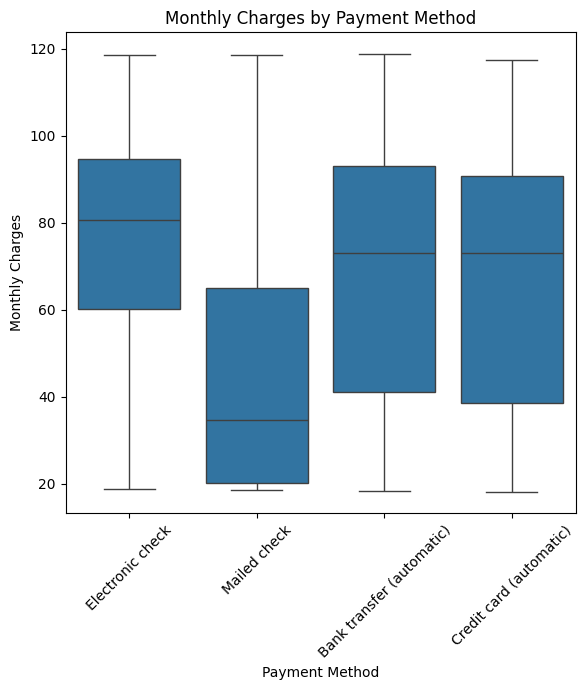


- **Bank transfer (automatic)**
  - Q1: **$41.09**
  - Q3: **$92.96**
  - IQR: **$51.88**
  - Lower Bound: **−$36.72**
  - Upper Bound: **$170.78**

- **Credit card (automatic)**
  - Q1: **$38.66**
  - Q3: **$90.85**
  - IQR: **$52.19**
  - Lower Bound: **−$39.62**
  - Upper Bound: **$169.13**

- **Electronic check**
  - Q1: **$60.15**
  - Q3: **$94.70**
  - IQR: **$34.55**
  - Lower Bound: **$8.33**
  - Upper Bound: **$146.53**

- **Mailed check**
  - Q1: **$20.15**
  - Q3: **$64.91**
  - IQR: **$44.76**
  - Lower Bound: **−$46.99**
  - Upper Bound: **$132.06**

- Tidak satu pun metode pembayaran memiliki nilai MonthlyCharges yang berada di luar batas bawah atau atas berdasarkan metode IQR.
- Ini menunjukkan bahwa meskipun beberapa metode (seperti Electronic check) memiliki rentang biaya tinggi, **semua nilai masih dianggap wajar** menurut penyebaran data tengahnya.
- Nilai IQR tertinggi dimiliki oleh:
  - **Credit card (automatic)**: **$52.19**
  - **Bank transfer (automatic)**: **$51.88**
  - Hal ini menunjukkan bahwa metode otomatis memiliki keragaman biaya terbesar di tengah kelompok pelanggan.
- **Electronic check** memiliki IQR lebih kecil (**$34.55**) namun tetap menunjukkan distribusi yang **terfokus pada segmen biaya tinggi**.



### Implikasi Bisnis Berdasarkan IQR dan Distribusi Biaya Bulanan

Dengan memahami IQR dan distribusi MonthlyCharges per metode pembayaran, perusahaan dapat menyusun strategi diferensiasi yang lebih tajam berdasarkan **profil ekonomi pelanggan**. Berikut implikasi bisnis yang dapat diambil:

#### 1. **Segmen “Kelas Atas / Mytic Glory” : Electronic Check**
- Q1 dan Q3 berada di kisaran tinggi ($60.15 – $94.70), menunjukkan pelanggan dengan layanan **berbiaya premium secara konsisten**.
- Rentang IQR sempit, menandakan **homogenitas** atau keseragaman dalam pengeluaran.
- **Implikasi:**
  - Target untuk **bundling layanan eksklusif**.
  - Potensi untuk program **VIP loyalty** atau personalisasi layanan tambahan.

#### 2. **Segmen “Stabil Beragam” : Autodebet (Bank Transfer & Credit Card)**
- Q1 relatif rendah (sekitar $38–$41), namun Q3 cukup tinggi (di atas $90).
- IQR besar ($51–$52) menunjukkan **variasi layanan luas** dari basic hingga premium.
- Metode ini mencerminkan preferensi pembayaran yang **otomatis dan nyaman**.
- **Implikasi:**
  - Cocok untuk **penawaran fleksibel** seperti upgrade bertahap (freemium ke premium).
  - Pelanggan cenderung **loyal dan minim churn**, bisa menjadi **fokus upselling**.
  - Promosi berbasis efisiensi dan kemudahan pembayaran dapat efektif.

#### 3. **Segmen “Kelas Epic / Konservatif” : Mailed Check**
- Q1 sangat rendah ($20.15) dan Q3 hanya sampai $64.91.
- Menunjukkan pelanggan yang **membayar layanan minimum**.
- IQR sedang ($44.76), tetapi tetap di rentang harga rendah.
- **Implikasi:**
  - Pelanggan kemungkinan dari wilayah non-digital atau kurang literasi teknologi.
  - Perlu pendekatan **edukatif dan promosi migrasi ke metode digital**.
  - Tidak cocok untuk upsell agresif, tapi bisa ditawarkan **paket hemat atau add-on ringan**.


### Implikasi Bisnis untuk Pihak Bank

Analisis distribusi MonthlyCharges dan metode pembayaran tidak hanya bermanfaat bagi penyedia layanan utama (telco), tetapi juga sangat strategis bagi **pihak bank** sebagai penyedia infrastruktur pembayaran digital.

#### Strategi Layanan Keuangan yang Tepat Sasaran
- Nasabah dengan pengeluaran tinggi dan metode autodebet cocok ditawarkan:
  - Kartu kredit premium
  - Produk cicilan atau pinjaman personal
- Nasabah pengguna mailed check cocok untuk:
  - Rekening tanpa biaya admin
  - Literasi digital banking
  - Aktivasi mobile banking

#### Peningkatan Fee Based Income melalui Kolaborasi
- Bank bisa bermitra dengan perusahaan layanan untuk:
  - Memberikan diskon khusus bagi pelanggan autodebet (contoh: $1–$5/bulan)
  - Membuat produk bundling “Bayar otomatis via Bank X”
  - Meningkatkan volume transaksi berulang melalui sistem autodebet



---

## `Soal 2`
Jika masa berlangganan (tenure) dikelompokkan menjadi sebagai berikut:
- low: User dengan tenure < 21 bulan
- medium: User dengan tenure 21 - 40 bulan
- high: User dengan tenure > 40 bulan

Buatlah grafik yang menunjukkan jumlah pelanggan berdasarkan pengelompokkan tersebut! (10 poin)

Langkah-langkah
- Kelompokkan data dengan menggunakan fungsi numpy.where atau pandas.cut
- Gunakan fungsi agregasi yang tepat untuk kasus ini.
- Kemudian, buatlah graﬁk yang tepat menurutmu

Untuk mempermudah kamu, yuk lihat resource di bawah ini:
- Topic Data Processing: Materi DataFrame Aggregation - bagian Groupby
- Topic Python Programming: Materi Conditional Statement - bagian np.where()

In [20]:
agung.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [21]:
agung.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
agung['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [23]:
agung_tenure = agung.copy()



In [24]:
agung_tenure['TenureGroup'] = pd.cut(agung_tenure['tenure'], bins=[0, 20, 40, agung_tenure['tenure'].max()], labels=['Low', 'medium', 'high'], right=True, include_lowest=True)

tenure_counts = agung_tenure['TenureGroup'].value_counts().sort_index()


In [25]:
#jumlah pelanggan per kelompok tenure
tenure_counts

TenureGroup
Low       2878
medium    1408
high      2757
Name: count, dtype: int64

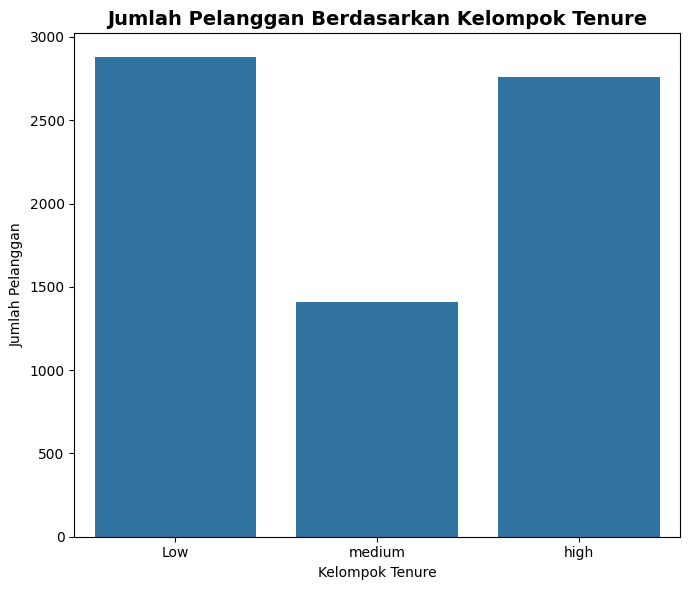

In [26]:
plt.figure(figsize=(7, 6))
sns.barplot(x=tenure_counts.index, y=tenure_counts.values)
plt.title('Jumlah Pelanggan Berdasarkan Kelompok Tenure', fontsize=14, fontweight='bold')
plt.xlabel('Kelompok Tenure', fontsize=10)
plt.ylabel('Jumlah Pelanggan', fontsize=10)
plt.tight_layout()
plt.show()

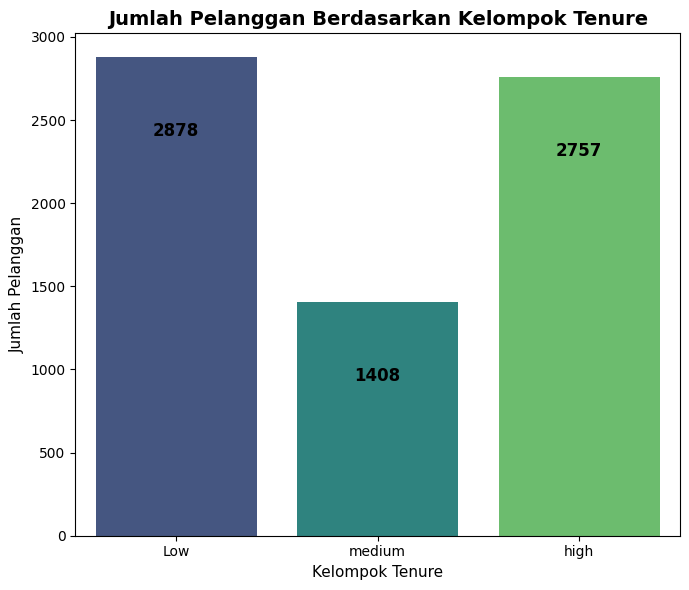

In [27]:
plt.figure(figsize=(7, 6))
ax = sns.barplot(x=tenure_counts.index, y=tenure_counts.values, hue=tenure_counts.index, palette='viridis')

for i, value in enumerate(tenure_counts.values):
    ax.text(i, value - 500 , str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Jumlah Pelanggan Berdasarkan Kelompok Tenure', fontsize=14, fontweight='bold')
plt.xlabel('Kelompok Tenure', fontsize=11)
plt.ylabel('Jumlah Pelanggan', fontsize=11)
plt.tight_layout()
plt.show()

### `Alasan Penggunaan Barchart`
Grafik yang digunakan untuk memvisualisasikan jumlah pelanggan berdasarkan kelompok tenure adalah bar chart, karena Bar chart sangat sesuai untuk menampilkan data diskrit atau kategori seperti low, medium, dan high tenure, sehingga memudahkan perbandingan antar kelompok.


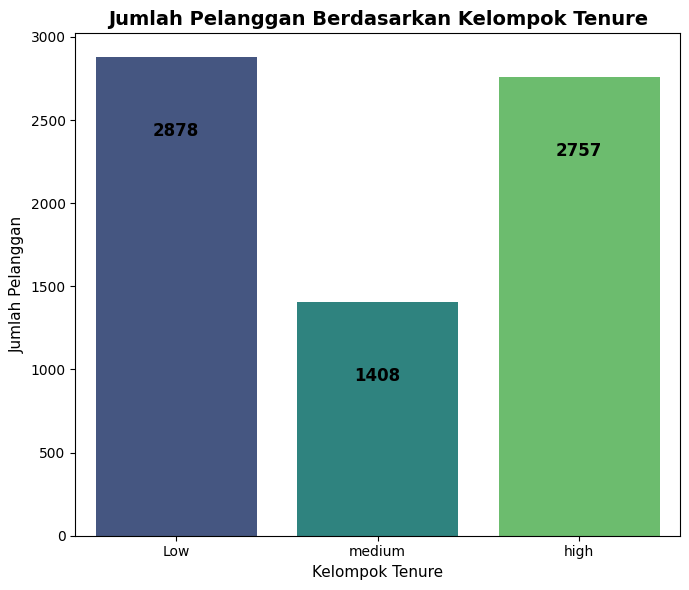

Grafik bar di atas menunjukkan distribusi jumlah pelanggan berdasarkan masa berlangganan (tenure) yang telah dikelompokkan menjadi tiga kategori:

- Low tenure: pelanggan dengan lama berlangganan kurang dari 21 bulan.

- Medium tenure: pelanggan dengan lama berlangganan antara 21 hingga 40 bulan.

- High tenure: pelanggan dengan lama berlangganan lebih dari 40 bulan.

Hasil Temuan

- Jumlah pelanggan terbanyak berasal dari kelompok **Low tenure sebanyak 2.878 pelanggan**, diikuti oleh:

- **High tenure sebanyak 2.757 pelanggan**, dan

- **Medium tenure sebanyak 1.408 pelanggan**.

### `interpretasi`
- Jumlah pelanggan **Low yang cukup tinggi** menunjukkan bahwa terdapat **banyak pelanggan baru atau yang belum lama** menggunakan layanan. Hal ini bisa menandakan **keberhasilan dalam mendapatkan pelanggan baru.**

- **Kelompok High tenure juga tinggi**, yang berarti terdapat **basis pelanggan loyal yang sudah lama menggunakan layanan**. Ini bisa menjadi **target utama untuk program retensi, loyalty rewards, dan penawaran eksklusif.**

- Kelompok **Medium tenure justru paling sedikit**, yang mengindikasikan **kehilangan pelanggan di fase transisi dari pelanggan baru menjadi pelanggan tetap**. Ini bisa menjadi alasan penting untuk mengevaluasi pengalaman pelanggan di bulan bulan pertengahan.

---

## `Soal 3`

Apakah warga senior banyak yang menggunakan layanan telepon? (10 poin)
Langkah-langkah:
- Kelompokkan data berdasarkan dengan apakah pelanggan tersebut merupakan warga senior dan menggunakan layanan telepon, kemudian hitung jumlah unik pelanggannya.
- Buat pula rasio persentase dari jumlah unik customer tersebut.
- Untuk mempermudah, buat graﬁk dengan data tersebut menggunakan libraryseaborn dan gunakan parameter ‘hue’

Untuk mempermudah kamu, yuk lihat resource di bawah ini:
- Topic Data Processing: Materi DataFrame Aggregation - bagian multi Groupby
- Topic Data Visualization: Materi Advanced Plot - bagian Multi Barplot

In [28]:
agung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
agung['SeniorCitizen'].unique()

array([0, 1])

In [30]:
agung['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
agung_mentah = agung.groupby(['SeniorCitizen', 'PhoneService'])['customerID'].nunique().reset_index(name='JumlahCustomerYangSeniorplusLanggananTelepon')
semua_customer = agung.groupby(['SeniorCitizen'])['customerID'].nunique().reset_index(name='SemuaCustomer')

In [32]:
hasil_rasio = agung_mentah.merge(semua_customer, on='SeniorCitizen', how='inner')

In [33]:
hasil_rasio['Persentase'] = round(100 * hasil_rasio['JumlahCustomerYangSeniorplusLanggananTelepon'] / hasil_rasio['SemuaCustomer'],2)

In [34]:
hasil_rasio

SeniorCitizen PhoneService  JumlahCustomerYangSeniorplusLanggananTelepon  \
0              0           No                                           578   
1              0          Yes                                          5323   
2              1           No                                           104   
3              1          Yes                                          1038   

   SemuaCustomer  Persentase  
0           5901        9.79  
1           5901       90.21  
2           1142        9.11  
3           1142       90.89

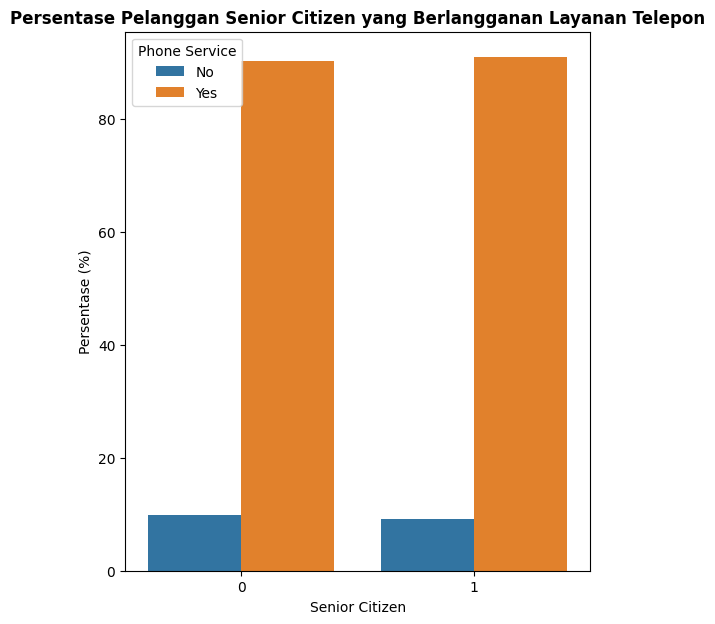

In [35]:
#visualisasi hasil_rasio
plt.figure(figsize=(6, 7))
sns.barplot(x='SeniorCitizen', y='Persentase', hue='PhoneService', data=hasil_rasio)
plt.title('Persentase Pelanggan Senior Citizen yang Berlangganan Layanan Telepon', fontweight='bold')
plt.xlabel('Senior Citizen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)

#kustom lokasi legends
plt.legend(title='Phone Service', loc='upper left')
plt.show()

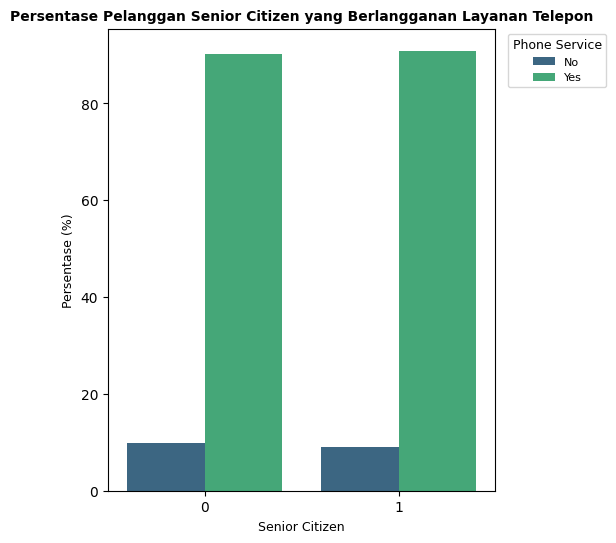

In [36]:
#visualisasi hasil_rasio
plt.figure(figsize=(5, 6))
sns.barplot(x='SeniorCitizen', y='Persentase', hue='PhoneService', data=hasil_rasio, palette='viridis')
plt.title('Persentase Pelanggan Senior Citizen yang Berlangganan Layanan Telepon', fontsize=10, fontweight='bold')
plt.xlabel('Senior Citizen', fontsize=9)
plt.ylabel('Persentase (%)', fontsize=9)
plt.xticks(rotation=0)

#kustom lokasi legends dan judul
plt.legend(title='Phone Service', fontsize=8, loc='upper right', bbox_to_anchor=(1.3, 1), title_fontsize=9)
plt.show()

### `Interpretasi`
Grafik barchart yang ditampilkan menunjukkan persentase pelanggan yang menggunakan layanan telepon (PhoneService) berdasarkan status kewargaan senior (SeniorCitizen). Nilai 0 berarti bukan warga senior / non senior, dan 1 berarti warga senior.

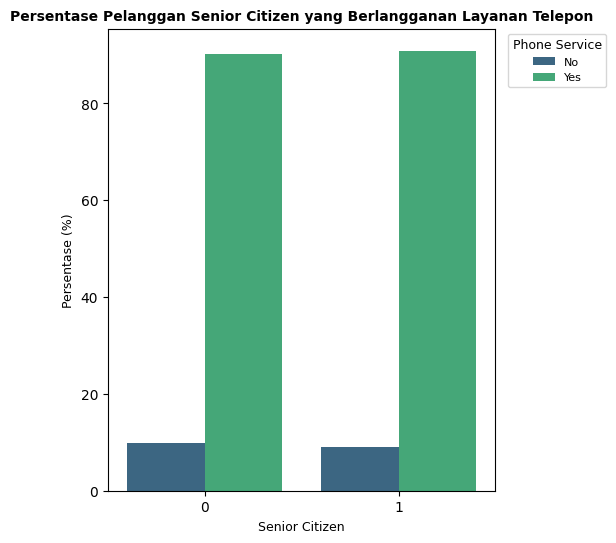

- **Mayoritas pelanggan**, baik warga senior (1) maupun non senior (0), menggunakan layanan telepon.
- **Lebih dari 90% pelanggan dari kedua kelompok** (senior dan non senior) menggunakan layanan ini.
- Hanya sekitar 9–10% yang tidak menggunakan layanan telepon, dan jumlah ini **relatif kecil**.

Dari interpretasi tersebut kita dapat menyimpulkan bahwa layanan telepon sudah menjadi **kebutuhan yang penting** baik dari kelompok senior maupun non senior.

**Perusahaan dapat menjadikan layanan telepon sebagai pilar utama dalam mempertahankan pelanggan**, serta sebagai titik masuk untuk cross selling layanan tambahan (seperti internet, TV, atau mobile).

---

## `Soal 4`

Bagaimana distribusi dari total biaya? (10 poin)
Langkah-langkah:
- Ubah tipe data kolom total biaya dari object menjadi integer atau float dan perhatikan
kelengkapan value dari kolom tersebut.
- Buat plot distribusi untuk kolom tersebut


Untuk mempermudah kamu, yuk lihat resource di bawah ini:
- Topic Data Processing: Materi Transformasi pada Dataframe - bagian Mengubah Tipe
Data

In [37]:
agung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
agung['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [39]:
agung['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [40]:
agung['TotalCharges'] = pd.to_numeric(agung['TotalCharges'], errors='coerce')

In [41]:
print(agung['TotalCharges'].isnull().sum())

11


In [42]:
agung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\1844985906.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


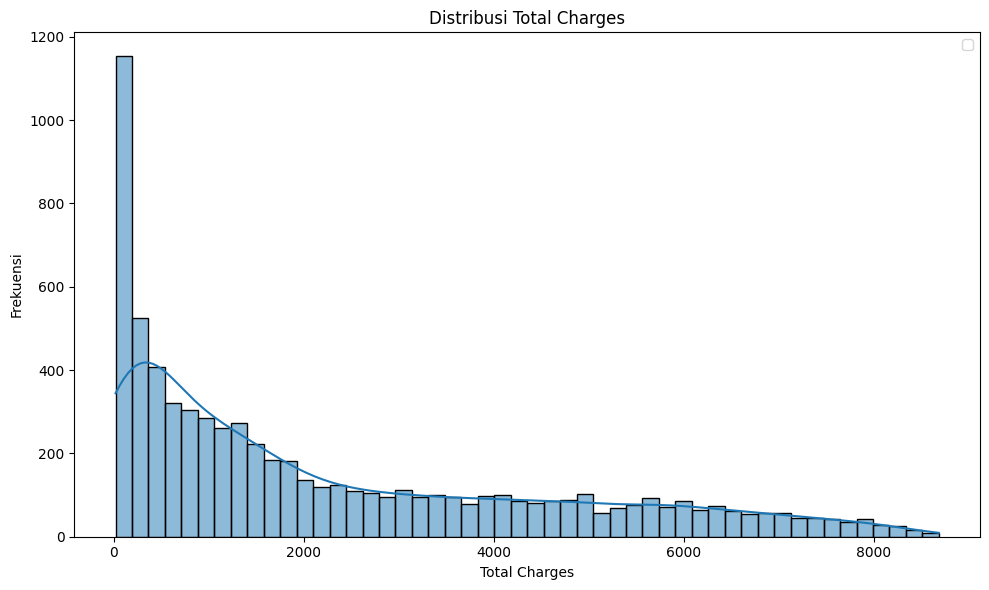

In [43]:
# histogram untuk melihat distribusi TotalCharges
plt.figure(figsize=(10, 6))
sns.histplot(agung['TotalCharges'], bins=50, kde=True)
plt.title('Distribusi Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frekuensi')
plt.legend()
plt.tight_layout()
plt.show()

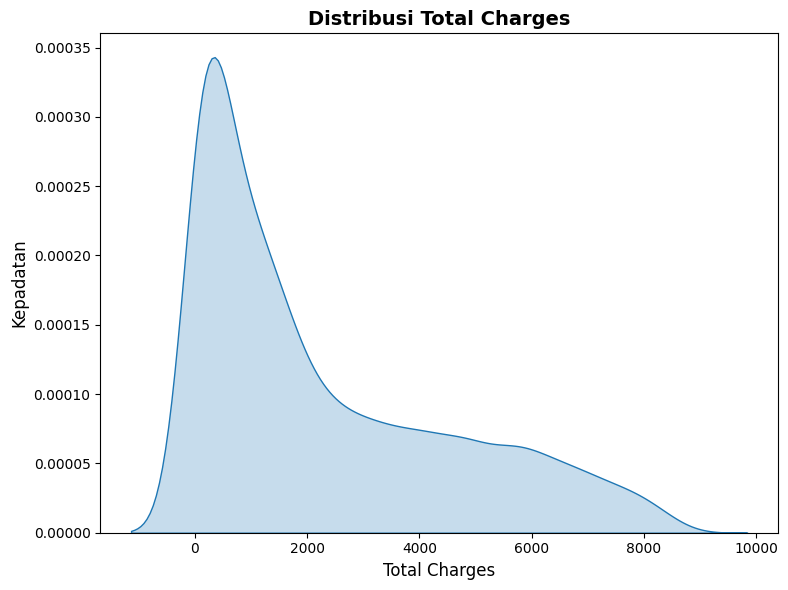

In [44]:
#grafik kde plot untuk melihat distribusi TotalCharges
plt.figure(figsize=(8, 6))
sns.kdeplot(data=agung, x='TotalCharges', fill=True)
plt.title('Distribusi Total Charges', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.tight_layout()
plt.show()

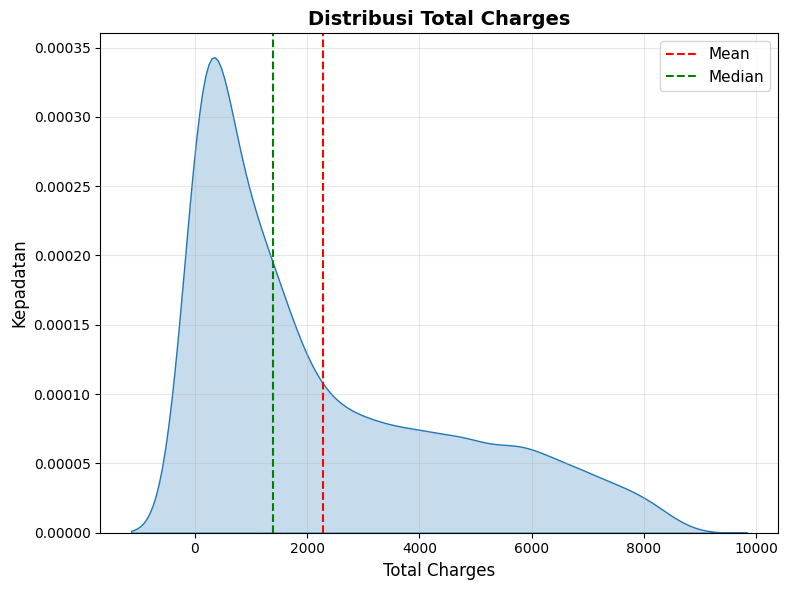

In [45]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=agung, x='TotalCharges', fill=True)
plt.title('Distribusi Total Charges', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.axvline(agung['TotalCharges'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(agung['TotalCharges'].median(), color='green', linestyle='--', label='Median')
plt.tight_layout()
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

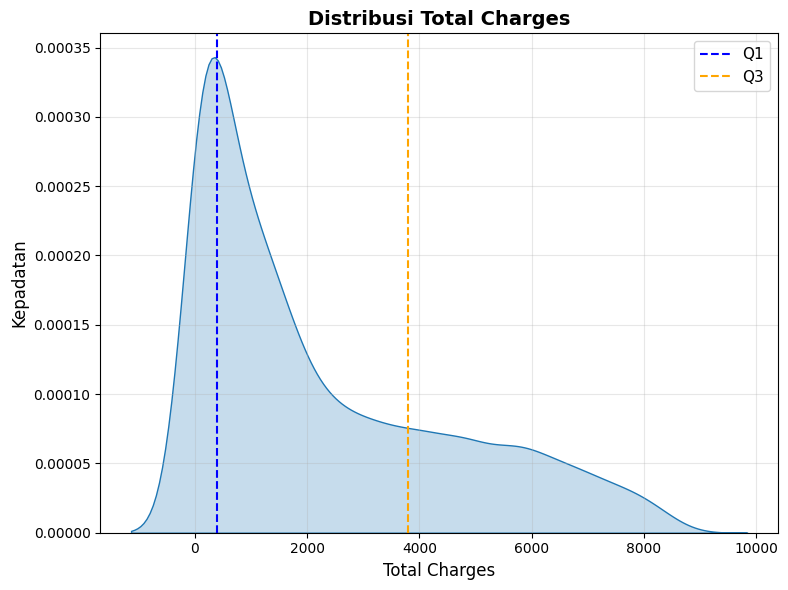

In [46]:
#garis q1  q3
q1 = agung['TotalCharges'].quantile(0.25)
q3 = agung['TotalCharges'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.kdeplot(data=agung, x='TotalCharges', fill=True)
plt.title('Distribusi Total Charges', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.axvline(q1, color='blue', linestyle='--', label='Q1')
plt.axvline(q3, color='orange', linestyle='--', label='Q3')
plt.tight_layout()
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

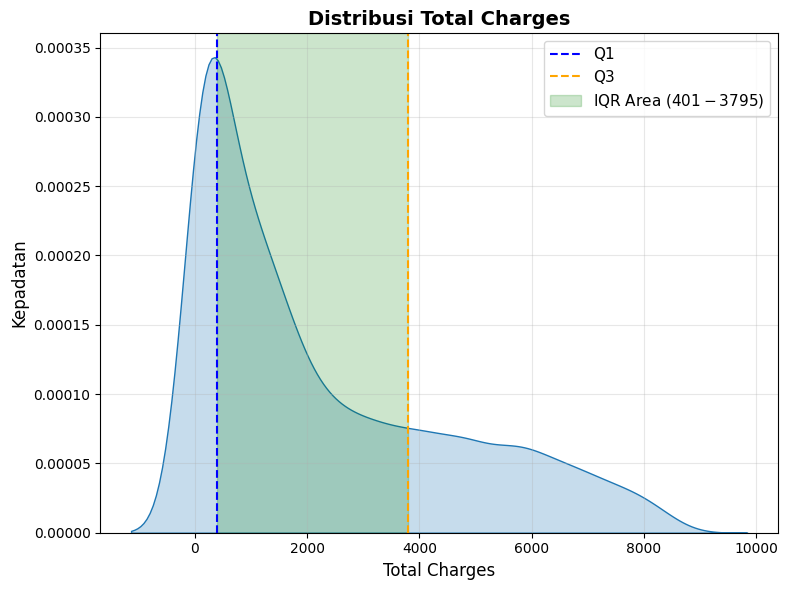

In [47]:
#garis q1 q2 q3

plt.figure(figsize=(8, 6))
sns.kdeplot(data=agung, x='TotalCharges', fill=True)
plt.title('Distribusi Total Charges', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.axvline(q1, color='blue', linestyle='--', label='Q1')
plt.axvline(q3, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1, q3, color='green', alpha=0.2, label=f'IQR Area (${q1:.0f} - ${q3:.0f})')
plt.tight_layout()
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

In [49]:
#mencari upperbound dan lowerbound
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

Lower Bound: -4688.48
Upper Bound: 8884.67


In [50]:
outliers = agung[agung['TotalCharges'] > upper_bound]
print("Jumlah outlier atas:", len(outliers))

Jumlah outlier atas: 0


In [51]:
#nilai iqr total charge
iqr = q3 - q1
print(f"IQR Total Charges: {iqr}")

IQR Total Charges: 3393.2875000000004


In [52]:
#upper bound dan lower bound
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -4688.481250000001
Upper Bound: 8884.66875


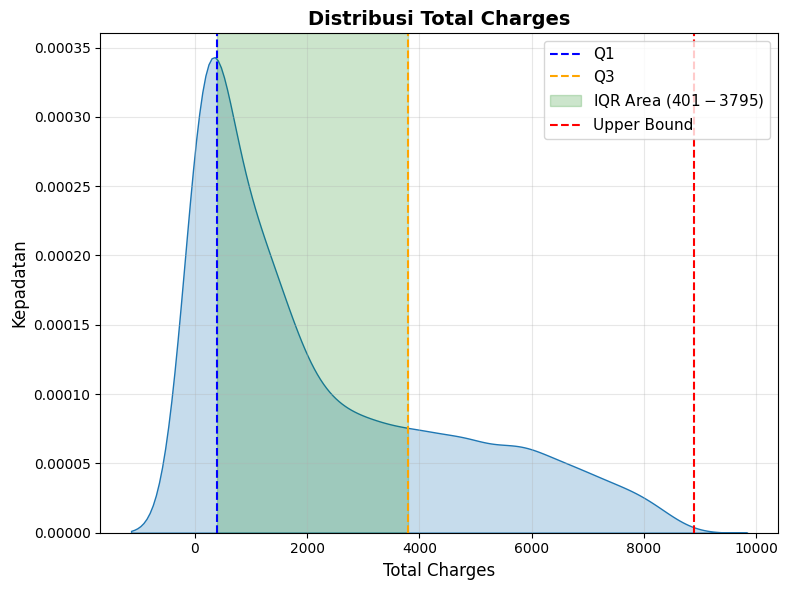

In [53]:
#garis upper bound
plt.figure(figsize=(8, 6))
sns.kdeplot(data=agung, x='TotalCharges', fill=True)
plt.title('Distribusi Total Charges', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.axvline(q1, color='blue', linestyle='--', label='Q1')
plt.axvline(q3, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1, q3, color='green', alpha=0.2, label=f'IQR Area (${q1:.0f} - ${q3:.0f})')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')

plt.tight_layout()
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()



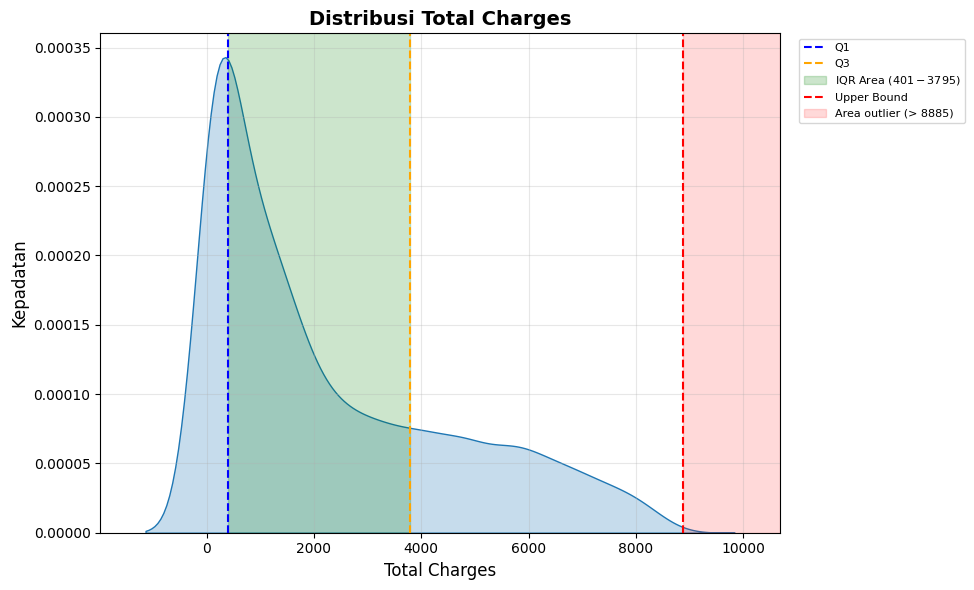

In [54]:
# arsir gg
plt.figure(figsize=(8, 6))
sns.kdeplot(data=agung, x='TotalCharges', fill=True)
plt.title('Distribusi Total Charges', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.axvline(q1, color='blue', linestyle='--', label='Q1')
plt.axvline(q3, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1, q3, color='green', alpha=0.2, label=f'IQR Area (${q1:.0f} - ${q3:.0f})')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
x_max = agung['TotalCharges'].max() + 2000
x_min = agung['TotalCharges'].min() - 2000
plt.xlim(x_min, x_max)
plt.axvspan(upper_bound, x_max, color='red', alpha=0.15, label='Area outlier (> 8885)')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1), fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()

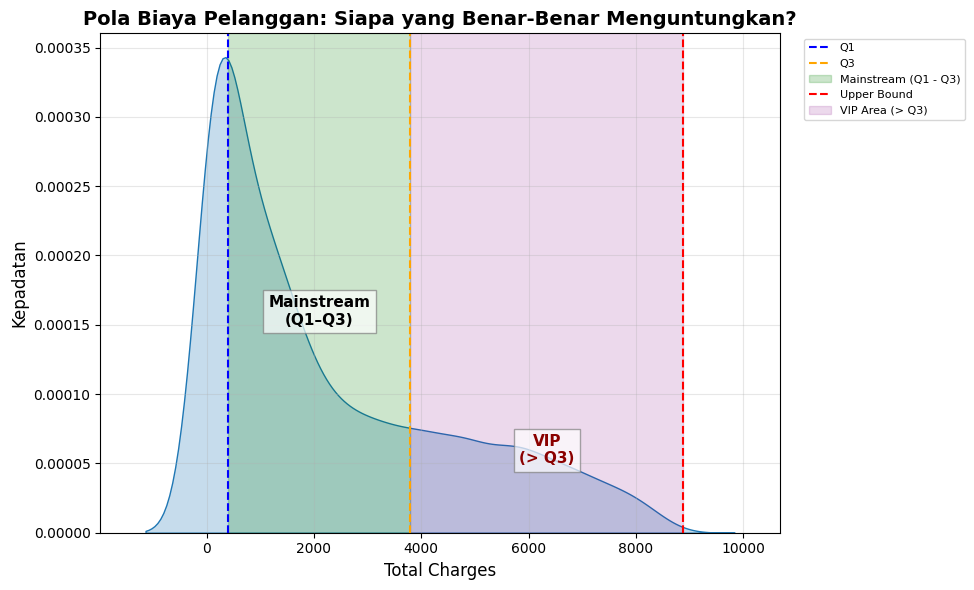

In [55]:
# arsir gg
plt.figure(figsize=(8, 6))
sns.kdeplot(data=agung, x='TotalCharges', fill=True)
plt.title('Pola Biaya Pelanggan: Siapa yang Benar-Benar Menguntungkan?', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.axvline(q1, color='blue', linestyle='--', label='Q1')
plt.axvline(q3, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1, q3, color='green', alpha=0.2, label=f'Mainstream (Q1 - Q3)')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
x_max = agung['TotalCharges'].max() + 2000
x_min = agung['TotalCharges'].min() - 2000
plt.xlim(x_min, x_max)
plt.axvspan(upper_bound, q3, color='purple', alpha=0.15, label='VIP Area (> Q3)')
plt.text((q1 + q3)/2, 0.00015, 'Mainstream\n(Q1–Q3)', ha='center', fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text((q3 + upper_bound)/2, 0.00005, 'VIP\n(> Q3)', ha='center', fontsize=11, fontweight='bold',color='darkred',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1), fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()

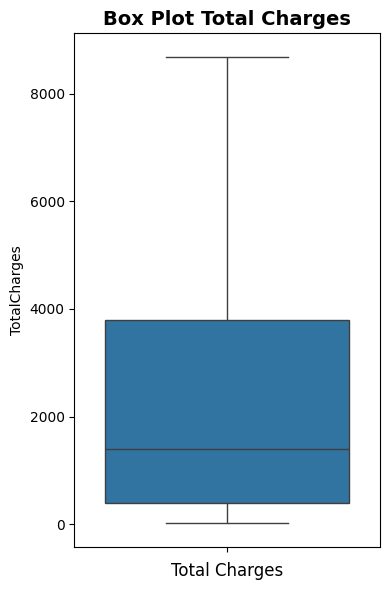

In [56]:
#box plot 
plt.figure(figsize=(4, 6))
sns.boxplot(data=agung, y='TotalCharges')
plt.title('Box Plot Total Charges', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges', fontsize=12)
plt.tight_layout()
plt.show()

### `interpretasi`

Berikut merupakan grafik **KDE plot yang akan digunakan menampilkan distribusi data**, Grafik memperlihatkan distribusi sebaran **pengeluaran pelanggan (TotalCharges**) dalam bentuk kurva kepadatan (KDE plot):

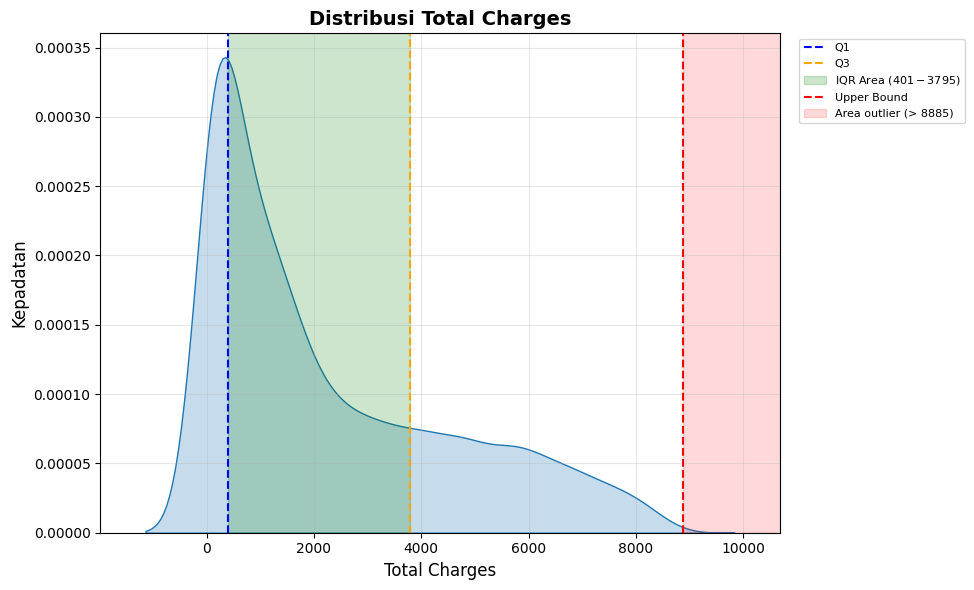

- Garis biru putus-putus menunjukan nilai Q1

- Garis Kuning putus-putus menunjukan nilai Q3

- Daerah yang diarsir hijau menggambarkan rentang Interquartile Range (IQR), yaitu wilayah antara kuartil pertama (Q1) dan kuartil ketiga (Q3) di mana sebagian besar data pelanggan berada.

- Daerah yang diarsir merah menggambarkan area yang yang merupakan outlier

- Distribusi TotalCharges condong ke kanan (positively skewed), artinya sebagian besar pelanggan membayar dalam jumlah relatif rendah, namun ada sedikit pelanggan yang membayar sangat tinggi.

- Q1 (kuartil bawah) berada di sekitar $401 dan Q3 (kuartil atas) di sekitar $3795, menunjukkan bahwa 50% pelanggan memiliki total biaya antara dua nilai tersebut (dalam rentang IQR).

- Upper Bound (Q3 + 1.5×IQR) berada di sekitar $8896. Area di atas ini dianggap outlier.

- Hampir seluruh data berada di bawah batas upper bound, artinya tidak banyak pelanggan yang benar-benar ekstrem dalam pengeluaran mereka.

Dilakukan analisa dengan menambahkan garis mean dan median

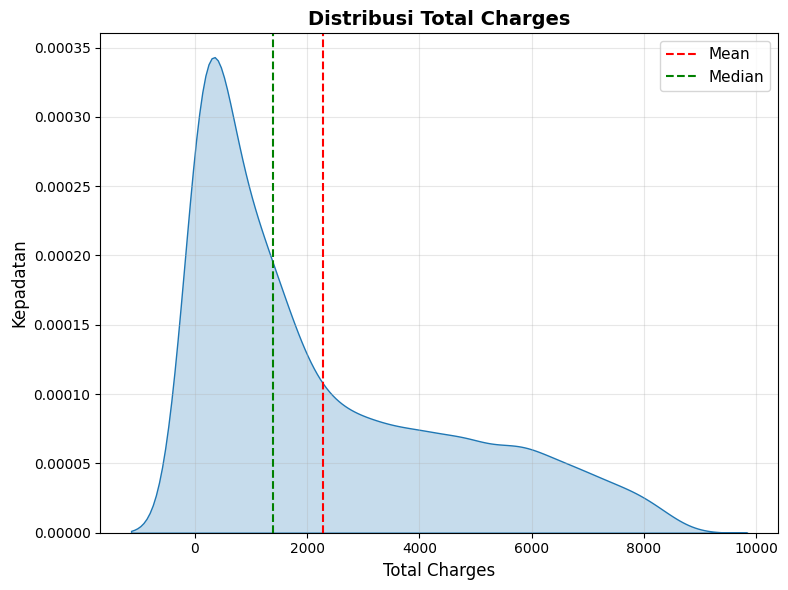

- Garis merah putus-putus menunjukkan nilai rata-rata (mean).

- Garis hijau putus-putus menunjukkan nilai median.

- Didapatkan bahwa nilai mean sebesar $2283.30 dan nilai median sebesar $1397.47, yang artinya grafik positively skewed.

Terlihat bahwa nilai mean berada di kanan (lebih tinggi) dibandingkan median, padahal:

- Sebagian besar data menumpuk di sebelah kiri grafik (sekitar 0–2000).

- Di bagian kanan grafik (nilai tinggi), data semakin jarang atau memiliki kepadatan rendah.

Median lebih representatif untuk ukuran pemusatan dalam kasus ini karena tidak terlalu dipengaruhi outlier dimana nilainya dapat dilihat langsung pada grafik ditandai dengan garis hijau yang berada tepat dinilai total charges yang memiliki kepadatan tinggi.

Dari hasil analisis statistik deskriptif di atas, kita tidak hanya mendapatkan gambaran umum tentang sebaran biaya pelanggan, tetapi juga mengungkap adanya pola-pola tersembunyi yang penting untuk strategi bisnis.

Distribusi yang condong ke kanan, dominasi pelanggan dalam rentang IQR, serta keberadaan segmen kecil dengan pengeluaran tinggi membuka peluang untuk melakukan segmentasi pasar yang lebih strategis dan berbasis data.

Inilah yang menjadi dasar untuk menjawab pertanyaan kunci berikut:


### `Siapa yang benar-benar menguntungkan?`

Berikut adalah interpretasi dari grafik distribusi Total Charges yang telah dikelompokkan ke dalam dua segmen pasar: Mainstream dan VIP.

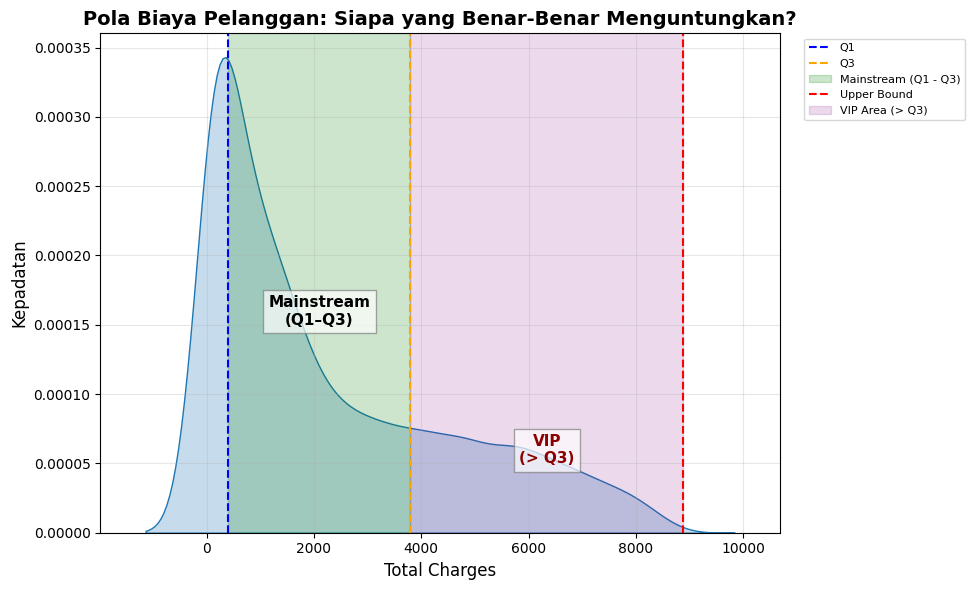



Dari visualisasi distribusi TotalCharges, kita dapat mengidentifikasi dua segmen utama pelanggan berdasarkan kuartil:

- Mainstream (Q1–Q3) → Biaya pelanggan berada di rentang interquartile range (IQR)

- VIP (> Q3) → Pelanggan yang membayar jauh di atas rata-rata

#### *Mainstream = Volume Besar, Stabilitas Tinggi*

Kelompok ini mendominasi jumlah pelanggan. Meski tiap individu menyumbang pendapatan moderat, secara kolektif mereka adalah tulang punggung bisnis.
Strategi:

- Jaga kepuasan dengan pelayanan yang efisien dan harga yang kompetitif

- Fokus pada retensi dan loyalitas

#### *VIP = Volume Kecil, Potensi Margin Tinggi*
Pelanggan VIP membayar jauh lebih tinggi dari pelanggan rata-rata.
Strategi:

- Ciptakan layanan eksklusif atau program loyalti kelas atas

- Berikan perhatian personal, seperti layanan prioritas, hadiah loyalitas, atau promo khusus

#### *Peluang Segmentasi & Personalisasi*
Pendekatan satu ukuran untuk semua tidak lagi efektif. Dengan segmentasi berbasis perilaku biaya, kita bisa menawarkan layanan yang lebih relevan.
Strategi:

- Kampanye pemasaran tertarget berdasarkan pola pengeluaran

- Buat paket khusus untuk masing-masing segmen

#### *Mendorong Pelanggan Mainstream ke VIP*
Pelajari karakteristik pelanggan VIP: durasi langganan, produk yang dibeli, atau channel favorit mereka.
Strategi:

- Ciptakan jalur naik kelas dengan edukasi nilai tambah

- Tawarkan insentif upsell atau cross-sell secara bertahap

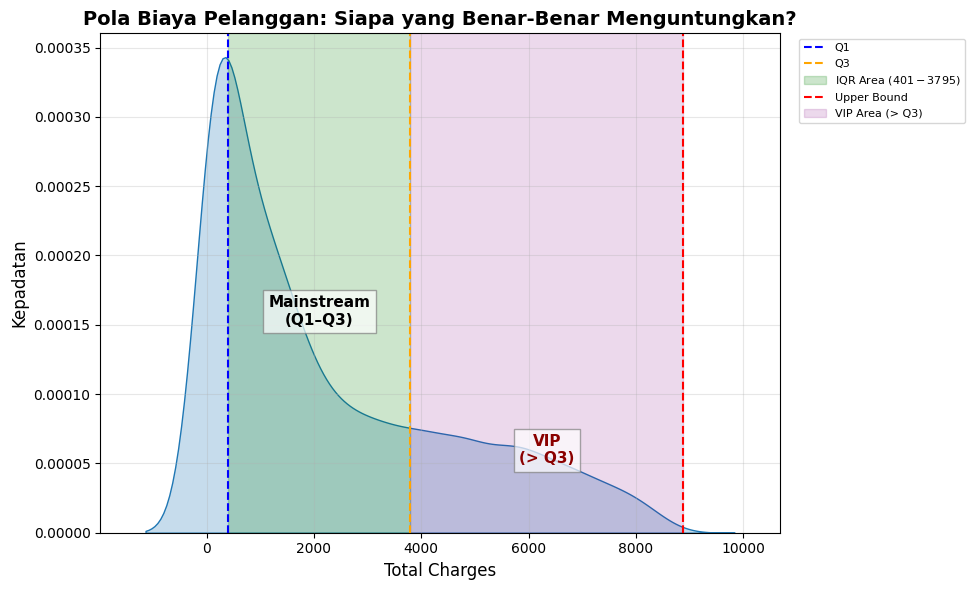

---

## `Soal 5`

Apakah pelanggan yang memiliki biaya bulanan lebih tinggi akan cenderung untuk berhenti berlangganan (churn)? (15 poin)

Langkah-langkah:
- Bandingkan distribusi biaya bulanan antara pelanggan yang berhenti dan tetap
berlangganan.
- Untuk mempermudah, buat graﬁk dengan data tersebut menggunakan library seaborn dan gunakan parameter ‘hue’

Untuk mempermudah kamu, yuk lihat resource di bawah ini:
- Topic Data Visualization: Materi Advanced Plot - bagian Multi Distribution plot

In [57]:
agung['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

In [58]:
agung['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [59]:
agung.groupby('Churn')['MonthlyCharges'].describe()

count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\651463370.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', loc='upper right')


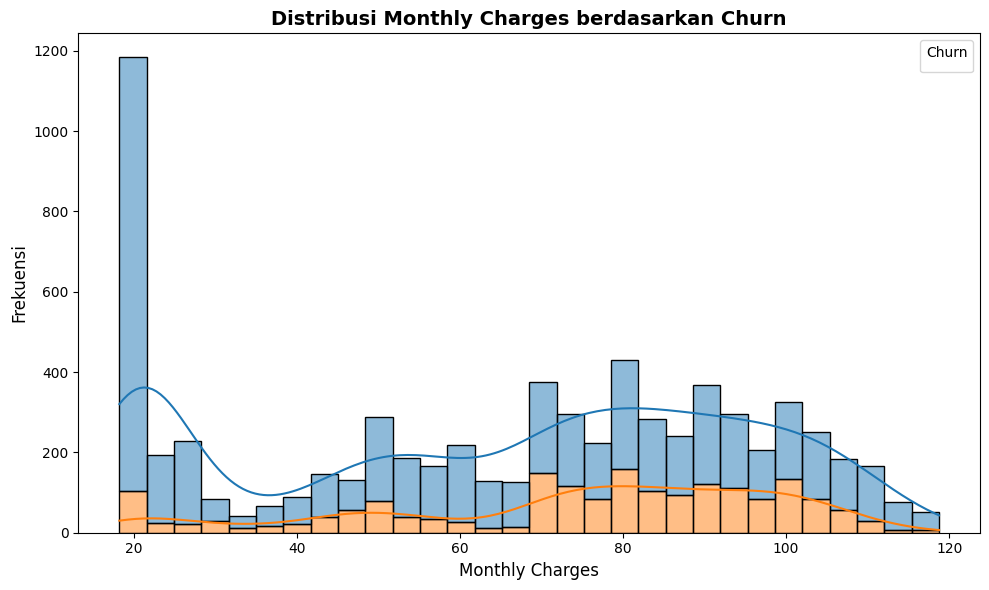

In [60]:
#histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=agung, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True, bins=30)
plt.title('Distribusi Monthly Charges berdasarkan Churn', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

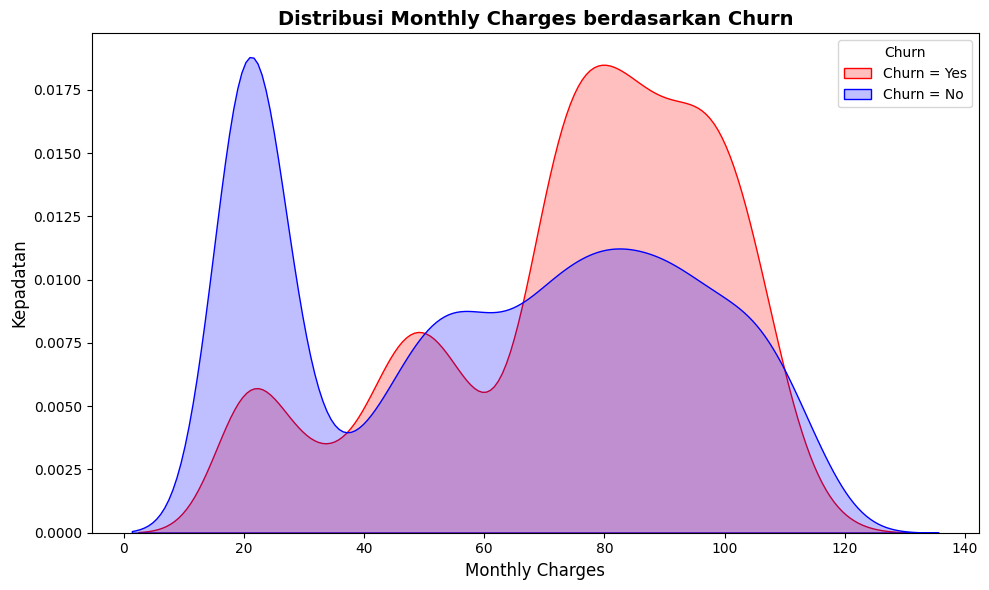

In [61]:
#kdeplot khusus churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=agung[agung['Churn'] == 'Yes'], x='MonthlyCharges', fill=True, label='Churn = Yes', color='red')
sns.kdeplot(data=agung[agung['Churn'] == 'No'], x='MonthlyCharges', fill=True, label='Churn = No', color='blue')
plt.title('Distribusi Monthly Charges berdasarkan Churn', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

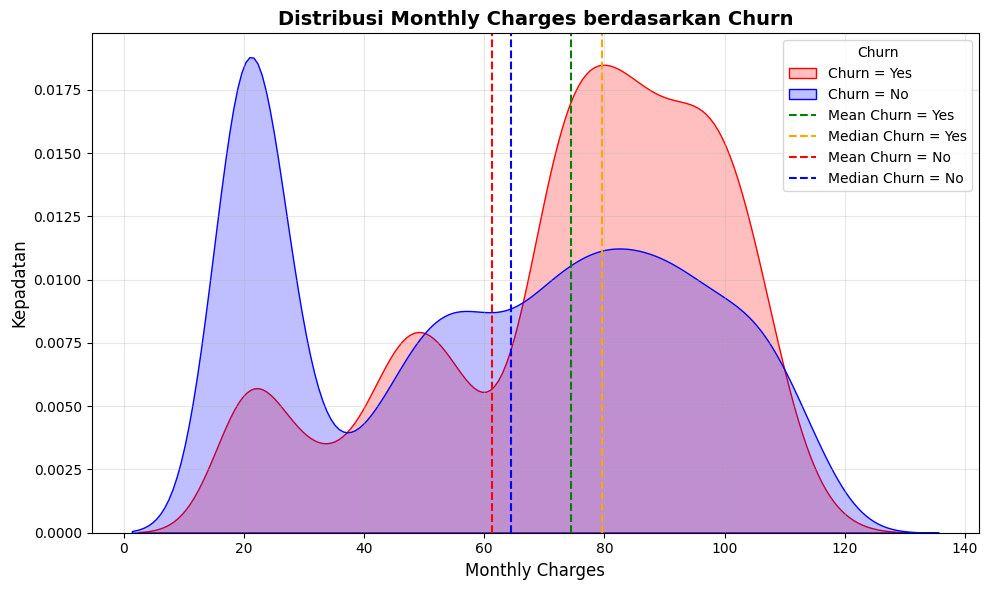

In [62]:
# kde plot churn garis mean median
plt.figure(figsize=(10, 6))
sns.kdeplot(data=agung[agung['Churn'] == 'Yes'], x='MonthlyCharges', fill=True, label='Churn = Yes', color='red')
sns.kdeplot(data=agung[agung['Churn'] == 'No'], x='MonthlyCharges', fill=True, label='Churn = No', color='blue')
plt.axvline(agung[agung['Churn'] == 'Yes']['MonthlyCharges'].mean(), color='green', linestyle='--', label='Mean Churn = Yes')
plt.axvline(agung[agung['Churn'] == 'Yes']['MonthlyCharges'].median(), color='orange', linestyle='--', label='Median Churn = Yes')
plt.axvline(agung[agung['Churn'] == 'No']['MonthlyCharges'].mean(), color='red', linestyle='--', label='Mean Churn = No')
plt.axvline(agung[agung['Churn'] == 'No']['MonthlyCharges'].median(), color='blue', linestyle='--', label='Median Churn = No')
plt.title('Distribusi Monthly Charges berdasarkan Churn', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

In [63]:
#nilai iqr
q1_churn_yes = agung[agung['Churn'] == 'Yes']['MonthlyCharges'].quantile(0.25)
q3_churn_yes = agung[agung['Churn'] == 'Yes']['MonthlyCharges'].quantile(0.75)
iqr_churn_yes = q3_churn_yes - q1_churn_yes
q1_churn_no = agung[agung['Churn'] == 'No']['MonthlyCharges'].quantile(0.25)
q3_churn_no = agung[agung['Churn'] == 'No']['MonthlyCharges'].quantile(0.75)
iqr_churn_no = q3_churn_no - q1_churn_no
print(f"IQR Churn = Yes: {iqr_churn_yes}")
print(f"IQR Churn = No: {iqr_churn_no}")


IQR Churn = Yes: 38.050000000000004
IQR Churn = No: 63.300000000000004


In [64]:
# upper bound dan lower bound
lower_bound_churn_yes = q1_churn_yes - 1.5 * iqr_churn_yes
upper_bound_churn_yes = q3_churn_yes + 1.5 * iqr_churn_yes
lower_bound_churn_no = q1_churn_no - 1.5 * iqr_churn_no
upper_bound_churn_no = q3_churn_no + 1.5 * iqr_churn_no
print(f"Lower Bound Churn = Yes: {lower_bound_churn_yes}")
print(f"Upper Bound Churn = Yes: {upper_bound_churn_yes}")
print(f"Lower Bound Churn = No: {lower_bound_churn_no}")
print(f"Upper Bound Churn = No: {upper_bound_churn_no}")

Lower Bound Churn = Yes: -0.9250000000000043
Upper Bound Churn = Yes: 151.275
Lower Bound Churn = No: -69.85
Upper Bound Churn = No: 183.35000000000002


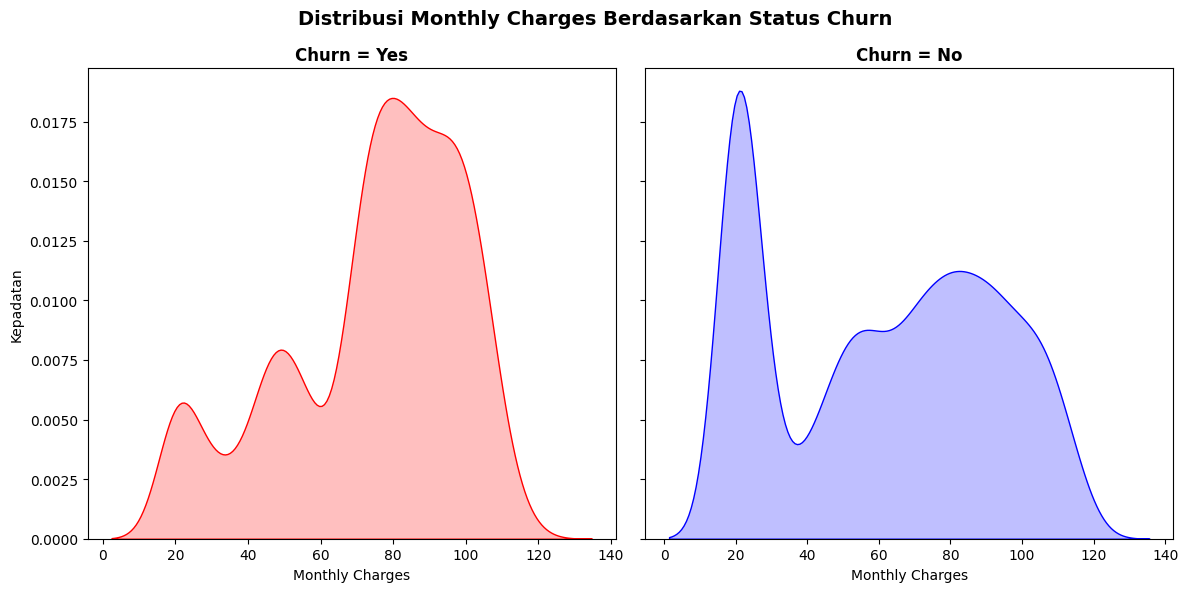

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)


sns.kdeplot(data=agung[agung['Churn'] == 'Yes'], x='MonthlyCharges', fill=True, ax=axes[0],color='red')
axes[0].set_title('Churn = Yes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Kepadatan')


sns.kdeplot(data=agung[agung['Churn'] == 'No'],x='MonthlyCharges',fill=True,ax=axes[1],color='blue')
axes[1].set_title('Churn = No', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('')

fig.suptitle('Distribusi Monthly Charges Berdasarkan Status Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


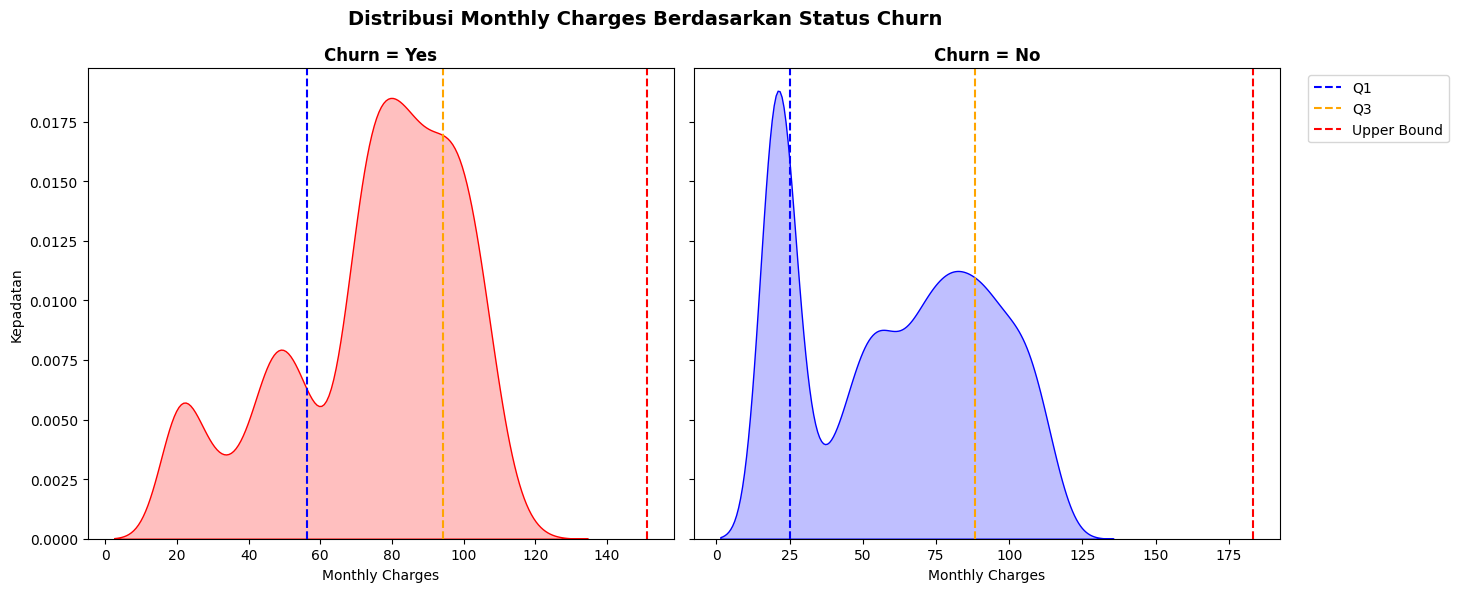

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

sns.kdeplot(data=agung[agung['Churn'] == 'Yes'], x='MonthlyCharges', fill=True, ax=axes[0], color='red')
axes[0].set_title('Churn = Yes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Kepadatan')

sns.kdeplot(data=agung[agung['Churn'] == 'No'], x='MonthlyCharges', fill=True, ax=axes[1], color='blue')
axes[1].set_title('Churn = No', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('')

axes[0].axvline(q1_churn_yes, color='blue', linestyle='--', label='Q1')
axes[0].axvline(q3_churn_yes, color='orange', linestyle='--', label='Q3')
axes[0].axvline(upper_bound_churn_yes, color='red', linestyle='--', label='Upper Bound')
axes[1].axvline(q1_churn_no, color='blue', linestyle='--', label='Q1')
axes[1].axvline(q3_churn_no, color='orange', linestyle='--', label='Q3')
axes[1].axvline(upper_bound_churn_no, color='red', linestyle='--', label='Upper Bound')

fig.suptitle('Distribusi Monthly Charges Berdasarkan Status Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.legend(loc='upper right',  bbox_to_anchor=(1.30, 1), fontsize=10)
plt.show()

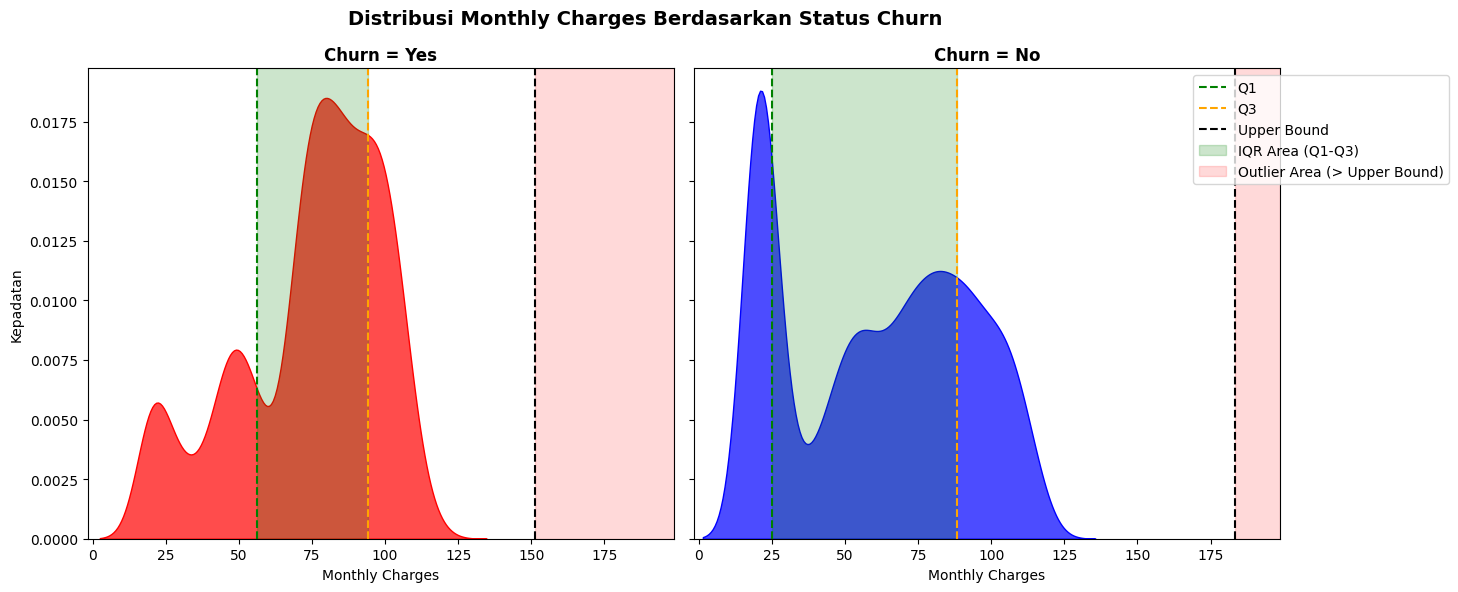

In [67]:
# arsir area iqr dan outlier
fig, axes = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

sns.kdeplot(data=agung[agung['Churn'] == 'Yes'], x='MonthlyCharges', fill=True, ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Churn = Yes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Kepadatan')

sns.kdeplot(data=agung[agung['Churn'] == 'No'], x='MonthlyCharges', fill=True, ax=axes[1], color='blue', alpha=0.7)
axes[1].set_title('Churn = No', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('')

axes[0].axvline(q1_churn_yes, color='green', linestyle='--', label='Q1')
axes[0].axvline(q3_churn_yes, color='orange', linestyle='--', label='Q3')
axes[0].axvline(upper_bound_churn_yes, color='black', linestyle='--', label='Upper Bound')
axes[1].axvline(q1_churn_no, color='green', linestyle='--', label='Q1')
axes[1].axvline(q3_churn_no, color='orange', linestyle='--', label='Q3')
axes[1].axvline(upper_bound_churn_no, color='black', linestyle='--', label='Upper Bound')

x_max_bulanan = agung['MonthlyCharges'].max() + 80
x_min_bulanan = agung['MonthlyCharges'].min() - 20
axes[0].set_xlim(x_min_bulanan, x_max_bulanan)
axes[1].set_xlim(x_min_bulanan, x_max_bulanan)
axes[0].axvspan(q1_churn_yes, q3_churn_yes, color='green', alpha=0.2, label='IQR Area (Q1-Q3)')
axes[1].axvspan(q1_churn_no, q3_churn_no, color='green', alpha=0.2, label='IQR Area (Q1-Q3)')
axes[0].axvspan(upper_bound_churn_yes, x_max_bulanan, color='red', alpha=0.15, label='Outlier Area (> Upper Bound)')
axes[1].axvspan(upper_bound_churn_no, x_max_bulanan, color='red', alpha=0.15, label='Outlier Area (> Upper Bound)')
fig.suptitle('Distribusi Monthly Charges Berdasarkan Status Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1), fontsize=10)
plt.show()

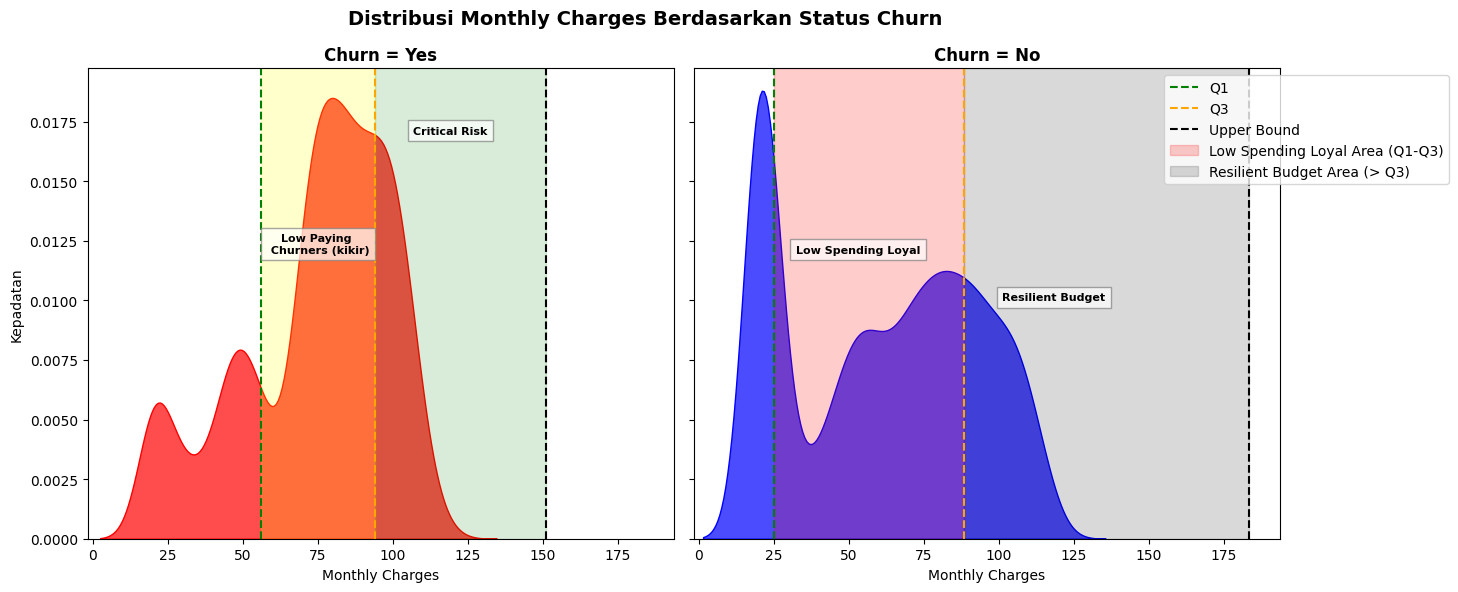

In [68]:
# gacorr
fig, axes = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

sns.kdeplot(data=agung[agung['Churn'] == 'Yes'], x='MonthlyCharges', fill=True, ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Churn = Yes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Kepadatan')

sns.kdeplot(data=agung[agung['Churn'] == 'No'], x='MonthlyCharges', fill=True, ax=axes[1], color='blue', alpha=0.7)
axes[1].set_title('Churn = No', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('')

axes[0].axvline(q1_churn_yes, color='green', linestyle='--', label='Q1')
axes[0].axvline(q3_churn_yes, color='orange', linestyle='--', label='Q3')
axes[0].axvline(upper_bound_churn_yes, color='black', linestyle='--', label='Upper Bound')
axes[1].axvline(q1_churn_no, color='green', linestyle='--', label='Q1')
axes[1].axvline(q3_churn_no, color='orange', linestyle='--', label='Q3')
axes[1].axvline(upper_bound_churn_no, color='black', linestyle='--', label='Upper Bound')

x_max_bulanan = agung['MonthlyCharges'].max() + 75
x_min_bulanan = agung['MonthlyCharges'].min() - 20

axes[0].set_xlim(x_min_bulanan, x_max_bulanan)
axes[1].set_xlim(x_min_bulanan, x_max_bulanan)
axes[0].axvspan(q1_churn_yes, q3_churn_yes, color='yellow', alpha=0.2, label='Low Paying Churners (kikir) Area (Q1-Q3)')
axes[1].axvspan(q1_churn_no, q3_churn_no, color='red', alpha=0.2, label='Low Spending Loyal Area (Q1-Q3)')
axes[0].axvspan(upper_bound_churn_yes, q3_churn_yes, color='green', alpha=0.15, label='Critical Risk Area (> Q3)')
axes[1].axvspan(upper_bound_churn_no, q3_churn_no, color='black', alpha=0.15, label='Resilient Budget Area (> Q3)')

axes[0].text(q1_churn_yes + 19, 0.012, 'Low Paying \n Churners (kikir)', ha='center', fontsize=8, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
axes[0].text(q3_churn_yes + 25, 0.017, 'Critical Risk', ha='center', fontsize=8, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

axes[1].text(q1_churn_no + 28, 0.012, 'Low Spending Loyal', ha='center', fontsize=8, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
axes[1].text(q3_churn_no + 30, 0.010, 'Resilient Budget', ha='center', fontsize=8, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
fig.suptitle('Distribusi Monthly Charges Berdasarkan Status Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1), fontsize=10)
plt.show()

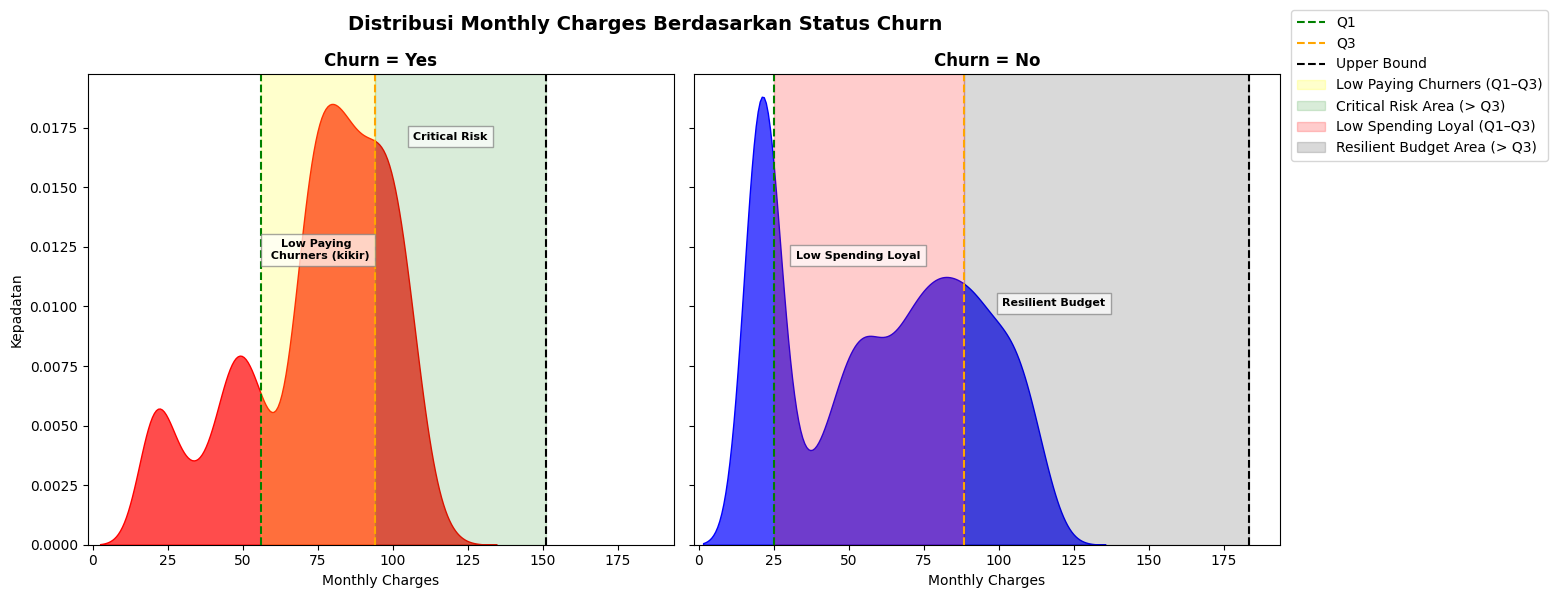

In [69]:
# gacorr bet
fig, axes = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

sns.kdeplot(data=agung[agung['Churn'] == 'Yes'], x='MonthlyCharges', fill=True, ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Churn = Yes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Kepadatan')

sns.kdeplot(data=agung[agung['Churn'] == 'No'], x='MonthlyCharges', fill=True, ax=axes[1], color='blue', alpha=0.7)
axes[1].set_title('Churn = No', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('')

axes[0].axvline(q1_churn_yes, color='green', linestyle='--', label='Q1')
axes[0].axvline(q3_churn_yes, color='orange', linestyle='--', label='Q3')
axes[0].axvline(upper_bound_churn_yes, color='black', linestyle='--', label='Upper Bound')
axes[1].axvline(q1_churn_no, color='green', linestyle='--', label='Q1')
axes[1].axvline(q3_churn_no, color='orange', linestyle='--', label='Q3')
axes[1].axvline(upper_bound_churn_no, color='black', linestyle='--', label='Upper Bound')

x_max_bulanan = agung['MonthlyCharges'].max() + 75
x_min_bulanan = agung['MonthlyCharges'].min() - 20
axes[0].set_xlim(x_min_bulanan, x_max_bulanan)
axes[1].set_xlim(x_min_bulanan, x_max_bulanan)

axes[0].axvspan(q1_churn_yes, q3_churn_yes, color='yellow', alpha=0.2, label='Low Paying Churners (Q1–Q3)')
axes[1].axvspan(q1_churn_no, q3_churn_no, color='red', alpha=0.2, label='Low Spending Loyal (Q1–Q3)')
axes[0].axvspan(upper_bound_churn_yes, q3_churn_yes, color='green', alpha=0.15, label='Critical Risk Area (> Q3)')
axes[1].axvspan(upper_bound_churn_no, q3_churn_no, color='black', alpha=0.15, label='Resilient Budget Area (> Q3)')

axes[0].text(q1_churn_yes + 19, 0.012, 'Low Paying \n Churners (kikir)', ha='center', fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
axes[0].text(q3_churn_yes + 25, 0.017, 'Critical Risk', ha='center', fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
axes[1].text(q1_churn_no + 28, 0.012, 'Low Spending Loyal', ha='center', fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
axes[1].text(q3_churn_no + 30, 0.010, 'Resilient Budget', ha='center', fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

handles_0, labels_0 = axes[0].get_legend_handles_labels()
handles_1, labels_1 = axes[1].get_legend_handles_labels()

all_handles = handles_0 + handles_1
all_labels = labels_0 + labels_1

unique = dict()
for h, l in zip(all_handles, all_labels):
    if l not in unique:
        unique[l] = h


fig.legend(unique.values(), unique.keys(), loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=10)

fig.suptitle('Distribusi Monthly Charges Berdasarkan Status Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


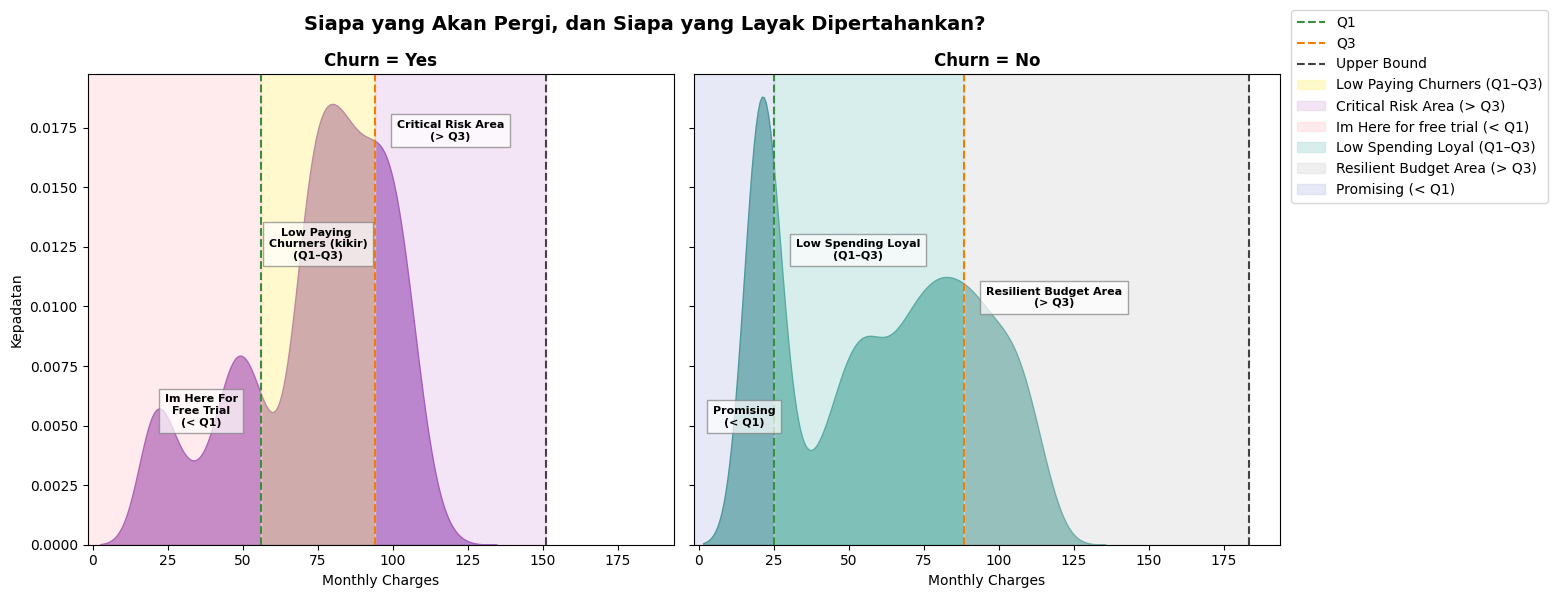

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

sns.kdeplot(data=agung[agung['Churn'] == 'Yes'], x='MonthlyCharges', fill=True, ax=axes[0], color='#7B1FA2', alpha=0.7)
axes[0].set_title('Churn = Yes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Kepadatan')

sns.kdeplot(data=agung[agung['Churn'] == 'No'], x='MonthlyCharges', fill=True, ax=axes[1], color='#00796B', alpha=0.7)
axes[1].set_title('Churn = No', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('')

axes[0].axvline(q1_churn_yes, color='#388E3C', linestyle='--', label='Q1')
axes[0].axvline(q3_churn_yes, color='#F57C00', linestyle='--', label='Q3')
axes[0].axvline(upper_bound_churn_yes, color='#424242', linestyle='--', label='Upper Bound')
axes[1].axvline(q1_churn_no, color='#388E3C', linestyle='--', label='Q1')
axes[1].axvline(q3_churn_no, color='#F57C00', linestyle='--', label='Q3')
axes[1].axvline(upper_bound_churn_no, color='#424242', linestyle='--', label='Upper Bound')

x_max_bulanan = agung['MonthlyCharges'].max() + 75
x_min_bulanan = agung['MonthlyCharges'].min() - 20
axes[0].set_xlim(x_min_bulanan, x_max_bulanan)
axes[1].set_xlim(x_min_bulanan, x_max_bulanan)

axes[0].axvspan(q1_churn_yes, q3_churn_yes, color='#FFF59D', alpha=0.5, label='Low Paying Churners (Q1–Q3)')
axes[0].axvspan(upper_bound_churn_yes, q3_churn_yes, color='#E1BEE7', alpha=0.4, label='Critical Risk Area (> Q3)')
axes[1].axvspan(q1_churn_no, q3_churn_no, color='#B2DFDB', alpha=0.5, label='Low Spending Loyal (Q1–Q3)')
axes[1].axvspan(upper_bound_churn_no, q3_churn_no, color='#E0E0E0', alpha=0.5, label='Resilient Budget Area (> Q3)')

axes[0].axvspan(x_min_bulanan, q1_churn_yes, color='#FFCDD2', alpha=0.4, label='Im Here for free trial (< Q1)')
axes[1].axvspan(x_min_bulanan, q1_churn_no, color='#C5CAE9', alpha=0.4, label='Promising (< Q1)')



axes[0].text(q1_churn_yes + 19, 0.012, 'Low Paying \nChurners (kikir)\n(Q1–Q3)', ha='center',fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

axes[0].text(q3_churn_yes + 25, 0.017, 'Critical Risk Area\n(> Q3)', ha='center',fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

axes[1].text(q1_churn_no + 28, 0.012, 'Low Spending Loyal\n(Q1–Q3)', ha='center',fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

axes[1].text(q3_churn_no + 30, 0.010, 'Resilient Budget Area\n(> Q3)', ha='center',fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

axes[0].text(q1_churn_yes - 20, 0.005, 'Im Here For\nFree Trial\n(< Q1)', ha='center', fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

axes[1].text(q1_churn_no - 10, 0.005, 'Promising\n(< Q1)', ha='center',fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))


handles_0, labels_0 = axes[0].get_legend_handles_labels()
handles_1, labels_1 = axes[1].get_legend_handles_labels()
all_handles = handles_0 + handles_1
all_labels = labels_0 + labels_1
unique = dict()
for h, l in zip(all_handles, all_labels):
    if l not in unique:
        unique[l] = h

fig.legend(unique.values(), unique.keys(), loc='upper right', bbox_to_anchor=(1.20, 1), fontsize=10)

# Judul keseluruhan
fig.suptitle('Siapa yang Akan Pergi, dan Siapa yang Layak Dipertahankan?', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


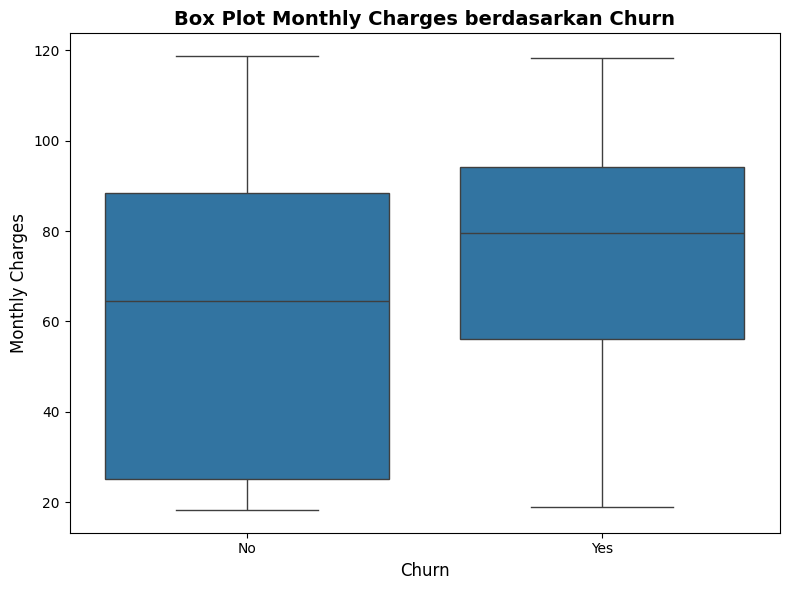

In [71]:
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=agung, x='Churn', y='MonthlyCharges')
plt.title('Box Plot Monthly Charges berdasarkan Churn', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [72]:
from scipy.stats import mannwhitneyu

churn_yes = agung[agung['Churn'] == 'Yes']['MonthlyCharges']
churn_no = agung[agung['Churn'] == 'No']['MonthlyCharges']

In [73]:
# Lakukan uji Mann-Whitney U Test
stat, p = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

In [74]:
# Tampilkan hasil
print("Statistik U:", stat)
print("p-value:", p)

Statistik U: 6003125.5
p-value: 3.311627651988584e-54


In [75]:
alpha = 0.05
if p < alpha:
    print("Hasil: Tolak H0 → Terdapat perbedaan signifikan antara biaya bulanan pelanggan churn dan tidak churn.")
else:
    print("Hasil: Gagal tolak H0 → Tidak terdapat perbedaan signifikan antara biaya bulanan pelanggan churn dan tidak churn.")

Hasil: Tolak H0 → Terdapat perbedaan signifikan antara biaya bulanan pelanggan churn dan tidak churn.


### `Interpretasi`

Grafik KDE ini membandingkan sebaran biaya bulanan (MonthlyCharges) antara pelanggan yang Churn (Yes) dan Tidak Churn (No), lengkap dengan garis vertikal yang menandai mean (rata-rata) dan median (nilai tengah) untuk masing-masing kelompok:

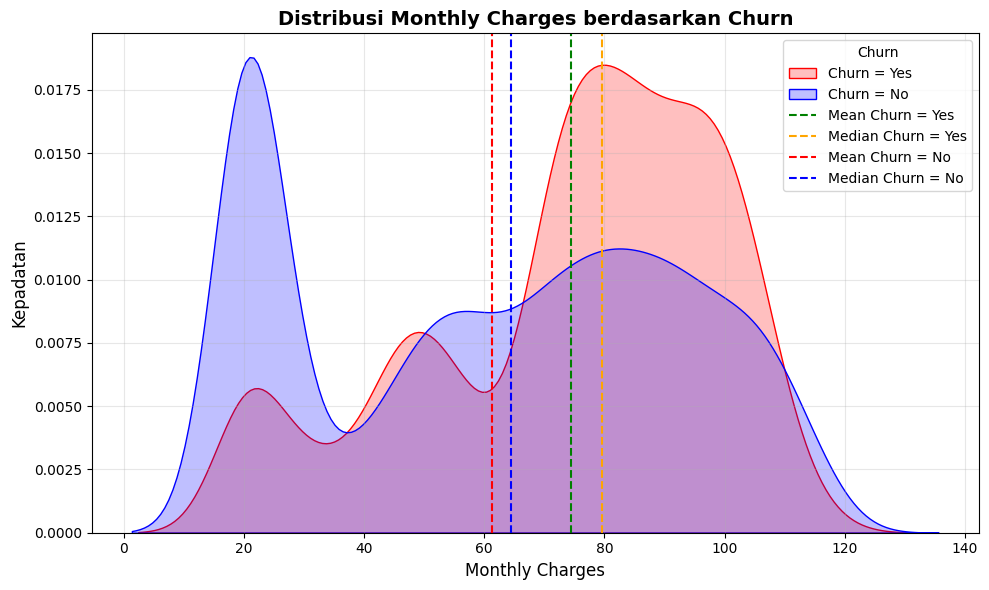

Churn = Yes
- Garis hijau putus-putus: Mean ≈ 74.44

- Garis oranye putus-putus: Median ≈ 79.65

**Terlihat bahwa median berada di kanan mean, yang merupakan ciri khas distribusi condong ke kiri (negatively skewed)**. Ini menunjukkan bahwa sebagian besar pelanggan churn berada di biaya menengah ke atas, dengan sedikit pelanggan yang membayar sangat rendah dan menarik nilai mean ke kiri.

Churn = No
- Garis merah putus-putus: Mean ≈ 61.27

- Garis biru putus-putus: Median ≈ 64.43

Pada kelompok pelanggan yang tidak churn, median sedikit lebih besar dari mean, namun posisinya cukup dekat menunjukkan bahwa distribusi cukup simetris, atau mendekati normal.

Distribusi churn condong ke kiri (negatively skewed) artinya banyak pelanggan churn justru membayar cukup tinggi. dan Distribusi pelanggan tidak churn cenderung lebih seimbang dan normal.

### Uji Mann-Whiteney
Untuk m**endukung visualisasi distribusi MonthlyCharges berdasarkan status Churn, dilakukan Uji Mann–Whitney U.** Uji ini digunakan karena:
- **Data MonthlyCharges tidak berdistribusi normal**, terutama pada kelompok Churn = Yes (skewed).
- Mann–Whitney U adalah uji non-parametrik yang **cocok untuk dua sampel independen dengan distribusi tidak normal.**

Statistik U: 6,003,125.5

- p-value: 3.31 × 10-54

- α (alpha): 0.05

Karena **p-value < α (0.05)**, maka keputusan uji adalah Tolak Ho.

Maka :
 
- **Terdapat perbedaan yang signifikan secara statistik antara distribusi MonthlyCharges pelanggan yang churn dan tidak churn.** Dengan kata lain, biaya bulanan memengaruhi kemungkinan pelanggan akan berhenti berlangganan atau tetap bertahan.

Hasil ini **konsisten dan memperkuat visualisasi KDE yang telah ditampilkan sebelumnya**:

- Distribusi MonthlyCharges jelas berbeda bentuk antara dua kelompok.

- Perbedaan ukuran pemusatan (median) serta bentuk distribusi menunjukkan pola perilaku pelanggan yang tidak sama.

- Hasil uji statistik membuktikan bahwa perbedaan tersebut bukan sekadar kebetulan (random variation).

Setelah terbukti secara statistik bahwa terdapat perbedaan signifikan antara MonthlyCharges pelanggan churn dan tidak churn melalui uji Mann–Whitney, langkah selanjutnya adalah:

- Memahami **bagaimana perbedaan ini terdistribusi di dalam kelompok masing-masing, serta bagaimana kita bisa mengidentifikasi karakteristik dari pelanggan di tiap rentang.**

**Kita sudah tahu "ada perbedaan"**, dan Sekarang kita ingin tahu **"perbedaan itu berada di mana dan seperti apa bentuknya?"**

### IQR

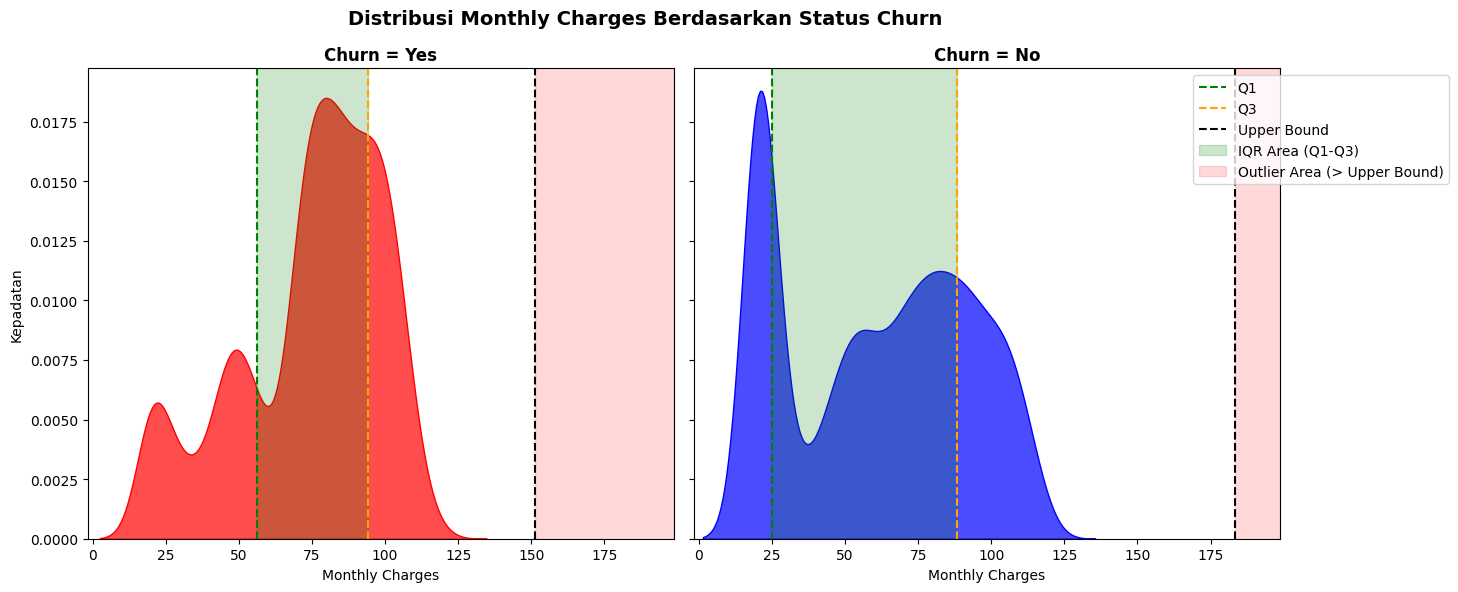

Gambar berikut menampilkan distribusi biaya bulanan (MonthlyCharges) berdasarkan status Churn, diperkaya dengan:

- Garis Q1 dan Q3 → untuk membentuk IQR (rentang tengah data)

- Garis Upper Bound → untuk menentukan area outlier

- Arsiran hijau → wilayah utama (IQR), tempat mayoritas pelanggan berada

- Arsiran merah muda → wilayah di atas Upper Bound, diasumsikan sebagai pelanggan premium atau ekstrem

**Dengan pembagian ini, kita dapat melakukan segmentasi** pelanggan berdasarkan karakteristik biaya bulanan mereka. Berikut contohnya:

Churn = Yes

- (< Q1) 	Eksperimen/Pengguna Trial → Berbiaya rendah, mudah churn
- (Q1 – Q3 (IQR))	Low Paying Churners → Membayar moderat, tapi tidak loyal
- (> Q3)	Critical Risk → Membayar mahal, tapi tetap churn → Bencana Besar

Churn = No
- (< Q1)	Promising Budget Users → Biaya rendah, tetap loyal
- (Q1 – Q3 (IQR))	Low Spending Loyalists → Stabil, hemat, setia
- (> Q3)	Resilient Budget/Premiums → Membayar tinggi dan tetap bertahan → aset bisnis utama / ternak uang (Timothy Ronald)

Plot segmentasi di atas menunjukkan bagaimana dan di mana perbedaan itu terjadi, serta apa arti bisnisnya. **Dengan membingkai plot berdasarkan status churn dan segmentasi biaya**, grafik ini **menjawab satu pertanyaan strategis penting**:

### `"Siapa pelanggan yang akan pergi, dan siapa yang layak dipertahankan?"`

Visualisasi ini menyajikan pelanggan berdasarkan biaya bulanan (Monthly Charges) dan status churn, yang telah dibagi ke dalam segmen-segmen perilaku berbasis kuartil (Q1, Q3). Hasilnya bukan sekadar distribusi statistik. **ini adalah peta risiko dan peluang bisnis**.

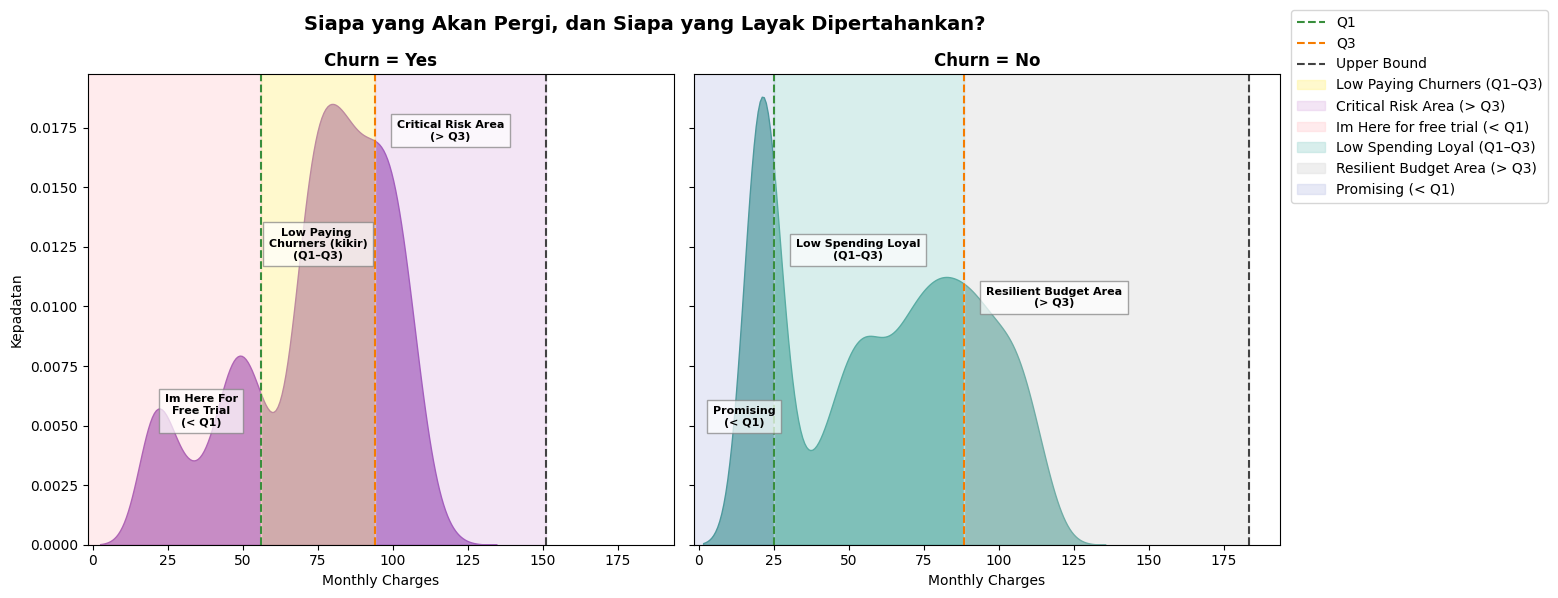

#### 1. Churn = Yes → Mereka yang Akan Pergi

- `Im Here For Free Trial (< Q1)`
**Segmen ini terdiri dari pelanggan yang membayar sangat rendah**. Mereka mungkin hanya **mencoba layanan**, tidak terlalu terikat, dan mudah hilang. Mereka tidak loyal, dan tidak menghasilkan pendapatan signifikan.

Implikasi: **Biarkan churn, atau tawarkan upsell awal bila ada sinyal potensi naik.**

- `Low Paying Churners (Q1–Q3)`
**Pelanggan di area utama namun tetap churn**. Mereka **membayar cukup** tetapi mungkin **tidak merasakan nilai tambah.**

Implikasi: Sinyal bahaya Segmentasi ini menunjukkan potensi **kegagalan layanan utama** (seperti phoneservice, internet). lakukan evaluasi kualitas layanan.

- `Critical Risk Area (> Q3)`
**Pelanggan yang membayar tinggi namun tetap churn**. Ini adalah **Sinyal paling kritis** pelanggan yang kecewa meskipun telah investasi besar.

Implikasi: **Segera lakukan intervensi! Perbaiki customer experience**, lakukan analisis individual, dan periksa semuanya bisa jadi layanan internet diretas hengker.

#### 2. Churn = No → Mereka yang Bertahan

- `Promising (< Q1)`
**Mereka membayar rendah namun tidak churn**. Ini adalah **benih loyalitas jangka panjang**, yang mungkin **akan bertumbuh** jika diberikan perhatian.

Implikasi: Bangun engagement secara bertahap. Program onboarding, fitur discovery, dan promosi bertarget **bisa membuka potensi** mereka.

- `Low Spending Loyal (Q1–Q3)`
**Ini adalah mayoritas pelanggan**. Mereka loyal meski pengeluaran moderat. **Merekalah tulang punggung stabilitas bisnis**.

Implikasi: **Jaga hubungan**, sediakan fitur bernilai tinggi tanpa memaksa mereka naik paket. Fokus pada retensi dan kepuasan.

- `Resilient Budget Area (> Q3)`
**Pelanggan ini membayar tinggi dan tetap loyal**. Mereka adalah **premium customers** yang percaya pada nilai yang ditawarkan.

Implikasi: Pertahankan dengan layanan eksklusif, loyalty program, atau **akses prioritas**. Mereka adalah segmen yang memberi margin tinggi.


#### Implikasi Bisnis: Data yang Bicara, Strategi yang Bekerja
Dengan membagi pelanggan berdasarkan perilaku aktual mereka (biaya dan churn), kita tidak lagi mengandalkan intuisi atau demografi semata. Kita menyasar langsung pada:

- Segmentasi strategis: Mengetahui siapa yang harus dipertahankan, siapa yang dibiarkan pergi, dan siapa yang bisa tumbuh.

- Efisiensi retensi: Tidak semua churn harus dicegah. Fokus pada segmen bernilai tinggi.

- Personalisasi pemasaran: Setiap segmen butuh pendekatan berbeda.

Didukung oleh hasil statistik (uji Mann Whitney dan distribusi yang berbeda secara signifikan), **segmentasi ini bukan asumsi tapi bukti statistik yang berdasar**

---

## `Soal 6`

Bagaimana pengaruh memiliki pasangan & tanggungan terhadap tingkat churn pelanggan? (15 poin)
Langkah-langkah:
- Gabungkan data yang menunjukan pelanggan memiliki pasangan dan/atau
tanggungan.
1. Memiliki pasangan dan tanggungan
2. Memiliki pasangan dan tidak memiliki tanggungan
3. Tidak memiliki pasangan, namun memiliki tanggungan
4. Tidak memiliki pasangan dan tanggungan

- Kemudian, hitung rasio pelanggan yang berhenti berlangganan (churn)

Untuk mempermudah kamu, yuk lihat resource di bawah ini:
- Topic Data Processing: Materi DataFrame Aggregation - bagian Groupby

In [76]:
agung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
agung['PartnerDependents'] = agung['Partner'].astype(str) + '_' + agung['Dependents'].astype(str)

hasil_partner_dependents = agung['PartnerDependents'].value_counts().reset_index()
hasil_partner_dependents.columns = ['PartnerDependents', 'JumlahPelanggan']

print(hasil_partner_dependents)

rasio_churn_partner_dependents = agung.groupby('PartnerDependents')['Churn'].value_counts(normalize=True).unstack().fillna(0)

print(rasio_churn_partner_dependents)



  PartnerDependents  JumlahPelanggan
0             No_No             3280
1           Yes_Yes             1749
2            Yes_No             1653
3            No_Yes              361
Churn                    No       Yes
PartnerDependents                    
No_No              0.657622  0.342378
No_Yes             0.786704  0.213296
Yes_No             0.745917  0.254083
Yes_Yes            0.857633  0.142367


In [78]:
rasio_churn_partner_dependents = rasio_churn_partner_dependents * 100
print(rasio_churn_partner_dependents)


Churn                     No        Yes
PartnerDependents                      
No_No              65.762195  34.237805
No_Yes             78.670360  21.329640
Yes_No             74.591652  25.408348
Yes_Yes            85.763293  14.236707


In [79]:
label_map = {
    'No_No': 'Tidak Ada Keduanya',
    'No_Yes': 'Tanggungan Saja',
    'Yes_No': 'Pasangan Saja',
    'Yes_Yes': 'Pasangan & Tanggungan'
}

rasio_churn_partner_dependents.rename(index=label_map, inplace=True)

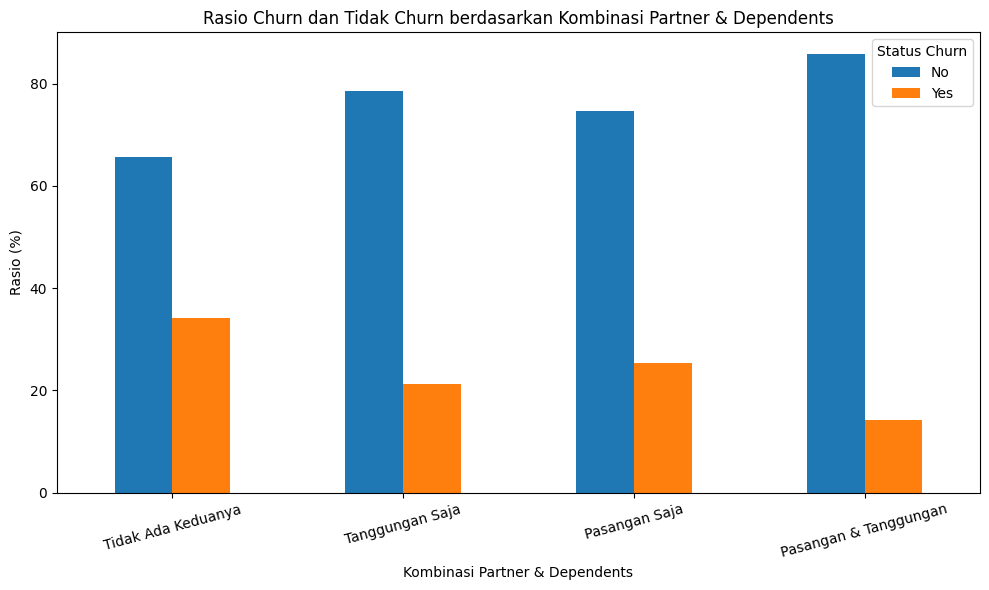

In [80]:
rasio_churn_partner_dependents.plot(kind='bar',stacked=False,figsize=(10, 6))

plt.title('Rasio Churn dan Tidak Churn berdasarkan Kombinasi Partner & Dependents')
plt.xlabel('Kombinasi Partner & Dependents')
plt.ylabel('Rasio (%)')
plt.xticks(rotation=15)
plt.legend(title='Status Churn')

plt.tight_layout()
plt.show()

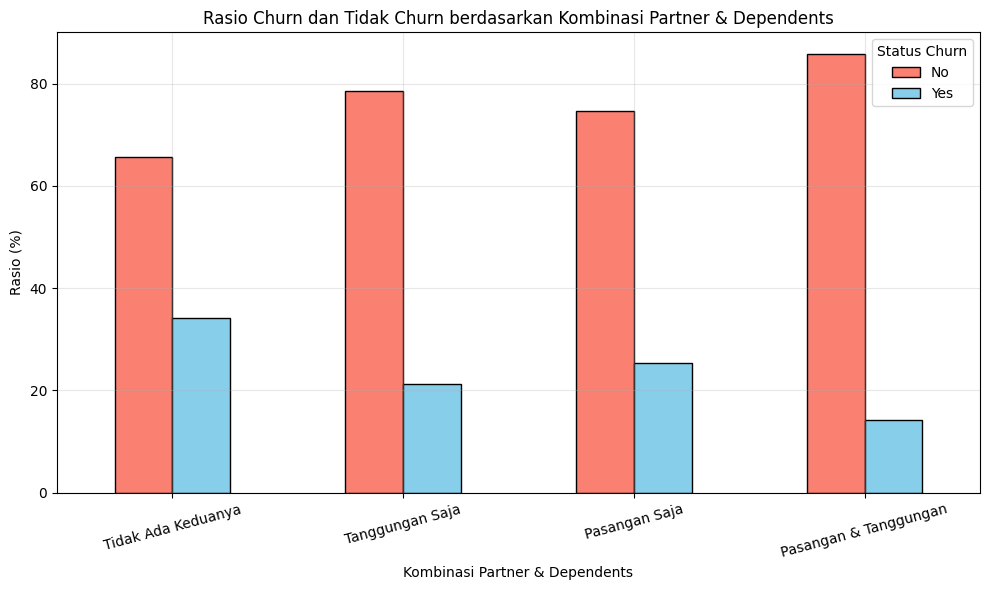

In [81]:
rasio_churn_partner_dependents.plot(kind='bar',stacked=False,color=['salmon', 'skyblue'],edgecolor='black',figsize=(10, 6))

plt.title('Rasio Churn dan Tidak Churn berdasarkan Kombinasi Partner & Dependents')
plt.xlabel('Kombinasi Partner & Dependents')
plt.ylabel('Rasio (%)')
plt.xticks(rotation=15)
plt.legend(title='Status Churn')
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()

### `Interpretasi`: Pengaruh Memiliki Pasangan & Tanggungan terhadap Tingkat Churn Pelanggan
Berdasarkan analisis kombinasi kolom Partner dan Dependents, serta perhitungan rasio churn, ditemukan bahwa status sosial pelanggan (memiliki pasangan dan/atau tanggungan) memiliki pengaruh signifikan terhadap kecenderungan pelanggan untuk berhenti berlangganan (churn).

#### *Temuan Utama:*
Pelanggan yang tidak memiliki pasangan maupun tanggungan (“Tidak Ada Keduanya”) memiliki tingkat churn paling tinggi, menunjukkan kerentanan terhadap penghentian layanan.

Sebaliknya, pelanggan yang memiliki pasangan dan tanggungan memiliki tingkat churn paling rendah.

Dua kelompok di antaranya (memiliki hanya pasangan / hanya tanggungan) menunjukkan tingkat churn menengah, tetapi tetap lebih rendah daripada yang tidak punya keduanya.

Pola Umum:
Semakin “stabil” kehidupan sosial seorang pelanggan (punya pasangan dan tanggungan), semakin kecil kemungkinan mereka untuk churn.

#### `Kesimpulan`

Carilah Pasangan dan Jangan Jomblo niscaya rejeki akan selalu ada dan kita tidak akan kehilangan langganan wifi kita

---

## `Soal 7`

Buatlah insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut dengan memanfaatkan atribut tenure, contract, monthly charges, status*, jumlah pelanggan, dan churn! (30 poin)

Langkah-langkah:
- Wajib menggunakan kelima atribut (tenure, contract, monthly charges, status, jumlah pelanggan, churn)
- Cari insight yang berkaitan dengan kelima atribut tersebut, dan visualisasikan (usahakan membuat visualisasi lebih dari satu)!
- Tambahkan storyline di dalam visualisasi tersebut

Untuk mempermudah kamu, yuk lihat resource di bawah ini:
- Topic Data Visualization: Materi Advanced Plot - bagian Pengenalan Data Storytelling

*Atribut status didapatkan dengan asumsi:
- Married : pelanggan adalah senior citizen atau memiliki partner atau memiliki dependents
- Single : tidak memiliki status seperti yang disebutkan diatas

contoh :

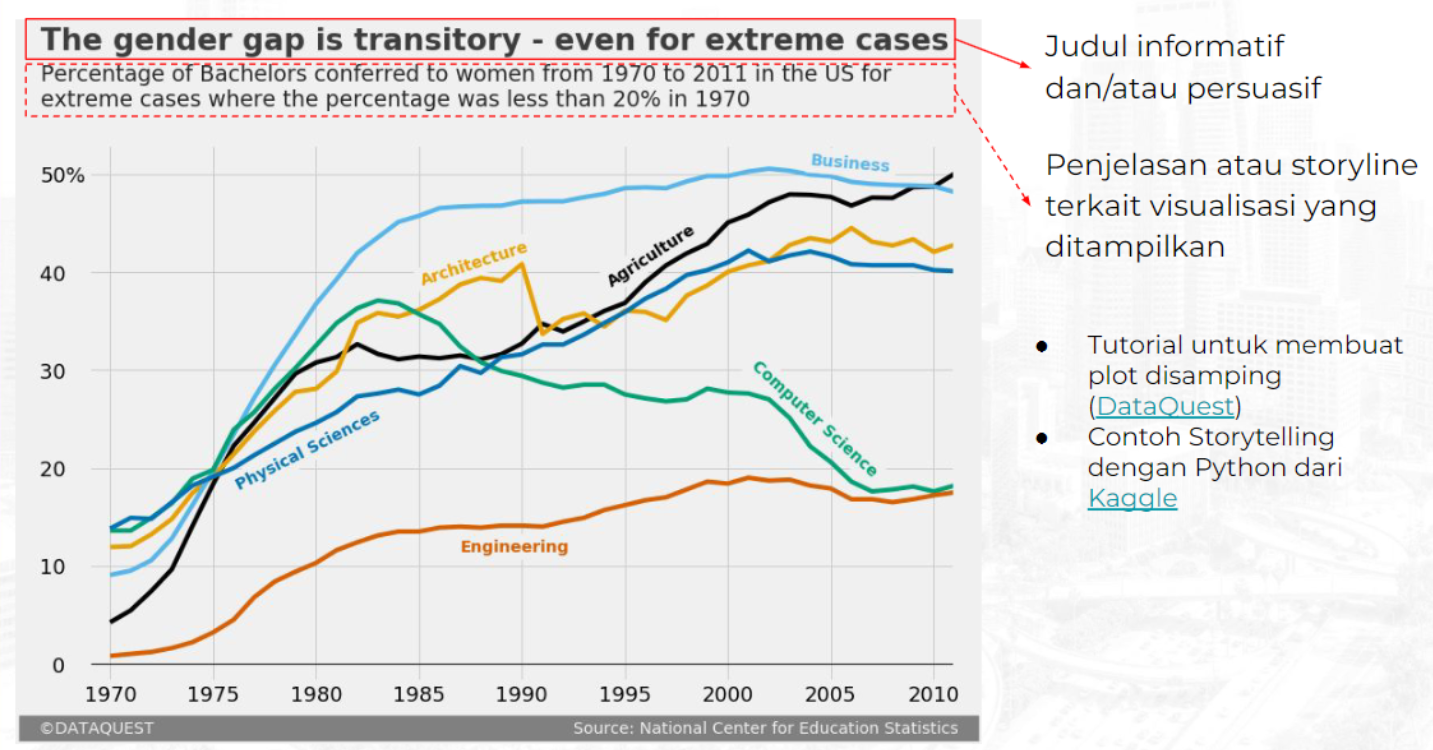

Hint:

Untuk memudahkan bagaimana membuat data storytelling, kamu dapat menjawab

beberapa pertanyaan berikut :

Pelanggan banyak melakukan churn,
- Pada saat tenure berapa bulan?
- Term contract jenis apa yang dipilih oleh pelanggan?
- Status pelanggan seperti apa? Bagaimana persebarannya jika dilihat dari tenure pelanggan?
- Berapa monthly charges pelanggan? Apakah status berpengaruh pada monthly charges pelanggan?

Pertanyaan diatas hanya sebagai alat bantu saja, kamu dapat bebas membuat story telling dengan data yang dimiliki


---

In [82]:
agung['Status'] = agung.apply(lambda row: 'Married' if (row['SeniorCitizen'] == 1 or row['Partner'] == 'Yes' or row['Dependents'] == 'Yes') else 'Single', axis=1)



In [83]:
profil_pelanggan = agung.groupby(['Contract', 'Status', 'Churn']).agg({
    'tenure': 'mean',
    'MonthlyCharges': 'mean',
    'customerID': 'count'
}).reset_index().rename(columns={'customerID': 'JumlahPelanggan', 'tenure': 'RataRataTenure', 'MonthlyCharges': 'RataRataMonthlyCharges'})



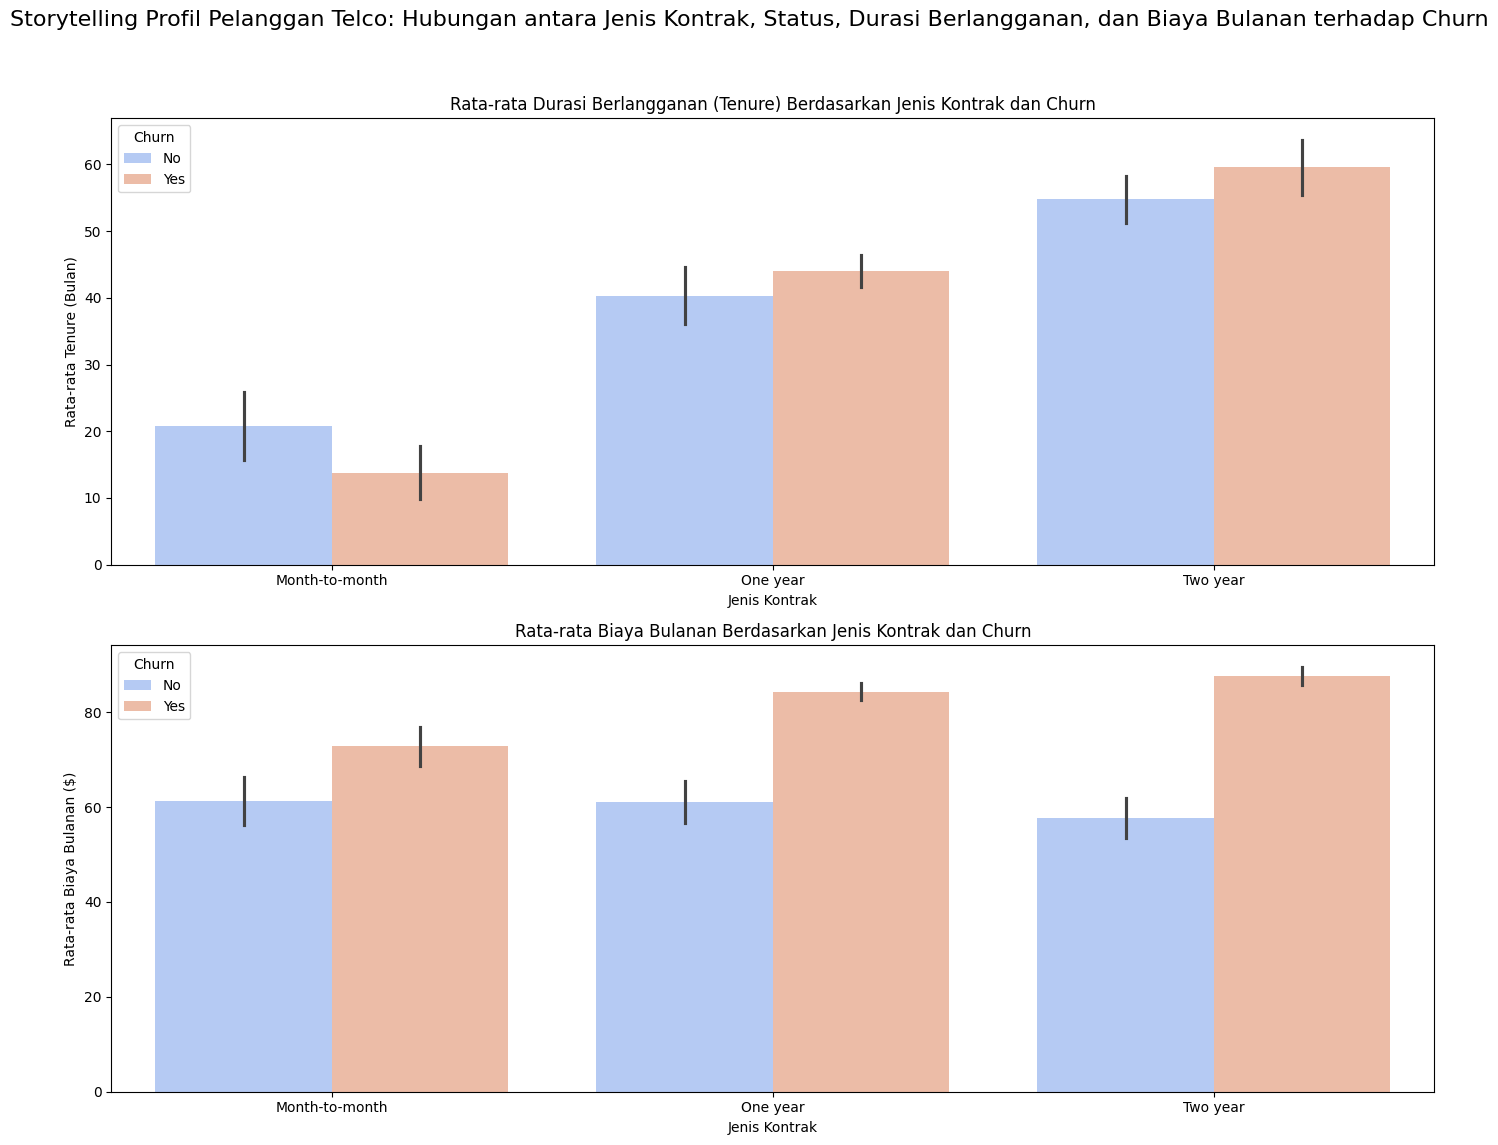

In [84]:
# Visualisasi hubungan antara kontrak, status, churn, rata-rata tenure, dan rata-rata biaya bulanan

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Rata-rata tenure pelanggan berdasarkan kontrak, status, dan churn
sns.barplot(data=profil_pelanggan, x='Contract', y='RataRataTenure', hue='Churn', palette='coolwarm', ax=axes[0])
axes[0].set_title('Rata-rata Durasi Berlangganan (Tenure) Berdasarkan Jenis Kontrak dan Churn')
axes[0].set_ylabel('Rata-rata Tenure (Bulan)')
axes[0].set_xlabel('Jenis Kontrak')
axes[0].legend(title='Churn')

# Plot 2: Rata-rata biaya bulanan berdasarkan kontrak, status, dan churn
sns.barplot(data=profil_pelanggan, x='Contract', y='RataRataMonthlyCharges', hue='Churn', palette='coolwarm', ax=axes[1])
axes[1].set_title('Rata-rata Biaya Bulanan Berdasarkan Jenis Kontrak dan Churn')
axes[1].set_ylabel('Rata-rata Biaya Bulanan ($)')
axes[1].set_xlabel('Jenis Kontrak')
axes[1].legend(title='Churn')

# Menambahkan judul utama dan storyline
fig.suptitle('Storytelling Profil Pelanggan Telco: Hubungan antara Jenis Kontrak, Status, Durasi Berlangganan, dan Biaya Bulanan terhadap Churn', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


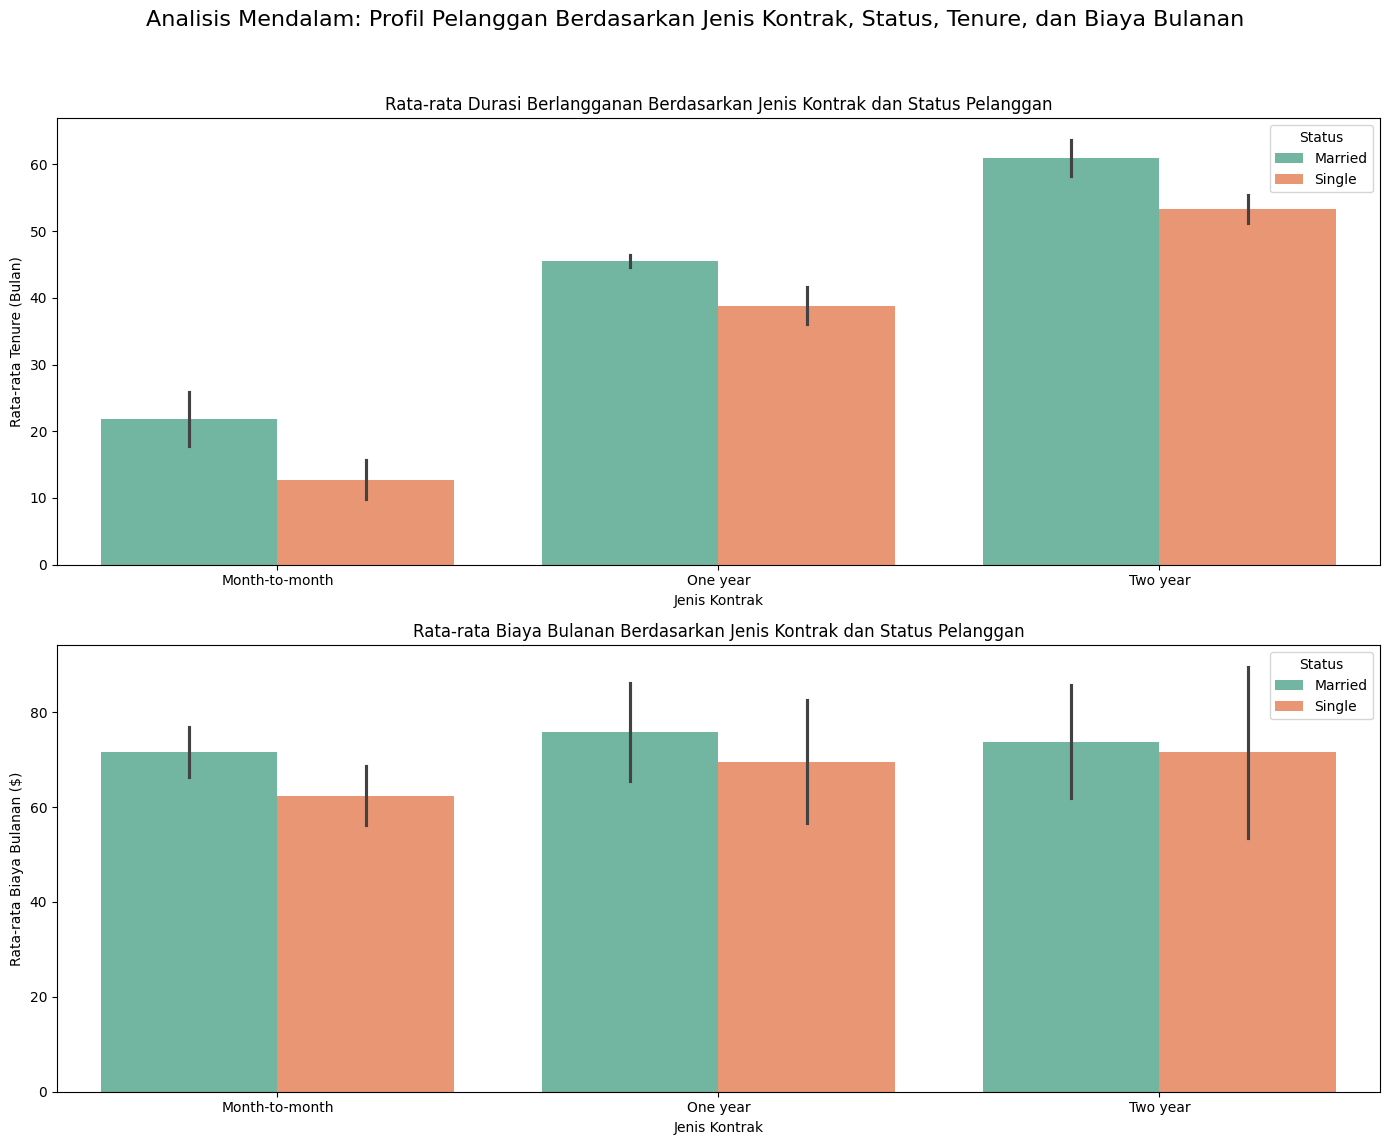

In [85]:
# Visualisasi tambahan yang melibatkan status pelanggan (Married/Single) untuk analisis lebih mendalam

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Rata-rata tenure berdasarkan jenis kontrak, status, dan churn
sns.barplot(data=profil_pelanggan, x='Contract', y='RataRataTenure', hue='Status', palette='Set2', ax=axes[0])
axes[0].set_title('Rata-rata Durasi Berlangganan Berdasarkan Jenis Kontrak dan Status Pelanggan')
axes[0].set_ylabel('Rata-rata Tenure (Bulan)')
axes[0].set_xlabel('Jenis Kontrak')
axes[0].legend(title='Status')

# Plot 2: Rata-rata biaya bulanan berdasarkan jenis kontrak, status, dan churn
sns.barplot(data=profil_pelanggan, x='Contract', y='RataRataMonthlyCharges', hue='Status', palette='Set2', ax=axes[1])
axes[1].set_title('Rata-rata Biaya Bulanan Berdasarkan Jenis Kontrak dan Status Pelanggan')
axes[1].set_ylabel('Rata-rata Biaya Bulanan ($)')
axes[1].set_xlabel('Jenis Kontrak')
axes[1].legend(title='Status')

# Menambahkan storyline
fig.suptitle('Analisis Mendalam: Profil Pelanggan Berdasarkan Jenis Kontrak, Status, Tenure, dan Biaya Bulanan', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


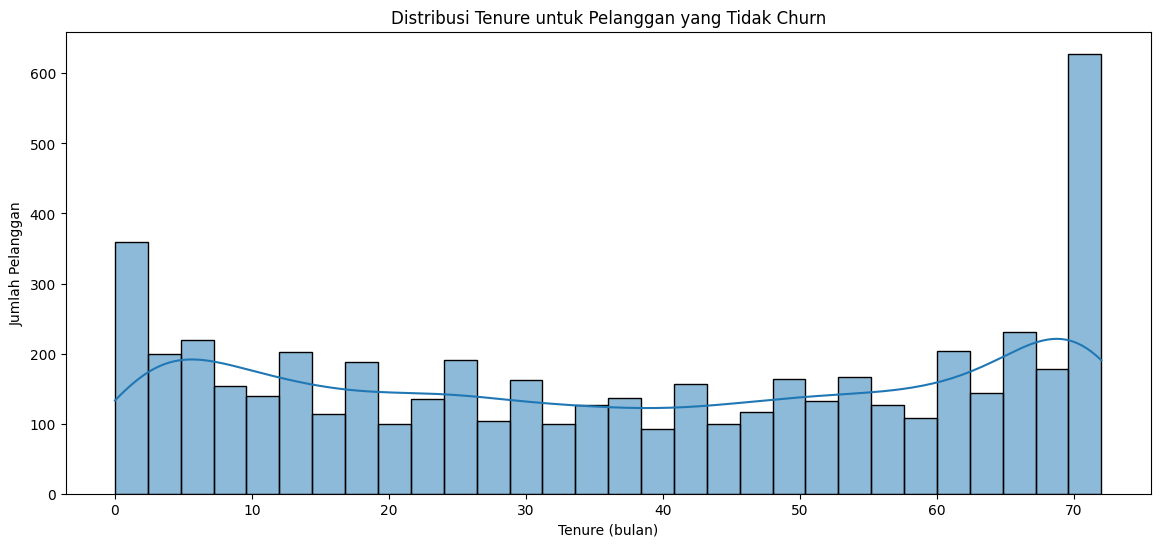

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\4052751098.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_churn, x='Contract', palette='Set2')


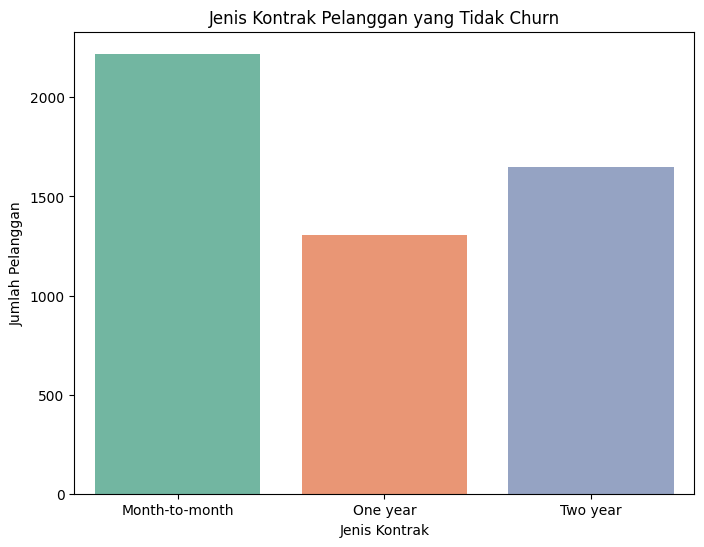

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\4052751098.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_churn, x='Status', palette='Set1')


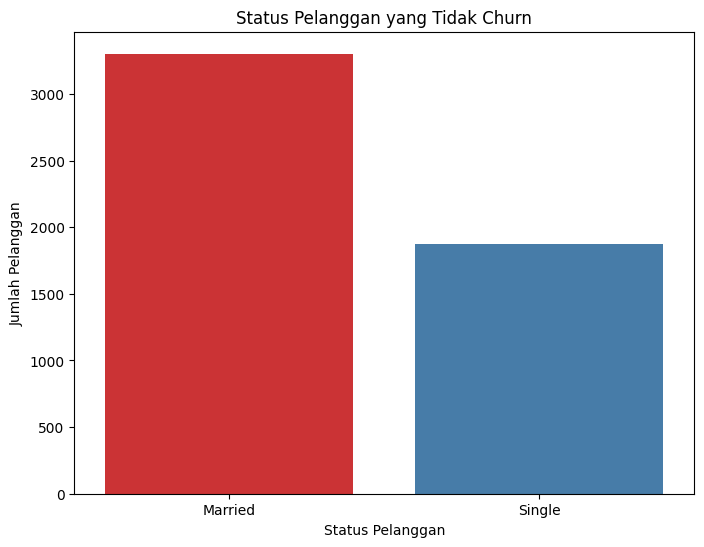

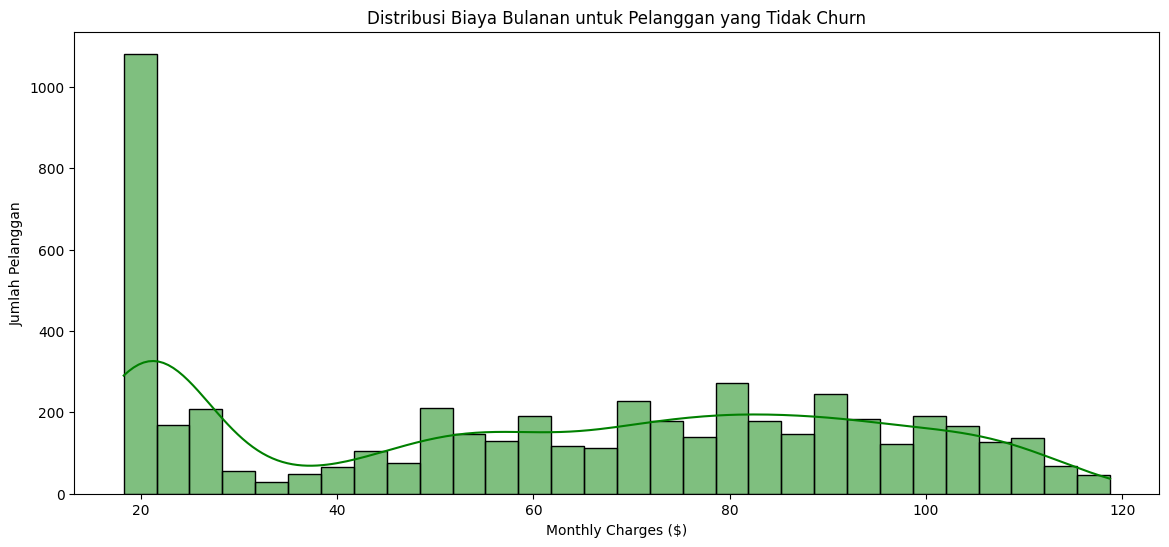

In [88]:
# Menyiapkan data pelanggan yang tidak churn untuk analisis faktor yang mempengaruhi pelanggan loyal
no_churn = agung[agung['Churn'] == 'No']

# Plot 1: Distribusi tenure untuk pelanggan yang tidak churn
plt.figure(figsize=(14, 6))
sns.histplot(no_churn['tenure'], bins=30, kde=True)
plt.title('Distribusi Tenure untuk Pelanggan yang Tidak Churn')
plt.xlabel('Tenure (bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Plot 2: Perbandingan jenis kontrak untuk pelanggan tidak churn
plt.figure(figsize=(8, 6))
sns.countplot(data=no_churn, x='Contract', palette='Set2')
plt.title('Jenis Kontrak Pelanggan yang Tidak Churn')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Plot 3: Status pelanggan yang tidak churn
plt.figure(figsize=(8, 6))
sns.countplot(data=no_churn, x='Status', palette='Set1')
plt.title('Status Pelanggan yang Tidak Churn')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Plot 4: Distribusi Monthly Charges untuk pelanggan tidak churn
plt.figure(figsize=(14, 6))
sns.histplot(no_churn['MonthlyCharges'], bins=30, kde=True, color='green')
plt.title('Distribusi Biaya Bulanan untuk Pelanggan yang Tidak Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Jumlah Pelanggan')
plt.show()


In [95]:
# Mengecek apakah ada pelanggan yang memenuhi semua kriteria ideal secara bersamaan
ideal_customer = agung[
    (agung['tenure'] > 24) & 
    (agung['Contract'] == 'Month-to-month') & 
    (agung['Status'] == 'Married') & 
    (agung['MonthlyCharges'].between(40, 80))
]

# Menghitung jumlah pelanggan dengan status tersebut berdasarkan churn
status_ideal_customer = ideal_customer['Churn'].value_counts().reset_index()
status_ideal_customer.columns = ['Churn', 'JumlahPelanggan']
status_ideal_customer


Churn  JumlahPelanggan
0    No              175
1   Yes               54

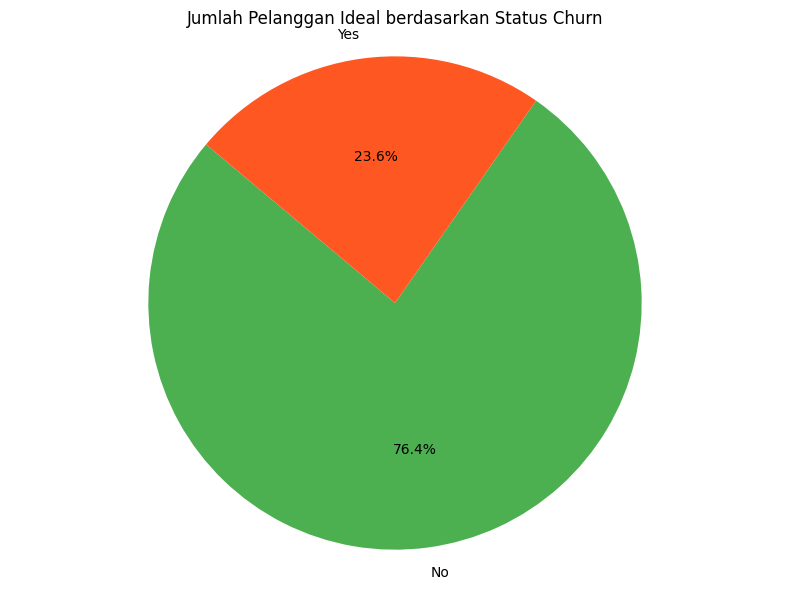

In [96]:
# Visualisasi piechart jumlah pelanggan ideal berdasarkan status churn
plt.figure(figsize=(8, 6))
plt.pie(status_ideal_customer['JumlahPelanggan'], labels=status_ideal_customer['Churn'], autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5722'])
plt.title('Jumlah Pelanggan Ideal berdasarkan Status Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()
plt.show()

In [92]:
rank2 = agung[
    (agung['Contract'] == 'Month-to-month') &
    (agung['Status'] == 'Married') &
    (agung['tenure'] <= 12) &
    (agung['MonthlyCharges'].between(70, 100))
]

rank2 = rank2['Churn'].value_counts().reset_index()
rank2.columns = ['Churn', 'JumlahPelanggan']
rank2

Churn  JumlahPelanggan
0   Yes              259
1    No              107

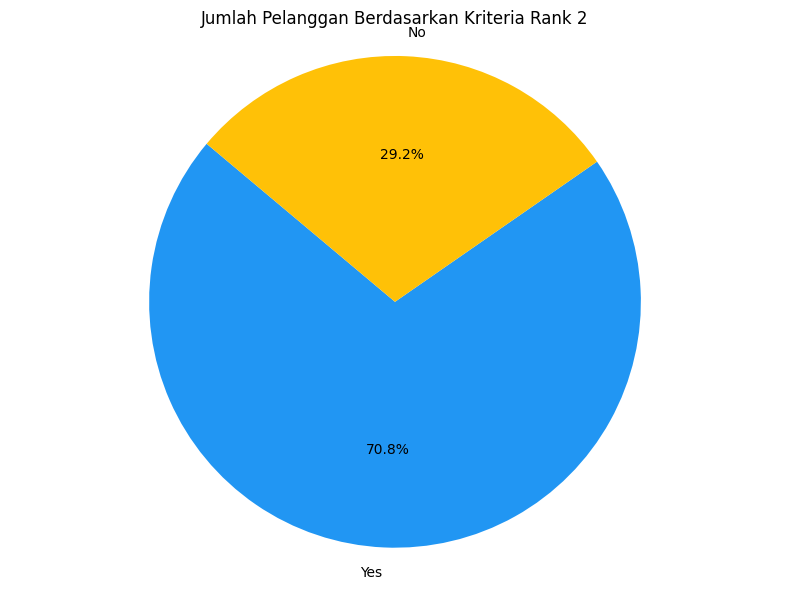

In [93]:
#pie chart
plt.figure(figsize=(8, 6))
plt.pie(rank2['JumlahPelanggan'], labels=rank2['Churn'], autopct='%1.1f%%', startangle=140, colors=['#2196F3', '#FFC107'])
plt.title('Jumlah Pelanggan Berdasarkan Kriteria Rank 2')
plt.axis('equal')  
plt.tight_layout()
plt.show()


C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\3627317045.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_churn, x='Contract', palette='Set2', ax=axes[0, 1])
C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\3627317045.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_churn, x='Status', palette='Set1', ax=axes[1, 0])


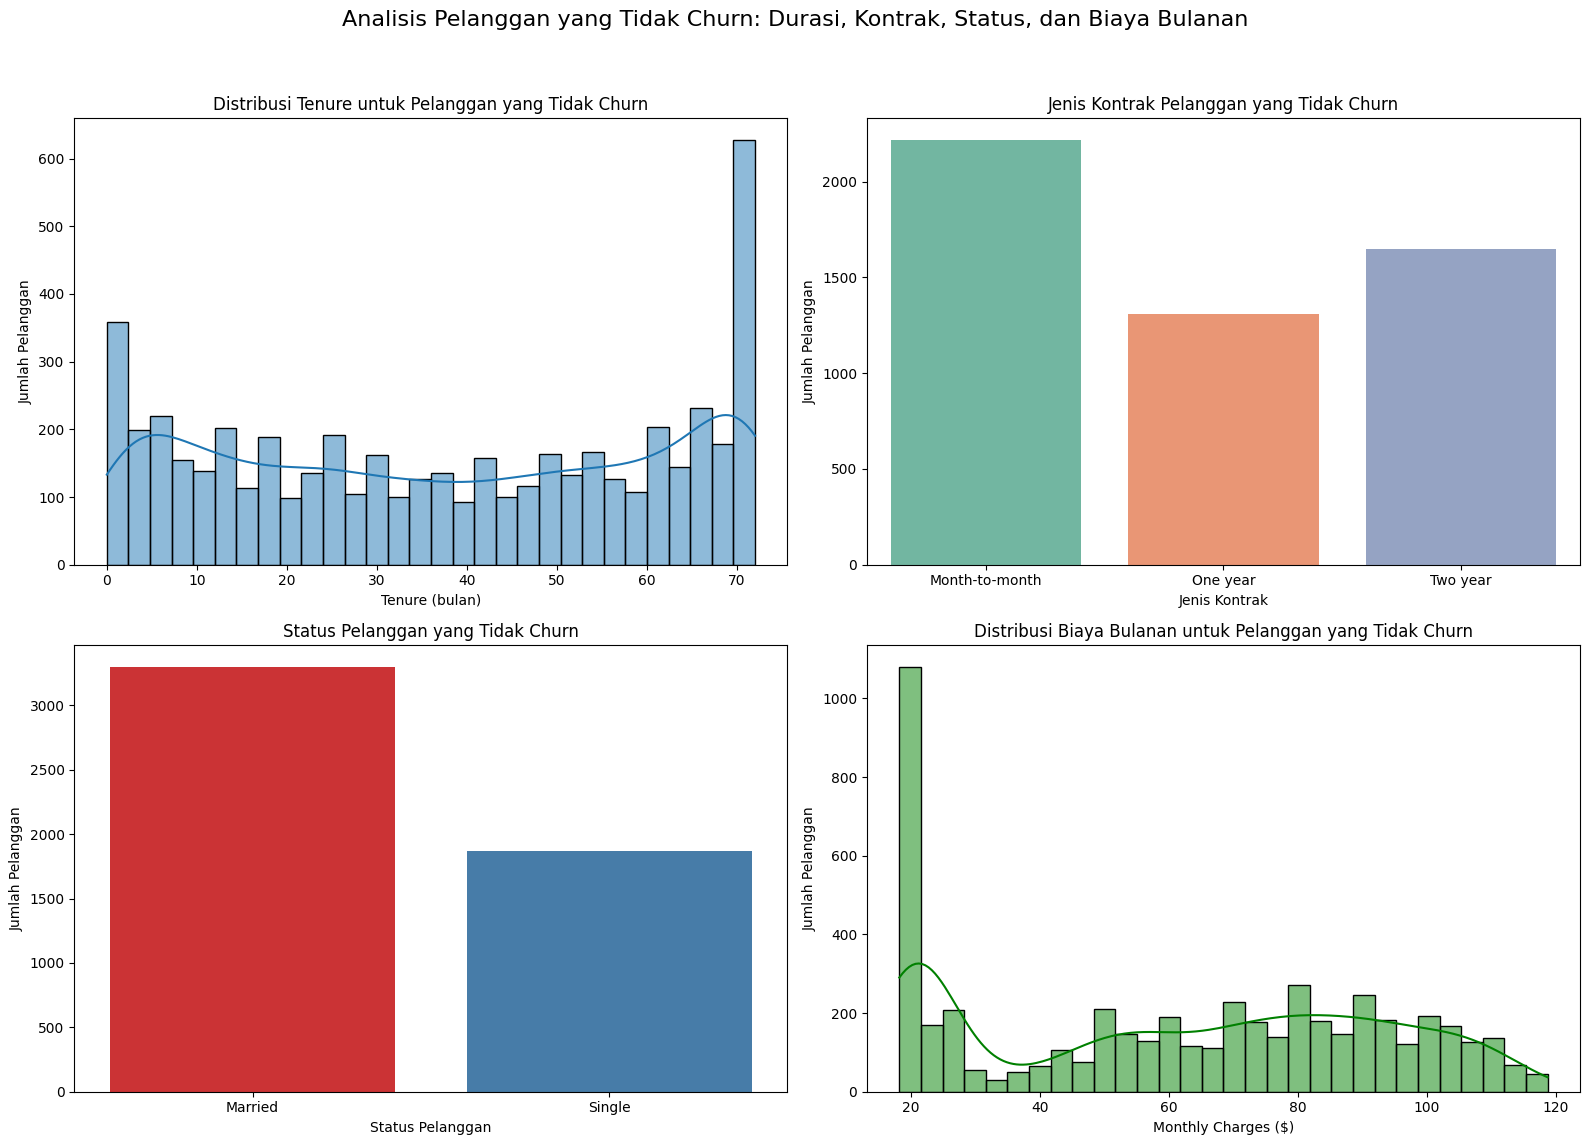

In [94]:
import matplotlib.pyplot as plt

# Membuat subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribusi tenure
sns.histplot(no_churn['tenure'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Tenure untuk Pelanggan yang Tidak Churn')
axes[0, 0].set_xlabel('Tenure (bulan)')
axes[0, 0].set_ylabel('Jumlah Pelanggan')

# Plot 2: Jenis kontrak
sns.countplot(data=no_churn, x='Contract', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Jenis Kontrak Pelanggan yang Tidak Churn')
axes[0, 1].set_xlabel('Jenis Kontrak')
axes[0, 1].set_ylabel('Jumlah Pelanggan')

# Plot 3: Status pelanggan
sns.countplot(data=no_churn, x='Status', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Status Pelanggan yang Tidak Churn')
axes[1, 0].set_xlabel('Status Pelanggan')
axes[1, 0].set_ylabel('Jumlah Pelanggan')

# Plot 4: Distribusi biaya bulanan
sns.histplot(no_churn['MonthlyCharges'], bins=30, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Biaya Bulanan untuk Pelanggan yang Tidak Churn')
axes[1, 1].set_xlabel('Monthly Charges ($)')
axes[1, 1].set_ylabel('Jumlah Pelanggan')

# Menambahkan judul utama
fig.suptitle('Analisis Pelanggan yang Tidak Churn: Durasi, Kontrak, Status, dan Biaya Bulanan', fontsize=16)

# Mengatur layout agar rapi
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


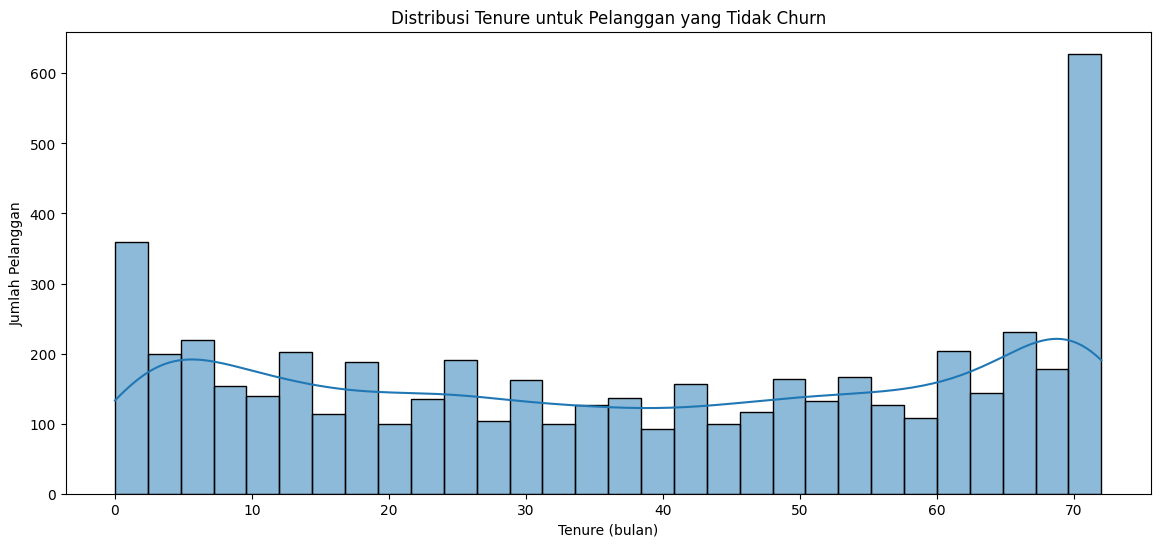

In [97]:
# Plot 1: Distribusi tenure untuk pelanggan yang tidak churn
plt.figure(figsize=(14, 6))
sns.histplot(no_churn['tenure'], bins=30, kde=True)
plt.title('Distribusi Tenure untuk Pelanggan yang Tidak Churn')
plt.xlabel('Tenure (bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.show()


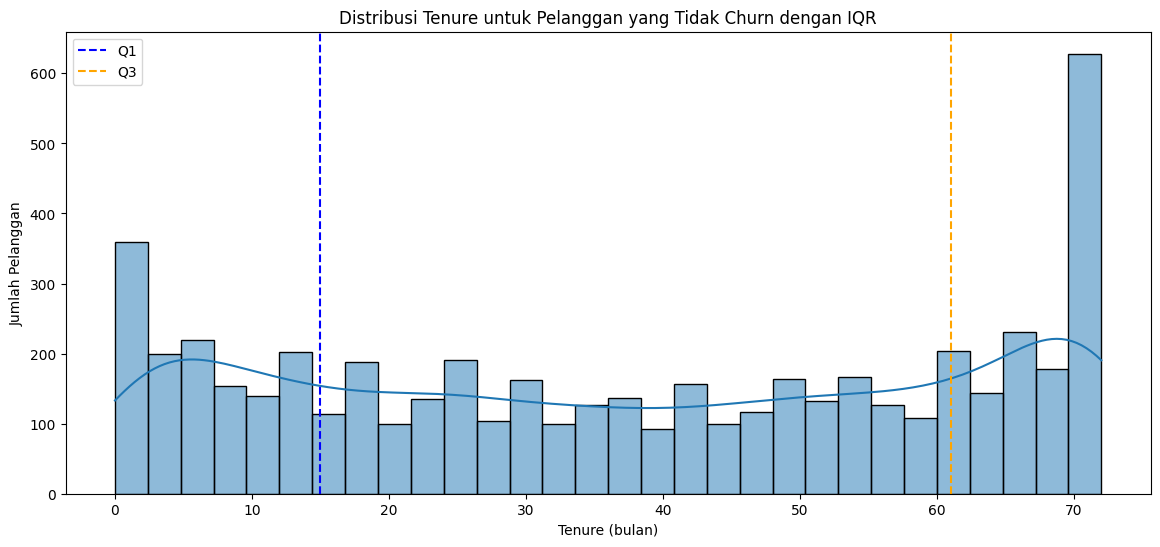

In [99]:
# Plot 2: garis IQR , q1, q3, upper bound dan lower bound untuk plot distribusi tenure pelanggan tidak churn
q1_tenure_no_churn = no_churn['tenure'].quantile(0.25)
q3_tenure_no_churn = no_churn['tenure'].quantile(0.75)
iqr_tenure_no_churn = q3_tenure_no_churn - q1_tenure_no_churn
lower_bound_tenure_no_churn = q1_tenure_no_churn - 1.5 * iqr_tenure_no_churn
upper_bound_tenure_no_churn = q3_tenure_no_churn + 1.5 * iqr_tenure_no_churn

plt.figure(figsize=(14, 6))
sns.histplot(no_churn['tenure'], bins=30, kde=True)
plt.axvline(q1_tenure_no_churn, color='blue', linestyle='--', label='Q1')
plt.axvline(q3_tenure_no_churn, color='orange', linestyle='--', label='Q3')
plt.title('Distribusi Tenure untuk Pelanggan yang Tidak Churn dengan IQR')
plt.xlabel('Tenure (bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.legend()
plt.show()

In [233]:
q1_tenure_no_churn = no_churn['tenure'].quantile(0.25)
q3_tenure_no_churn = no_churn['tenure'].quantile(0.75)
iqr_tenure_no_churn = q3_tenure_no_churn - q1_tenure_no_churn
lower_bound_tenure_no_churn = q1_tenure_no_churn - 1.5 * iqr_tenure_no_churn
upper_bound_tenure_no_churn = q3_tenure_no_churn + 1.5 * iqr_tenure_no_churn

q3_tenure_no_churn

np.float64(61.0)

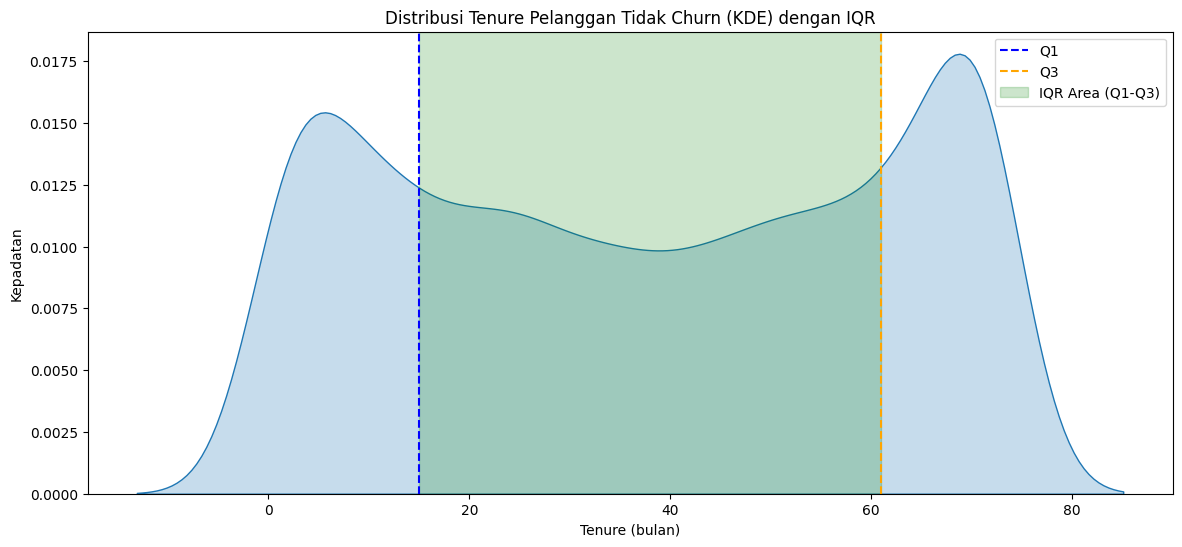

In [108]:
# Plot distribusi tenure pelanggan tidak churn menggunakan KDE plot dengan garis Q1, Q3, IQR
plt.figure(figsize=(14, 6))

# KDE plot
sns.kdeplot(no_churn['tenure'], fill=True)

# Garis Q1, Q3, Lower Bound dan Upper Bound
plt.axvline(q1_tenure_no_churn, color='blue', linestyle='--', label='Q1')
plt.axvline(q3_tenure_no_churn, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1_tenure_no_churn, q3_tenure_no_churn, color='green', alpha=0.2, label='IQR Area (Q1-Q3)')

# Label dan judul
plt.title('Distribusi Tenure Pelanggan Tidak Churn (KDE) dengan IQR')
plt.xlabel('Tenure (bulan)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()


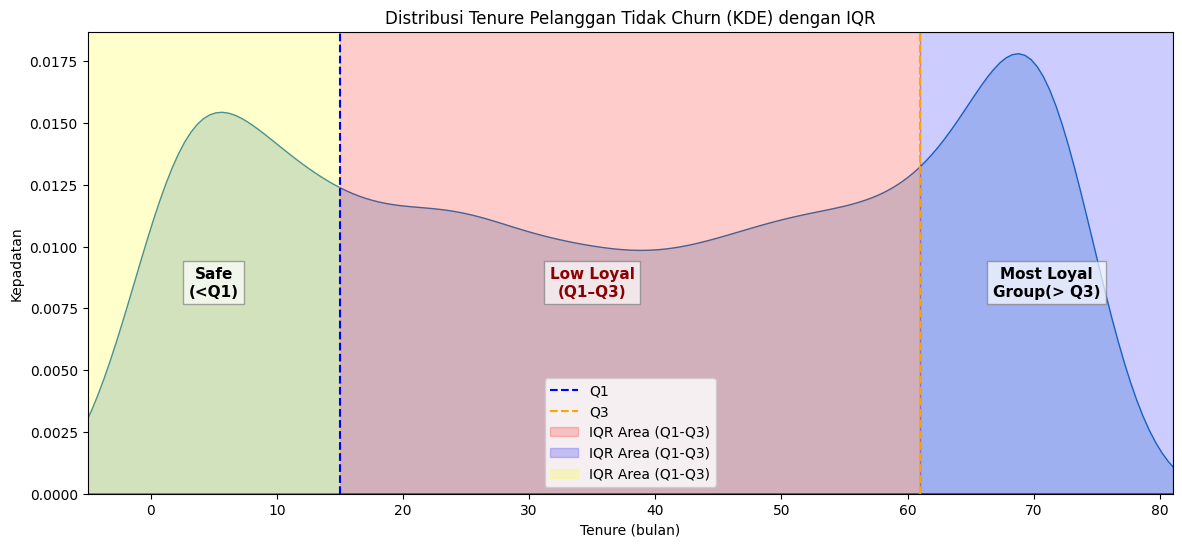

In [191]:
plt.figure(figsize=(14, 6))


sns.kdeplot(no_churn['tenure'], fill=True)


plt.axvline(q1_tenure_no_churn, color='blue', linestyle='--', label='Q1')
plt.axvline(q3_tenure_no_churn, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1_tenure_no_churn, q3_tenure_no_churn, color='red', alpha=0.2, label='IQR Area (Q1-Q3)')
x_min_mantap = q1_tenure_no_churn - 20
x_max_mantap = q3_tenure_no_churn + 20
plt.xlim(x_min_mantap, x_max_mantap)
plt.axvspan(q3_tenure_no_churn, x_max_mantap, color='blue', alpha=0.2, label='IQR Area (Q1-Q3)')
plt.axvspan(q1_tenure_no_churn, x_min_mantap, color='yellow', alpha=0.2, label='IQR Area (Q1-Q3)')

plt.text(q1_tenure_no_churn - 10, 0.008, 'Safe\n(<Q1)', ha='center', fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q3_tenure_no_churn + 10 , 0.008, 'Most Loyal\nGroup(> Q3)', ha='center', fontsize=11, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q1_tenure_no_churn + 20, 0.008, 'Low Loyal\n(Q1–Q3)', ha='center', fontsize=11, fontweight='bold',color = 'darkred', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.title('Distribusi Tenure Pelanggan Tidak Churn (KDE) dengan IQR')
plt.xlabel('Tenure (bulan)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()


C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\669239375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_churn, x='Contract', palette='Set2')


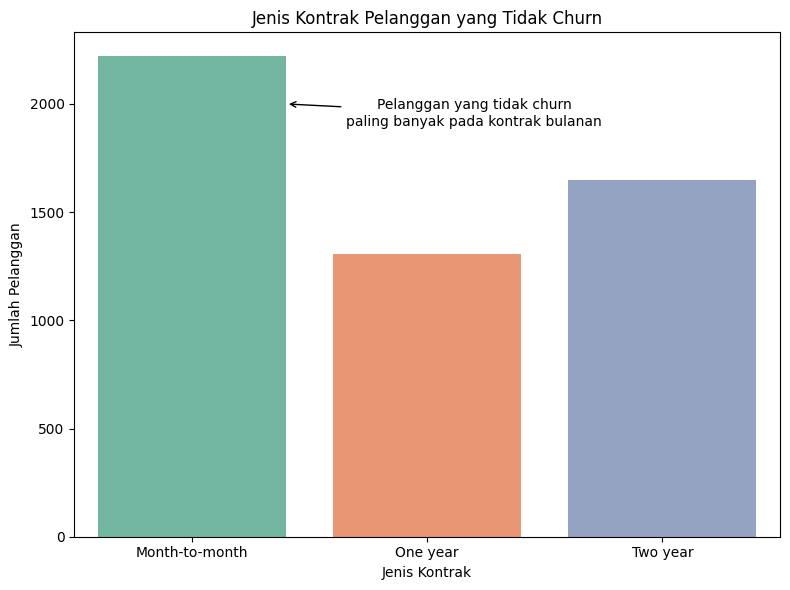

In [192]:
plt.figure(figsize=(8, 6))
sns.countplot(data=no_churn, x='Contract', palette='Set2')

plt.title('Jenis Kontrak Pelanggan yang Tidak Churn')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Pelanggan')
ax = plt.gca()
ax.annotate(
    'Pelanggan yang tidak churn\npaling banyak pada kontrak bulanan',  
    xy=(0.4, 2000),  
    xytext=(1.2, 1900),  
    arrowprops=dict(facecolor='steelblue', arrowstyle='->'),
    ha='center'
)
plt.tight_layout()
plt.show()


C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\3295203990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_churn, x='Status', palette='Set1')


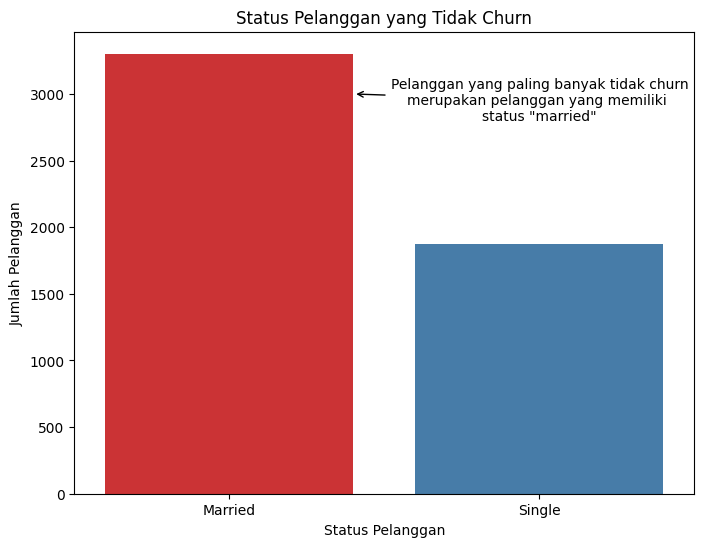

In [193]:
# Plot 3: Status pelanggan yang tidak churn
plt.figure(figsize=(8, 6))
sns.countplot(data=no_churn, x='Status', palette='Set1')
plt.title('Status Pelanggan yang Tidak Churn')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah Pelanggan')
ax = plt.gca()
ax.annotate(
    'Pelanggan yang paling banyak tidak churn\nmerupakan pelanggan yang memiliki \nstatus "married"',  
    xy=(0.4, 3000),  
    xytext=(1, 2800),  
    arrowprops=dict(facecolor='steelblue', arrowstyle='->'),
    ha='center'
)
plt.show()



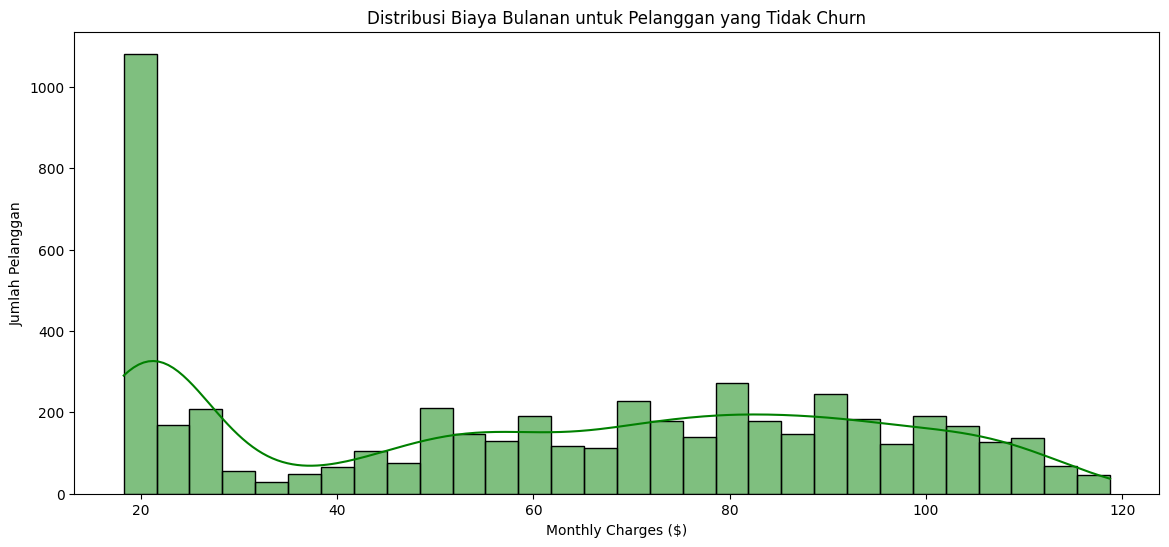

In [162]:
# Plot 4: Distribusi Monthly Charges untuk pelanggan tidak churn
plt.figure(figsize=(14, 6))
sns.histplot(no_churn['MonthlyCharges'], bins=30, kde=True, color='green')
plt.title('Distribusi Biaya Bulanan untuk Pelanggan yang Tidak Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

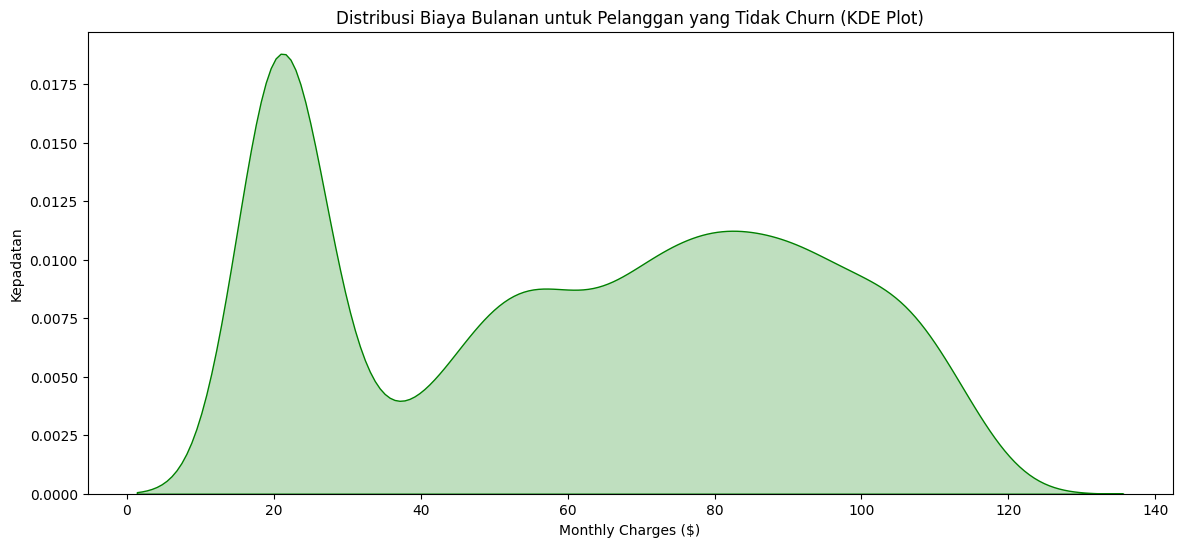

In [164]:
plt.figure(figsize=(14, 6))
sns.kdeplot(data=no_churn['MonthlyCharges'], fill=True, color='green')
plt.title('Distribusi Biaya Bulanan untuk Pelanggan yang Tidak Churn (KDE Plot)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Kepadatan')
plt.show()


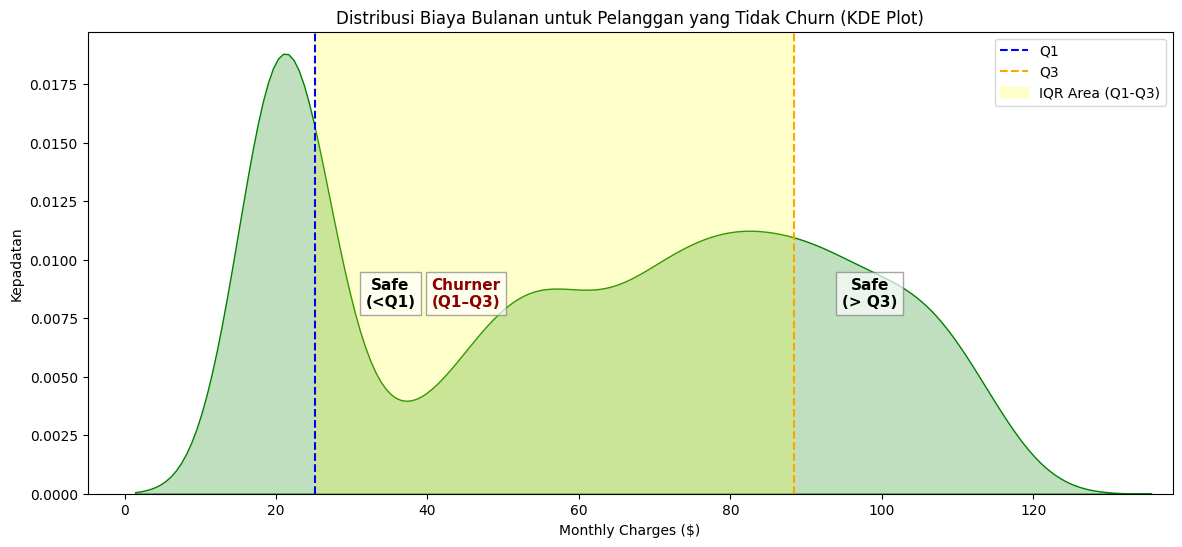

In [171]:

q1_monthly_charges_no_churn = no_churn['MonthlyCharges'].quantile(0.25)
q3_monthly_charges_no_churn = no_churn['MonthlyCharges'].quantile(0.75)
iqr_monthly_charges_no_churn = q3_monthly_charges_no_churn - q1_monthly_charges_no_churn
lower_bound_monthly_charges_no_churn = q1_monthly_charges_no_churn - 1.5 * iqr_monthly_charges_no_churn
upper_bound_monthly_charges_no_churn = q3_monthly_charges_no_churn + 1.5 * iqr_monthly_charges_no_churn

plt.figure(figsize=(14, 6))
sns.kdeplot(data=no_churn['MonthlyCharges'], fill=True, color='green')
plt.title('Distribusi Biaya Bulanan untuk Pelanggan yang Tidak Churn (KDE Plot)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Kepadatan')

x_min_3 = q1_monthly_charges_no_churn - 30
x_max_3= q3_monthly_charges_no_churn + 50
plt.xlim(x_min_3, x_max_3)

plt.axvline(q1_monthly_charges_no_churn, color='blue', linestyle='--', label='Q1')
plt.axvline(q3_monthly_charges_no_churn, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1_monthly_charges_no_churn, q3_monthly_charges_no_churn, color='yellow', alpha=0.2, label='IQR Area (Q1-Q3)')
# plt.axvspan(lower_bound_monthly_charges_no_churn, q1_monthly_charges_no_churn, color='red', alpha=0.2, label='Lower Bound Area (< Q1)')
# plt.axvspan(q3_monthly_charges_no_churn, upper_bound_monthly_charges_no_churn, color='blue', alpha=0.2, label='Upper Bound Area (> Q3)')
# plt.axvspan(upper_bound_monthly_charges_no_churn, no_churn['MonthlyCharges'].max(), color='green', alpha=0.2, label='Upper Bound Area (> Q3)')
plt.text(q1_monthly_charges_no_churn + 10, 0.008, 'Safe\n(<Q1)', ha='center', fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q3_monthly_charges_no_churn + 10, 0.008, 'Safe\n(> Q3)', ha='center', fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q1_monthly_charges_no_churn + 20, 0.008, 'Churner\n(Q1–Q3)', ha='center', fontsize=11, fontweight='bold', color='darkred', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.legend()
plt.show()


In [236]:

q1_monthly_charges_no_churn = no_churn['MonthlyCharges'].quantile(0.25)
q3_monthly_charges_no_churn = no_churn['MonthlyCharges'].quantile(0.75)
iqr_monthly_charges_no_churn = q3_monthly_charges_no_churn - q1_monthly_charges_no_churn
lower_bound_monthly_charges_no_churn = q1_monthly_charges_no_churn - 1.5 * iqr_monthly_charges_no_churn
upper_bound_monthly_charges_no_churn = q3_monthly_charges_no_churn + 1.5 * iqr_monthly_charges_no_churn
q3_monthly_charges_no_churn

np.float64(88.4)

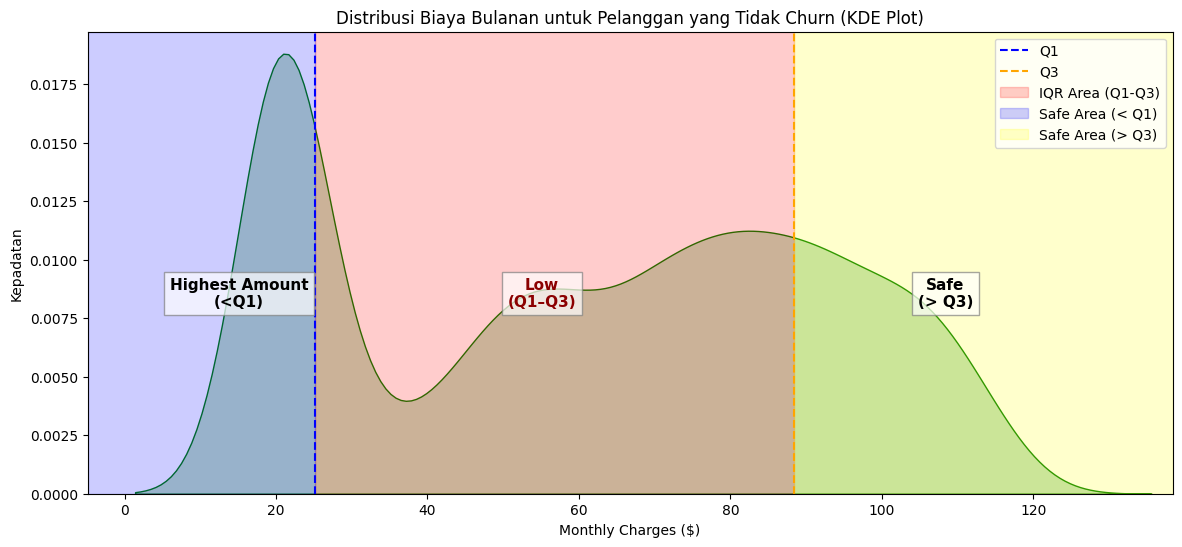

In [239]:

q1_monthly_charges_no_churn = no_churn['MonthlyCharges'].quantile(0.25)
q3_monthly_charges_no_churn = no_churn['MonthlyCharges'].quantile(0.75)
iqr_monthly_charges_no_churn = q3_monthly_charges_no_churn - q1_monthly_charges_no_churn
lower_bound_monthly_charges_no_churn = q1_monthly_charges_no_churn - 1.5 * iqr_monthly_charges_no_churn
upper_bound_monthly_charges_no_churn = q3_monthly_charges_no_churn + 1.5 * iqr_monthly_charges_no_churn

plt.figure(figsize=(14, 6))
sns.kdeplot(data=no_churn['MonthlyCharges'], fill=True, color='green')
plt.title('Distribusi Biaya Bulanan untuk Pelanggan yang Tidak Churn (KDE Plot)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Kepadatan')

x_min_3 = q1_monthly_charges_no_churn - 30
x_max_3= q3_monthly_charges_no_churn + 50
plt.xlim(x_min_3, x_max_3)

plt.axvline(q1_monthly_charges_no_churn, color='blue', linestyle='--', label='Q1')
plt.axvline(q3_monthly_charges_no_churn, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1_monthly_charges_no_churn, q3_monthly_charges_no_churn, color='red', alpha=0.2, label='IQR Area (Q1-Q3)')
plt.axvspan(x_min_3, q1_monthly_charges_no_churn, color='blue', alpha=0.2, label='Safe Area (< Q1)')
plt.axvspan(q3_monthly_charges_no_churn, x_max_3, color='yellow', alpha=0.2, label='Safe Area (> Q3)')
# plt.axvspan(upper_bound_monthly_charges_no_churn, no_churn['MonthlyCharges'].max(), color='green', alpha=0.2, label='Upper Bound Area (> Q3)')
plt.text(q1_monthly_charges_no_churn -10, 0.008, 'Highest Amount\n(<Q1)', ha='center', fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q3_monthly_charges_no_churn + 20, 0.008, 'Safe\n(> Q3)', ha='center', fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q1_monthly_charges_no_churn + 30, 0.008, 'Low\n(Q1–Q3)', ha='center', fontsize=11, fontweight='bold', color='darkred', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.legend()
plt.show()


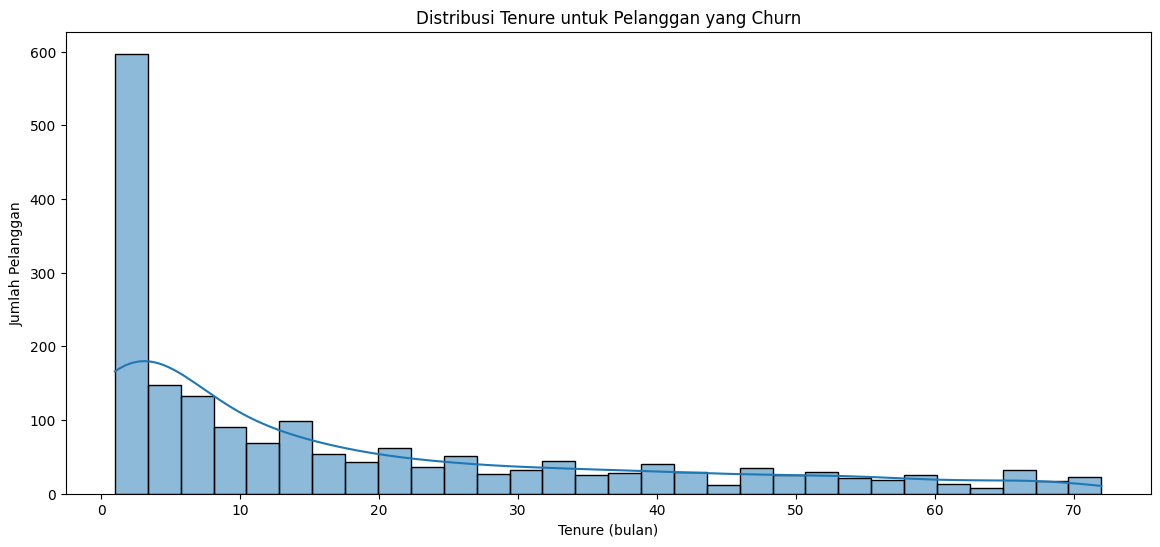

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\3745456733.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_churn, x='Contract', palette='Set2')


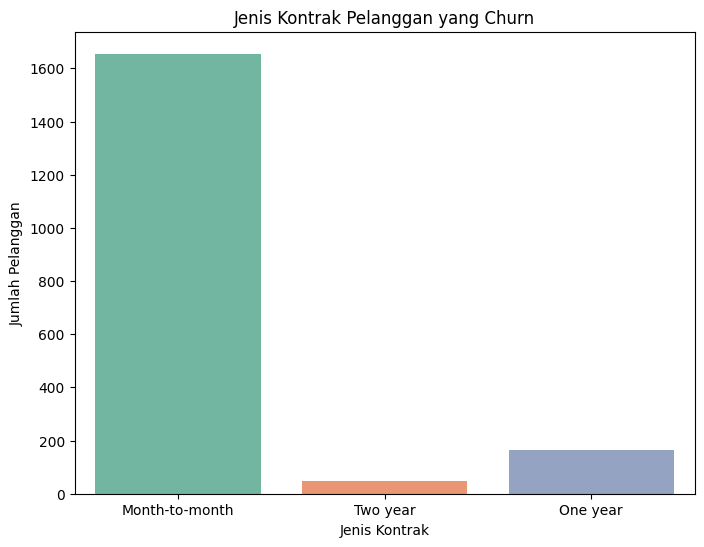

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\3745456733.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_churn, x='Status', palette='Set1')


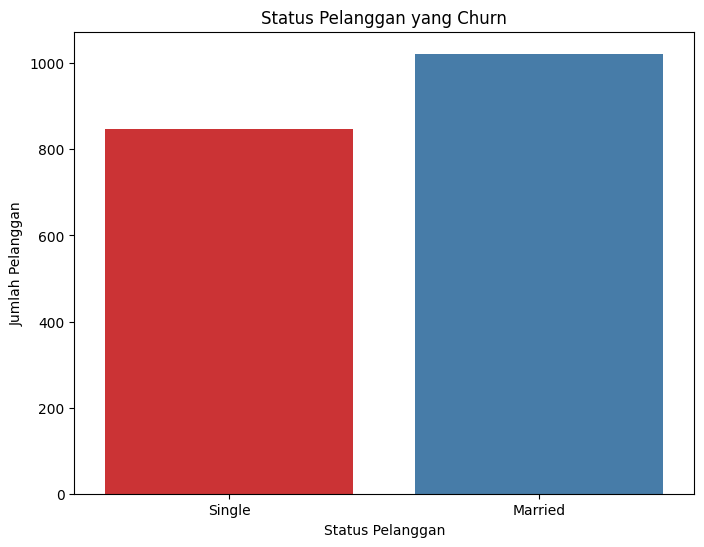

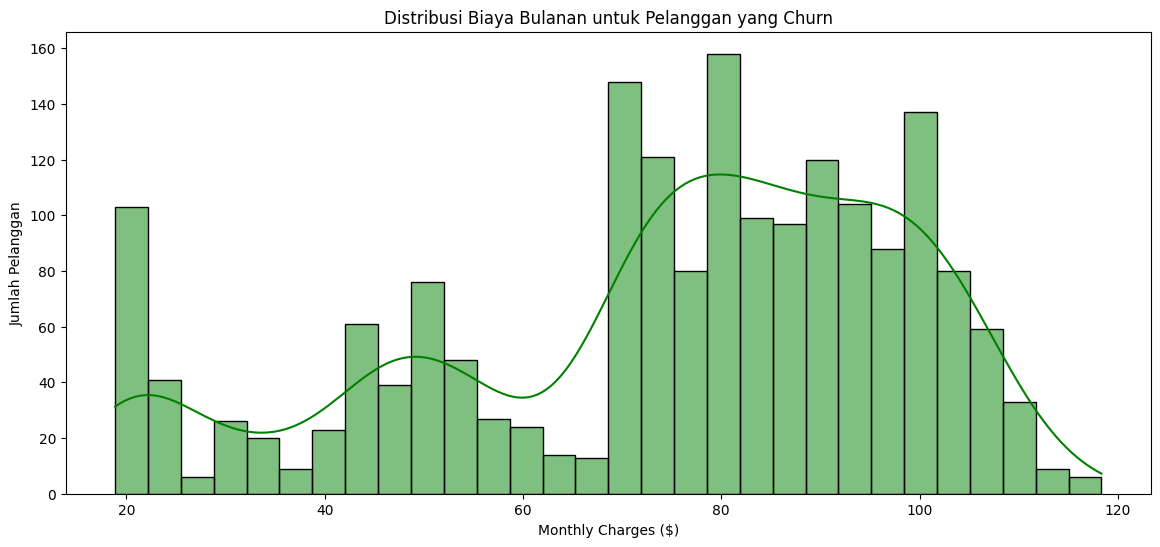

In [185]:

yes_churn = agung[agung['Churn'] == 'Yes']

plt.figure(figsize=(14, 6))
sns.histplot(yes_churn['tenure'], bins=30, kde=True)
plt.title('Distribusi Tenure untuk Pelanggan yang Churn')
plt.xlabel('Tenure (bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=yes_churn, x='Contract', palette='Set2')
plt.title('Jenis Kontrak Pelanggan yang Churn')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Pelanggan')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=yes_churn, x='Status', palette='Set1')
plt.title('Status Pelanggan yang Churn')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(yes_churn['MonthlyCharges'], bins=30, kde=True, color='green')
plt.title('Distribusi Biaya Bulanan untuk Pelanggan yang Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Jumlah Pelanggan')
plt.show()


In [228]:
#cari q1_tenure_yes_churn , q3_tenure_yes_churn 
q1_tenure_yes_churn = yes_churn['tenure'].quantile(0.25)
q3_tenure_yes_churn = yes_churn['tenure'].quantile(0.75)
iqr_tenure_yes_churn = q3_tenure_yes_churn - q1_tenure_yes_churn
lower_bound_tenure_yes_churn = q1_tenure_yes_churn - 1.5 * iqr_tenure_yes_churn
upper_bound_tenure_yes_churn = q3_tenure_yes_churn + 1.5 * iqr_tenure_yes_churn

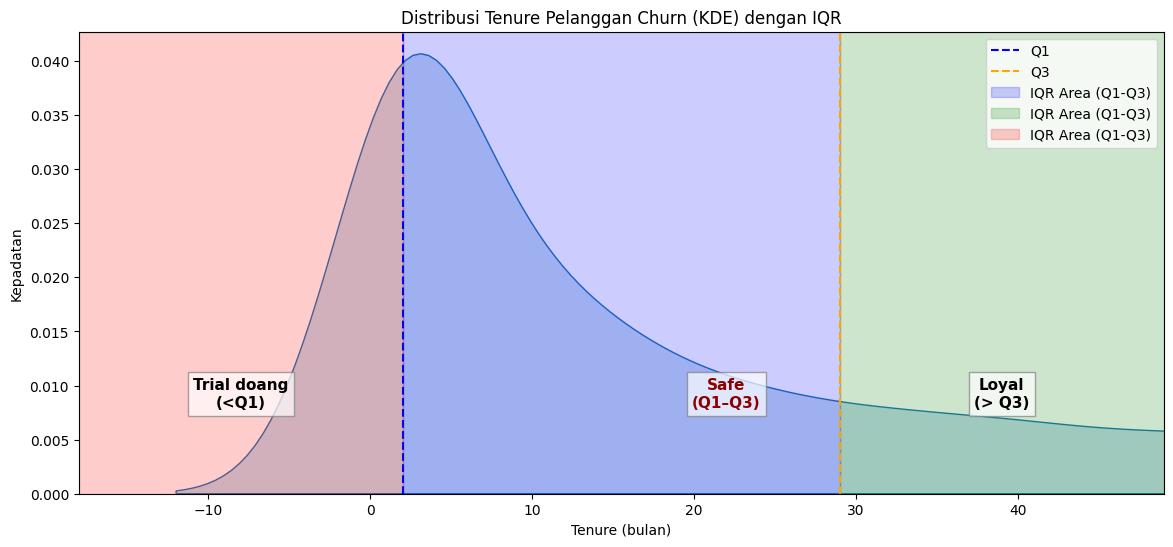

In [229]:
plt.figure(figsize=(14, 6))


sns.kdeplot(yes_churn['tenure'], fill=True)


plt.axvline(q1_tenure_yes_churn, color='blue', linestyle='--', label='Q1')
plt.axvline(q3_tenure_yes_churn, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1_tenure_yes_churn, q3_tenure_yes_churn, color='blue', alpha=0.2, label='IQR Area (Q1-Q3)')
x_min_mantap = q1_tenure_yes_churn - 20
x_max_mantap = q3_tenure_yes_churn + 20
plt.xlim(x_min_mantap, x_max_mantap)
plt.axvspan(q3_tenure_yes_churn, x_max_mantap, color='green', alpha=0.2, label='IQR Area (Q1-Q3)')
plt.axvspan(q1_tenure_yes_churn, x_min_mantap, color='red', alpha=0.2, label='IQR Area (Q1-Q3)')

plt.text(q1_tenure_yes_churn - 10, 0.008, 'Trial doang\n(<Q1)', ha='center', fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q3_tenure_yes_churn + 10 , 0.008, 'Loyal\n(> Q3)', ha='center', fontsize=11, fontweight='bold',bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q1_tenure_yes_churn + 20, 0.008, 'Safe\n(Q1–Q3)', ha='center', fontsize=11, fontweight='bold',color = 'darkred', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.title('Distribusi Tenure Pelanggan Churn (KDE) dengan IQR')
plt.xlabel('Tenure (bulan)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()


C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\374669270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_churn, x='Contract', palette='Set2')


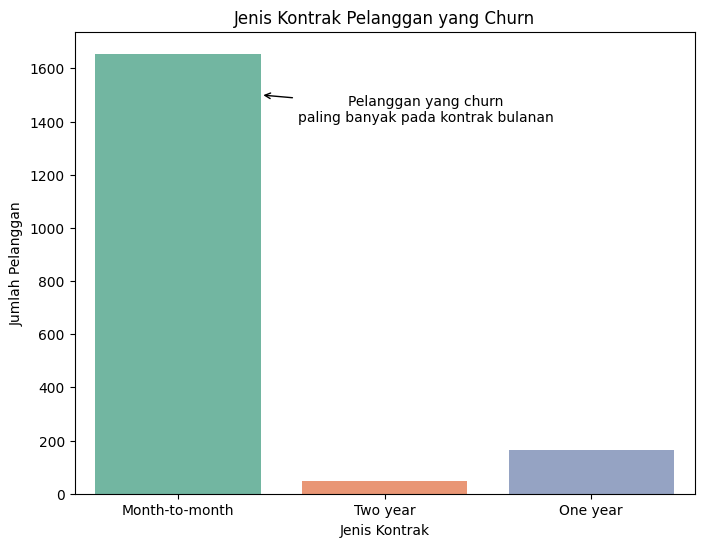

In [207]:
plt.figure(figsize=(8, 6))
sns.countplot(data=yes_churn, x='Contract', palette='Set2')
plt.title('Jenis Kontrak Pelanggan yang Churn')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Pelanggan')
ax = plt.gca()
ax.annotate(
    'Pelanggan yang churn\npaling banyak pada kontrak bulanan',  
    xy=(0.4, 1500),  
    xytext=(1.2, 1400),  
    arrowprops=dict(facecolor='steelblue', arrowstyle='->'),
    ha='center'
)
plt.show()

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\1942244962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_churn, x='Status', palette='Set1')


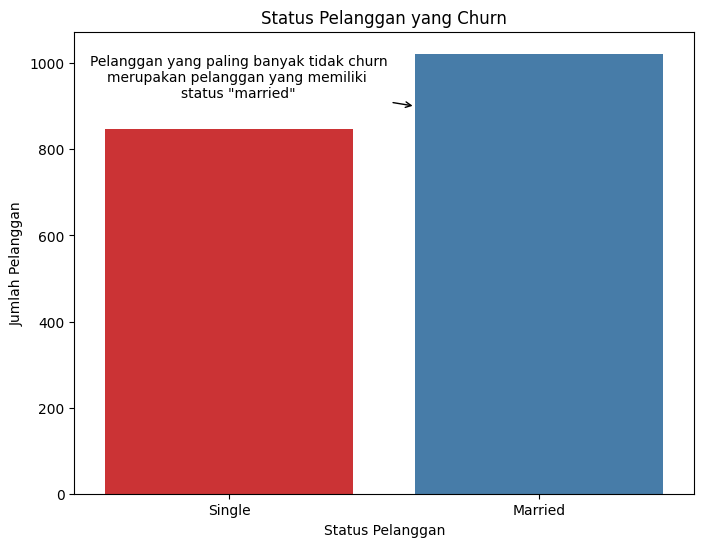

In [225]:
plt.figure(figsize=(8, 6))
sns.countplot(data=yes_churn, x='Status', palette='Set1')
plt.title('Status Pelanggan yang Churn')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah Pelanggan')
ax = plt.gca()
ax.annotate(
    'Pelanggan yang paling banyak tidak churn\nmerupakan pelanggan yang memiliki \nstatus "married"',  
    xy=(0.6, 900),  
    xytext=(0.03, 920),  
    arrowprops=dict(facecolor='steelblue', arrowstyle='->'),
    ha='center'
)
plt.show()

In [230]:
# cari q1_monthly_charges_yes_churn , q3_monthly_charges_yes_churn
q1_monthly_charges_yes_churn = yes_churn['MonthlyCharges'].quantile(0.25)
q3_monthly_charges_yes_churn = yes_churn['MonthlyCharges'].quantile(0.75)
iqr_monthly_charges_yes_churn = q3_monthly_charges_yes_churn - q1_monthly_charges_yes_churn
lower_bound_monthly_charges_yes_churn = q1_monthly_charges_yes_churn - 1.5 * iqr_monthly_charges_yes_churn
upper_bound_monthly_charges_yes_churn = q3_monthly_charges_yes_churn + 1.5 * iqr_monthly_charges_yes_churn

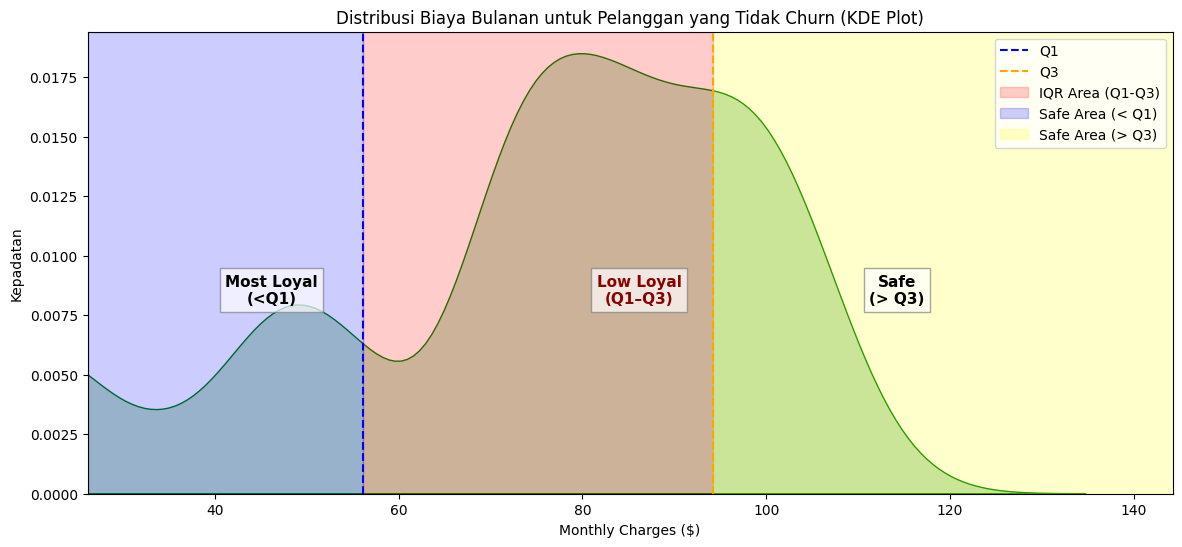

In [231]:
plt.figure(figsize=(14, 6))
sns.kdeplot(data=yes_churn['MonthlyCharges'], fill=True, color='green')
plt.title('Distribusi Biaya Bulanan untuk Pelanggan yang Tidak Churn (KDE Plot)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Kepadatan')

x_min_3 = q1_monthly_charges_yes_churn - 30
x_max_3= q3_monthly_charges_yes_churn + 50
plt.xlim(x_min_3, x_max_3)

plt.axvline(q1_monthly_charges_yes_churn, color='blue', linestyle='--', label='Q1')
plt.axvline(q3_monthly_charges_yes_churn, color='orange', linestyle='--', label='Q3')
plt.axvspan(q1_monthly_charges_yes_churn, q3_monthly_charges_yes_churn, color='red', alpha=0.2, label='IQR Area (Q1-Q3)')
plt.axvspan(x_min_3, q1_monthly_charges_yes_churn, color='blue', alpha=0.2, label='Safe Area (< Q1)')
plt.axvspan(q3_monthly_charges_yes_churn, x_max_3, color='yellow', alpha=0.2, label='Safe Area (> Q3)')
# plt.axvspan(upper_bound_monthly_charges_no_churn, no_churn['MonthlyCharges'].max(), color='green', alpha=0.2, label='Upper Bound Area (> Q3)')
plt.text(q1_monthly_charges_yes_churn -10, 0.008, 'Most Loyal\n(<Q1)', ha='center', fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q3_monthly_charges_yes_churn + 20, 0.008, 'Safe\n(> Q3)', ha='center', fontsize=11, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.text(q1_monthly_charges_yes_churn + 30, 0.008, 'Low Loyal\n(Q1–Q3)', ha='center', fontsize=11, fontweight='bold', color='darkred', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.legend()
plt.show()


C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\3337457223.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tenure_yes_churn_pertahun, x='TenureGroup', order=['≤1 Tahun','1-2 Tahun','2-3 Tahun','3-4 Tahun','4-5 Tahun','>5 Tahun'], ax=axes[0], palette='Reds')
C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\3337457223.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tenure_no_churn_pertahun, x='TenureGroup', order=['≤1 Tahun','1-2 Tahun','2-3 Tahun','3-4 Tahun','4-5 Tahun','>5 Tahun'], ax=axes[1], palette='Greens')


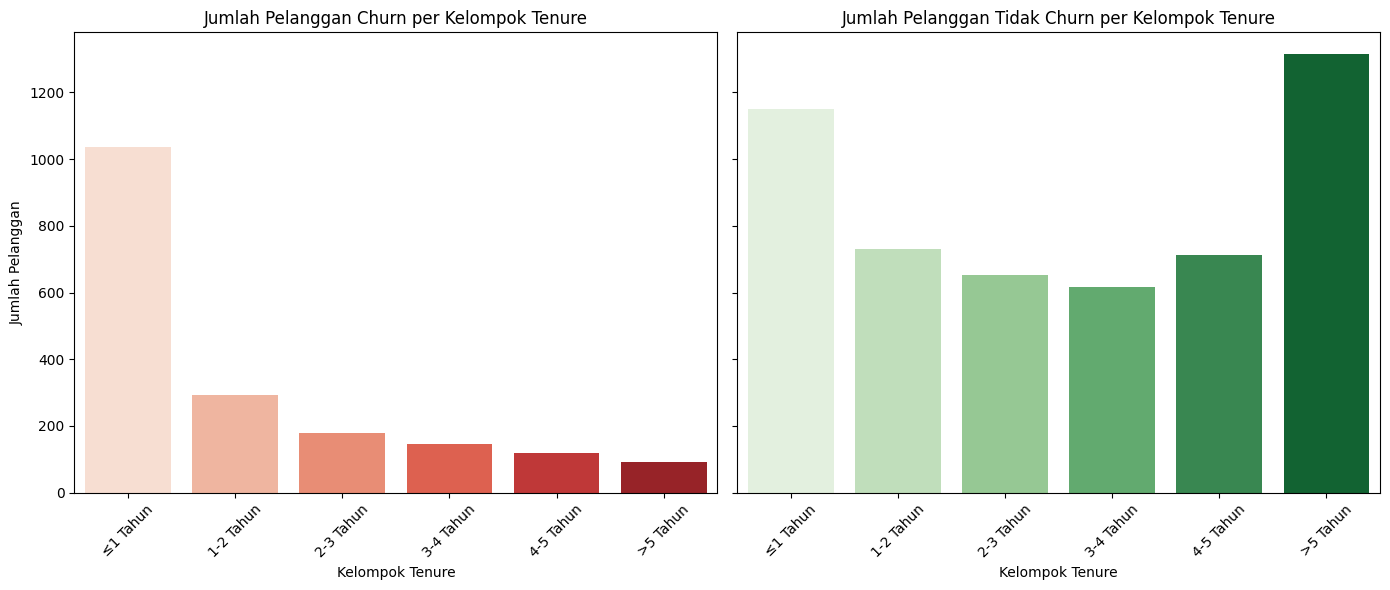

In [240]:
def label_tenure(t):
    if t <= 12:
        return '≤1 Tahun'
    elif t <= 24:
        return '1-2 Tahun'
    elif t <= 36:
        return '2-3 Tahun'
    elif t <= 48:
        return '3-4 Tahun'
    elif t <= 60:
        return '4-5 Tahun'
    else:
        return '>5 Tahun'

agung['TenureGroup'] = agung['tenure'].apply(label_tenure)

# Buat dua subset: churn dan tidak churn
tenure_yes_churn_pertahun = agung[agung['Churn'] == 'Yes']
tenure_no_churn_pertahun = agung[agung['Churn'] == 'No']

# Plot barchart jumlah pelanggan per grup tenure, dipisah churn dan tidak churn
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(data=tenure_yes_churn_pertahun, x='TenureGroup', order=['≤1 Tahun','1-2 Tahun','2-3 Tahun','3-4 Tahun','4-5 Tahun','>5 Tahun'], ax=axes[0], palette='Reds')
axes[0].set_title('Jumlah Pelanggan Churn per Kelompok Tenure')
axes[0].set_xlabel('Kelompok Tenure')
axes[0].set_ylabel('Jumlah Pelanggan')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=tenure_no_churn_pertahun, x='TenureGroup', order=['≤1 Tahun','1-2 Tahun','2-3 Tahun','3-4 Tahun','4-5 Tahun','>5 Tahun'], ax=axes[1], palette='Greens')
axes[1].set_title('Jumlah Pelanggan Tidak Churn per Kelompok Tenure')
axes[1].set_xlabel('Kelompok Tenure')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\236816476.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bulanan_yes_churn, x='MonthlyGroup', order=['$0–40', '$40–80', '$80–120'], ax=axes[0], palette='Reds')
C:\Users\Wahgus\AppData\Local\Temp\ipykernel_19720\236816476.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bulanan_no_churn, x='MonthlyGroup', order=['$0–40', '$40–80', '$80–120'], ax=axes[1], palette='Greens')


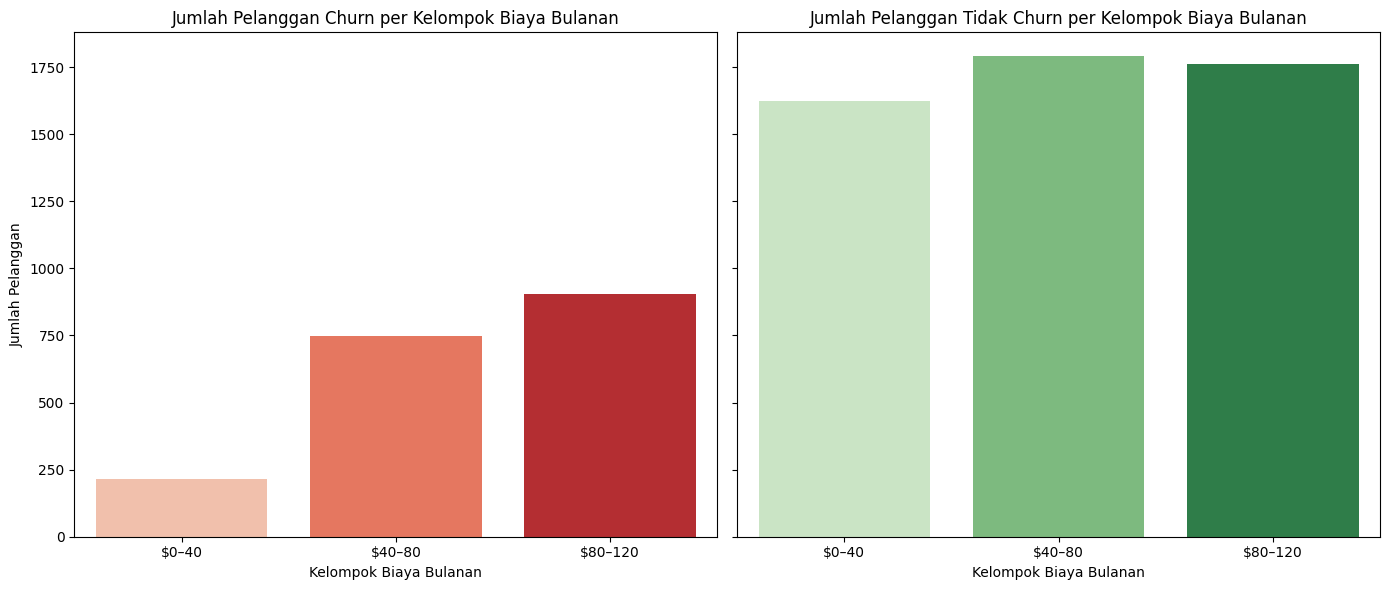

In [241]:

def label_monthly_charge(m):
    if m <= 40:
        return '$0–40'
    elif m <= 80:
        return '$40–80'
    else:
        return '$80–120'

agung['MonthlyGroup'] = agung['MonthlyCharges'].apply(label_monthly_charge)

# Buat dua subset berdasarkan Churn
bulanan_yes_churn = agung[agung['Churn'] == 'Yes']
bulanan_no_churn = agung[agung['Churn'] == 'No']


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(data=bulanan_yes_churn, x='MonthlyGroup', order=['$0–40', '$40–80', '$80–120'], ax=axes[0], palette='Reds')
axes[0].set_title('Jumlah Pelanggan Churn per Kelompok Biaya Bulanan')
axes[0].set_xlabel('Kelompok Biaya Bulanan')
axes[0].set_ylabel('Jumlah Pelanggan')

sns.countplot(data=bulanan_no_churn, x='MonthlyGroup', order=['$0–40', '$40–80', '$80–120'], ax=axes[1], palette='Greens')
axes[1].set_title('Jumlah Pelanggan Tidak Churn per Kelompok Biaya Bulanan')
axes[1].set_xlabel('Kelompok Biaya Bulanan')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


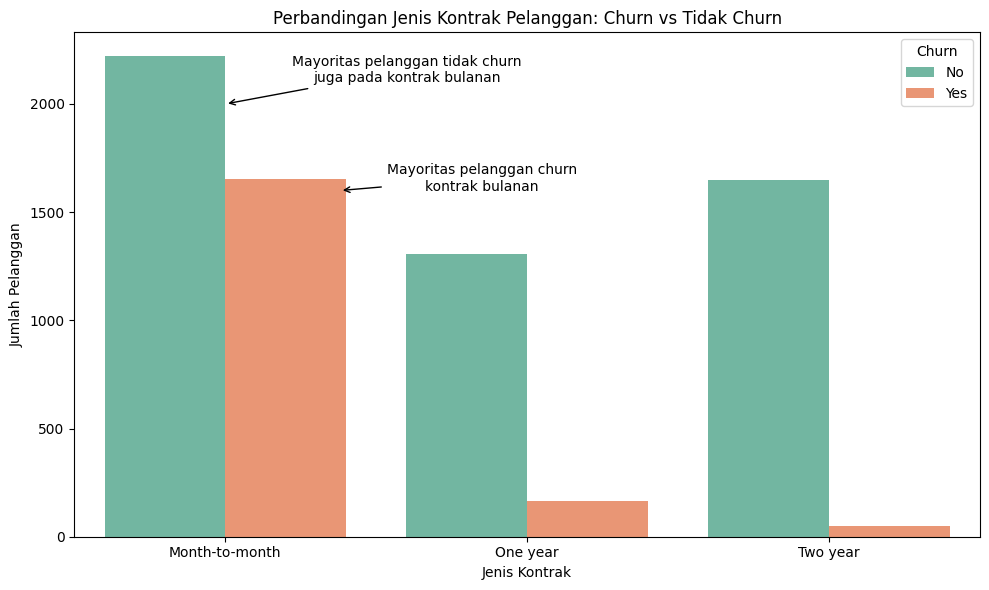

In [256]:

agung['Contract'] = agung['Contract'].astype(str)
agung['Churn'] = agung['Churn'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(data=agung, x='Contract', hue='Churn', palette='Set2')

plt.title('Perbandingan Jenis Kontrak Pelanggan: Churn vs Tidak Churn')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Pelanggan')

# Menambahkan anotasi
plt.annotate(
    'Mayoritas pelanggan churn\nkontrak bulanan',
    xy=(0.38, 1600),
    xytext=(0.85, 1600),
    arrowprops=dict(facecolor='steelblue', arrowstyle='->'),
    ha='center'
)

plt.annotate(
    'Mayoritas pelanggan tidak churn\njuga pada kontrak bulanan',
    xy=(0, 2000),
    xytext=(0.6, 2100),
    arrowprops=dict(facecolor='green', arrowstyle='->'),
    ha='center'
)

plt.tight_layout()
plt.show()


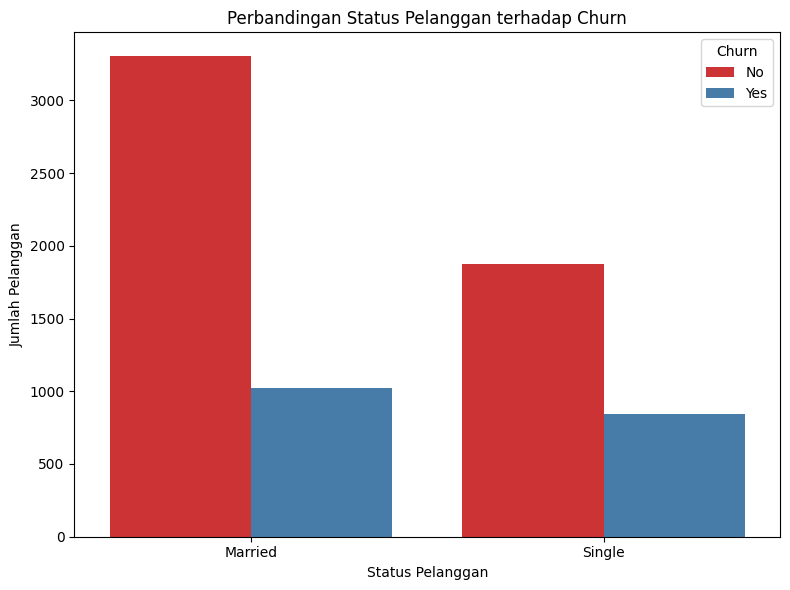

In [258]:

ggwp = agung.groupby(['Status', 'Churn']).size().reset_index(name='Jumlah')

# Buat grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=ggwp, x='Status', y='Jumlah', hue='Churn', palette='Set1')

plt.title('Perbandingan Status Pelanggan terhadap Churn')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


### `Interpretasi`

## `Soal 7`

Buatlah insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut dengan memanfaatkan atribut tenure, contract, monthly charges, status*, jumlah pelanggan, dan churn! (30 poin)

Langkah-langkah:
- Wajib menggunakan kelima atribut (tenure, contract, monthly charges, status, jumlah pelanggan, churn)
- Cari insight yang berkaitan dengan kelima atribut tersebut, dan visualisasikan (usahakan membuat visualisasi lebih dari satu)!
- Tambahkan storyline di dalam visualisasi tersebut

Untuk mempermudah kamu, yuk lihat resource di bawah ini:
- Topic Data Visualization: Materi Advanced Plot - bagian Pengenalan Data Storytelling

*Atribut status didapatkan dengan asumsi:
- Married : pelanggan adalah senior citizen atau memiliki partner atau memiliki dependents
- Single : tidak memiliki status seperti yang disebutkan diatas

contoh :

![image.png](attachment:image.png)

Hint:

Untuk memudahkan bagaimana membuat data storytelling, kamu dapat menjawab

beberapa pertanyaan berikut :

Pelanggan banyak melakukan churn,
- Pada saat tenure berapa bulan?
- Term contract jenis apa yang dipilih oleh pelanggan?
- Status pelanggan seperti apa? Bagaimana persebarannya jika dilihat dari tenure pelanggan?
- Berapa monthly charges pelanggan? Apakah status berpengaruh pada monthly charges pelanggan?

Pertanyaan diatas hanya sebagai alat bantu saja, kamu dapat bebas membuat story telling dengan data yang dimiliki
